In [1]:
import tensorflow as tf
import numpy as np

In [2]:
@tf.function(input_signature=[tf.OptionalSpec(tf.TensorSpec(shape=(), dtype=tf.int32, name=None))])
def maybe_square(optional):
    if optional.has_value():
        x = optional.get_value()
        return x * x
    return -1
optional = tf.experimental.Optional.from_value(5)
print(maybe_square(optional))

tf.Tensor(25, shape=(), dtype=int32)


In [4]:
print(tf.RaggedTensor.from_row_splits(values=[3, 1, 4, 1, 5, 9, 2, 6], row_splits=[0, 4, 4, 7, 8, 8]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>


In [6]:
values = [3, 1, 4, 1, 5, 9, 2, 6]
tf.RaggedTensor.from_row_splits(values, row_splits=[0, 4, 4, 7, 8, 8])

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [7]:
tf.RaggedTensor.from_row_lengths(values, row_lengths=[4, 0, 3, 1, 0])

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [8]:
tf.RaggedTensor.from_value_rowids(values, value_rowids=[0, 0, 0, 0, 2, 2, 2, 3])

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6]]>

In [9]:
tf.RaggedTensor.from_row_starts(values, row_starts=[0, 4, 4, 7, 8])

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [10]:
tf.RaggedTensor.from_row_limits(values, row_limits=[4, 4, 7, 8, 8])

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [11]:
tf.RaggedTensor.from_uniform_row_length(values, uniform_row_length=2)

<tf.RaggedTensor [[3, 1], [4, 1], [5, 9], [2, 6]]>

In [13]:
values = tf.ragged.constant([[1, 2, 3], [4], [5, 6], [7, 8, 9, 10]])
tf.type_spec_from_value(values).ragged_rank

1

In [15]:
tf.type_spec_from_value(values).row_splits_dtype

tf.int64

In [17]:
tf.type_spec_from_value(values).shape

TensorShape([4, None])

In [18]:
c = tf.constant([[1, 2], [3, 4]])
d = tf.constant([[1, 1], [0, 1]])
e = tf.matmul(c, d)
print(e)

tf.Tensor(
[[1 3]
 [3 7]], shape=(2, 2), dtype=int32)


In [19]:
ta = tf.TensorArray(tf.float32, size=0, dynamic_size=True, clear_after_read=False)
ta = ta.write(0, 10)
ta = ta.write(1, 20)
ta = ta.write(2, 30)
print(ta.read(0))
print(ta.read(1))
print(ta.read(2))
print(ta.stack())

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(20.0, shape=(), dtype=float32)
tf.Tensor(30.0, shape=(), dtype=float32)
tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)


In [30]:
@tf.function
def fibonacci(n):
    ta = tf.TensorArray(tf.float32, size=0, dynamic_size=True)
    ta = ta.unstack([0., 1.])
    for i in range(2, n):
        ta = ta.write(i, ta.read(i - 1) + ta.read(i - 2))
    return ta.stack()
fibonacci(7)

<tf.Tensor: shape=(7,), dtype=float32, numpy=array([0., 1., 1., 2., 3., 5., 8.], dtype=float32)>

In [27]:
v = tf.Variable(1)
@tf.function
def f(x):
    ta = tf.TensorArray(tf.int32, size=0, dynamic_size=True)
    for i in tf.range(x):
        v.assign_add(i)
        ta = ta.write(i, v)
    return ta.stack()
f(5)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([ 1,  2,  4,  7, 11])>

In [31]:
t_a = tf.TensorShape([1, 2])
a = [1, 2]
t_b = tf.TensorShape([1, 2])
t_c = tf.TensorShape([1, 2, 3])
print(t_a.__eq__(a))
print(t_a.__eq__(t_b))
print(t_a.__eq__(t_c))

True
True
False


In [32]:
spec = tf.TensorSpec(shape=[8, 3], dtype=tf.int32, name="OriginalName")
tf.TensorSpec.from_spec(spec, "NewName")

TensorSpec(shape=(8, 3), dtype=tf.int32, name='NewName')

In [33]:
tf.TensorSpec.from_tensor(tf.constant([1, 2, 3]))

TensorSpec(shape=(3,), dtype=tf.int32, name=None)

In [34]:
spec = tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int32)
@tf.function(input_signature=[spec])
def double(x):
    return x * 2
print(double(tf.ragged.constant([[1, 2], [3]])))

<tf.RaggedTensor [[2, 4], [6]]>


In [35]:
v = tf.Variable(1.)
print(v.assign(2.))
print(v.assign_add(0.5))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.0>
<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.5>


In [36]:
v = tf.Variable(1., shape=tf.TensorShape(None))
v.assign([[1.]])

<tf.Variable 'UnreadVariable' shape=<unknown> dtype=float32, numpy=array([[1.]], dtype=float32)>

In [37]:
w = tf.Variable([[1.], [2.]])
x = tf.constant([[3., 4.]])
print(tf.matmul(w, x))
print(tf.sigmoid(w + x))

tf.Tensor(
[[3. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.98201376 0.9933071 ]
 [0.9933071  0.99752736]], shape=(2, 2), dtype=float32)


In [40]:
with tf.GradientTape(persistent=True) as tape:
    trainable = tf.Variable(1.)
    non_trainable = tf.Variable(2., trainable=False)
    x1 = trainable * 2.
    x2 = non_trainable * 3.
print(tape.gradient(x1, trainable))
assert tape.gradient(x2, non_trainable) is None

tf.Tensor(2.0, shape=(), dtype=float32)


In [41]:
m = tf.Module()
m.v = tf.Variable([1.])
m.trainable_variables

(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>,)

In [42]:
v = tf.Variable(0.)
read_and_decrement = tf.function(lambda: v.assign_sub(0.1))
print(read_and_decrement())
print(read_and_decrement())

tf.Tensor(-0.1, shape=(), dtype=float32)
tf.Tensor(-0.2, shape=(), dtype=float32)


In [43]:
class M(tf.Module):
    @tf.function
    def __call__(self, x):
        if not hasattr(self, "v"):
            self.v = tf.Variable(x)
        return self.v * x
m = M()
print(m(2.))
print(m(3.))
print(m.v)

tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


In [3]:
values = [1, 10, 26.9, 166.32, 62.3]
sort_order = tf.argsort(values)
sort_order.numpy()

array([0, 1, 2, 4, 3])

In [4]:
sorted = tf.gather(values, sort_order)
assert tf.reduce_all(sorted == tf.sort(values))

In [5]:
tf.bitcast(tf.constant(0xffffffff, dtype=tf.uint32), tf.uint8)

<tf.Tensor: shape=(4,), dtype=uint8, numpy=array([255, 255, 255, 255], dtype=uint8)>

In [7]:
equality_cast = tf.cast([1, 2, 3], tf.complex128)
equality_cast

<tf.Tensor: shape=(3,), dtype=complex128, numpy=array([1.+0.j, 2.+0.j, 3.+0.j])>

In [9]:
import numpy as np
tensor = [0, 1, 2, 3]
mask = np.array([True, False, True, False])
tf.boolean_mask(tensor, mask)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 2])>

In [11]:
shape_x = (1, 2, 3)
shape_y = (5, 1, 3)
tf.broadcast_dynamic_shape(shape_x, shape_y)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([5, 2, 3])>

In [12]:
shape_x = tf.TensorShape([1, 2, 3])
shape_y = tf.TensorShape([5, 1, 3])
tf.broadcast_static_shape(shape_x, shape_y)

TensorShape([5, 2, 3])

In [13]:
x = tf.constant([1, 2, 3])
y = tf.broadcast_to(x, [3, 3])
y

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])>

In [16]:
x = 4
y = 5
f1 = lambda: tf.constant(17)
f2 = lambda: tf.constant(23)
r = tf.case([(tf.less(x, y), f1)], default=f2)
r

<tf.Tensor: shape=(), dtype=int32, numpy=17>

In [18]:
some_nums = tf.constant([[1, 2, 3, 4, 5]], dtype=tf.float32)
tf.clip_by_norm(some_nums, 2.0).numpy()

array([[0.26967996, 0.5393599 , 0.80903983, 1.0787199 , 1.3483998 ]],
      dtype=float32)

In [19]:
t = tf.constant([[-10, -1, 0], [0, 2, 10]])
tf.clip_by_value(t, -1, 1).numpy()

array([[-1, -1,  0],
       [ 0,  1,  1]])

In [20]:
t1 = [[1, 2, 3], [4, 5, 6]]
t2 = [[7, 8, 9], [10, 11, 12]]
tf.concat([t1, t2], 0)

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])>

In [22]:
def my_func(arg):
    arg = tf.convert_to_tensor(arg, dtype=tf.float32)
    return arg
my_func(tf.constant([[1.0, 2.0], [3.0, 4.0]]))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [26]:
x = tf.constant(100.)
def log1pexp(x):
    return tf.math.log(1 + tf.exp(x))
with tf.GradientTape() as tape:
    y = log1pexp(x)
tape.gradient(y, x)

In [30]:
with tf.device("/cpu:0"):
    print("hello")

hello


In [32]:
x = tf.constant([0.1, -1., 5.2, 4.3, -1., 7.4])
condition_mask = tf.not_equal(x, tf.constant(-1.))
partitioned_data = tf.dynamic_partition(x, tf.cast(condition_mask, tf.int32), 2)
partitioned_data[1] = partitioned_data[1] + 1.0
condition_indices = tf.dynamic_partition(tf.range(tf.shape(x)[0]), tf.cast(condition_mask, tf.int32), 2)
x = tf.dynamic_stitch(condition_indices, partitioned_data)
x

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 1.1, -1. ,  6.2,  5.3, -1. ,  8.4], dtype=float32)>

In [34]:
print(condition_mask)
print("partition", partitioned_data)
print(condition_indices)

tf.Tensor([ True False  True  True False  True], shape=(6,), dtype=bool)
partition [<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1., -1.], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.1, 6.2, 5.3, 8.4], dtype=float32)>]
[<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 4])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 2, 3, 5])>]


In [36]:
hypothesis = tf.SparseTensor([
    [0, 0, 0],
    [1, 0, 0]
], ["a", "b"], (2, 1, 1))
truth = tf.SparseTensor([
    [0, 1, 0],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0]
], ["a", "b", "c", "a"], (2, 2, 2))
tf.edit_distance(hypothesis, truth, normalize=True)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[inf, 1. ],
       [0.5, 1. ]], dtype=float32)>

In [37]:
m0 = tf.random.normal(shape=[2, 3])
m1 = tf.random.normal(shape=[3, 5])
e = tf.einsum('ij,jk->ik', m0, m1)
print(e.shape)

(2, 5)


In [38]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])
x = tf.ensure_shape(x, [2, 3])
x

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [43]:
tf.ensure_shape(x, [None, 3])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [44]:
@tf.function
def fn():
    with tf.init_scope():
        print(tf.executing_eagerly())
    print(tf.executing_eagerly())
fn()

True
False


In [45]:
image = tf.zeros([10, 10, 3])
print(tf.expand_dims(image, axis=0).shape.as_list())
print(tf.expand_dims(image, axis=1).shape.as_list())
print(tf.expand_dims(image, axis=-1).shape.as_list())

[1, 10, 10, 3]
[10, 1, 10, 3]
[10, 10, 3, 1]


In [46]:
tf.eye(2, 3)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.]], dtype=float32)>

In [47]:
tf.fill([2, 3], 9)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[9, 9, 9],
       [9, 9, 9]])>

In [48]:
elems = tf.constant([1, 2, 3, 4, 5, 6])
sum = tf.foldl(lambda a, x: a + x, elems)
sum

<tf.Tensor: shape=(), dtype=int32, numpy=21>

In [51]:
@tf.function
def f(x, y):
    return x ** 2 + y
x = tf.constant([2, 3])
y = tf.constant([3, -2])
f(x, y)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 7])>

In [53]:
params = tf.constant([
    [0, 0, 1, 0, 2],
    [3, 0, 0, 0, 4],
    [0, 5, 0, 6, 0]
])
indices = tf.constant([
    [2, 4],
    [0, 4],
    [1, 3]
])
tf.gather(params, indices, axis=1, batch_dims=1).numpy()

array([[1, 2],
       [3, 4],
       [5, 6]])

In [54]:
tf.gather_nd(indices=[[0, 1], [1, 0], [2, 4], [3, 2], [4, 1]], params=tf.zeros([5, 7, 3])).shape.as_list()

[5, 3]

In [55]:
a = tf.constant(10)
print(tf.get_static_value(a))
b = tf.constant(20)
tf.get_static_value(tf.add(a, b))

10


30

In [57]:
x = tf.Variable(1.0, name="x")
z = tf.Variable(3.0, name="z")
with tf.GradientTape() as tape:
    y = tf.grad_pass_through(x.assign)(z**2)
grads = tape.gradient(y, z)
grads

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [58]:
nbins = 5
value_range = [0.0, 5.0]
new_values = [-1.0, 0.0, 1.5, 2.0, 5.0, 15]
hist = tf.histogram_fixed_width(new_values, value_range, nbins=5)
hist.numpy()

array([2, 1, 1, 0, 2])

In [59]:
a = tf.constant([0.78])
a_identity = tf.identity(a)
print(a.numpy())
print(a_identity.numpy())

[0.78]
[0.78]


In [60]:
a = tf.Variable(5)
a_identity = tf.identity(a)
print(a.assign_add(1))
print(a_identity)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
tf.Tensor(5, shape=(), dtype=int32)


In [62]:
tf.compat.v1.enable_eager_execution()
@tf.function
def func():
    assert not tf.executing_eagerly()
    with tf.init_scope():
        assert tf.executing_eagerly()
func()

In [63]:
print(tf.inside_function())
@tf.function
def f():
    print(tf.inside_function())
f()

False
True


In [4]:
tf.linspace([0., 5.], [10., 40.], 5, axis=0)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.  ,  5.  ],
       [ 2.5 , 13.75],
       [ 5.  , 22.5 ],
       [ 7.5 , 31.25],
       [10.  , 40.  ]], dtype=float32)>

In [5]:
a = tf.constant([[1, 2, 3], [4, 5, 6]])
proto_tensor = tf.make_tensor_proto(a)
tf.make_ndarray(proto_tensor)

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
proto_tensor

dtype: DT_INT32
tensor_shape {
  dim {
    size: 2
  }
  dim {
    size: 3
  }
}
tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000\004\000\000\000\005\000\000\000\006\000\000\000"

In [7]:
tf.map_fn(fn=lambda t: tf.range(t, t + 3), elems=tf.constant([3, 5, 2]))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[3, 4, 5],
       [5, 6, 7],
       [2, 3, 4]])>

In [10]:
x = [1, 2, 3, 5]
y = [4, 5, 6, 7]
X, Y = tf.meshgrid(x, y)
print(X)
print(Y)

tf.Tensor(
[[1 2 3 5]
 [1 2 3 5]
 [1 2 3 5]
 [1 2 3 5]], shape=(4, 4), dtype=int32)
tf.Tensor(
[[4 4 4 4]
 [5 5 5 5]
 [6 6 6 6]
 [7 7 7 7]], shape=(4, 4), dtype=int32)


In [11]:
def my_numpy_func(x):
    return np.sinh(x)
@tf.function(input_signature=[tf.TensorSpec(None, tf.float32)])
def tf_function(input):
    y = tf.numpy_function(my_numpy_func, [input], tf.float32)
    return y * y
tf_function(tf.constant(1.))

<tf.Tensor: shape=(), dtype=float32, numpy=1.3810978>

In [12]:
indices = [[0, 2], [1, -1]]
tf.one_hot(indices, 3, on_value=1.0, off_value=0.0, axis=-1)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[1., 0., 0.],
        [0., 0., 1.]],

       [[0., 1., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [13]:
tf.ones([3, 4], tf.int32)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])>

In [17]:
def make_variable(k, initializer):
    return (tf.Variable(initializer(shape=[k], dtype=tf.float32)), tf.Variable(initializer(shape=[k, k], dtype=tf.float32)))
v1, v2 = make_variable(3, tf.ones_initializer())
print(v1)
print(v2)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


In [18]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])
tf.ones_like(tensor)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]])>

In [23]:
import tensorflow as tf
import numpy as np

In [2]:
t = tf.constant([[1, 2, 3], [4, 5, 6]])
paddings = tf.constant([[1, 1], [2, 2]])
print(tf.pad(t, paddings, "CONSTANT"))
print(tf.pad(t, paddings, "REFLECT"))
print(tf.pad(t, paddings, "SYMMETRIC"))

tf.Tensor(
[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]], shape=(4, 7), dtype=int32)
tf.Tensor(
[[6 5 4 5 6 5 4]
 [3 2 1 2 3 2 1]
 [6 5 4 5 6 5 4]
 [3 2 1 2 3 2 1]], shape=(4, 7), dtype=int32)
tf.Tensor(
[[2 1 1 2 3 3 2]
 [2 1 1 2 3 3 2]
 [5 4 4 5 6 6 5]
 [5 4 4 5 6 6 5]], shape=(4, 7), dtype=int32)


In [10]:
x = tf.constant([1, 4])
y = tf.constant([2, 5])
z = tf.constant([3, 6])
tf.compat.v1.disable_eager_execution()
def execute():
    return tf.parallel_stack([x, y, z])
execute()

<tf.Tensor 'parallel_stack_1/ParallelConcat:0' shape=(3, 2) dtype=int32>

In [12]:
import sys
tensor = tf.range(10)
tf.print("tensors:", tensor, {2: tensor * 2}, output_stream=sys.stdout)

<tf.Operation 'PrintV2' type=PrintV2>

In [14]:
tensor = tf.range(10)
tf.print(tensor, output_stream=sys.stderr)

<tf.Operation 'PrintV2_1' type=PrintV2>

In [18]:
def make_variable(k, initializer):
    return (tf.Variable(initializer(shape=[k], dtype=tf.float32)), 
            tf.Variable(initializer(shape=[k, k], dtype=tf.float32)))
v1, v2 = make_variable(3, tf.random_normal_initializer(mean=1., stddev=2.))
print(v1)
print(v2)
print(make_variable(4, tf.random_uniform_initializer(minval=-1., maxval=1.)))

<tf.Variable 'Variable_5:0' shape=(3,) dtype=float32>
<tf.Variable 'Variable_6:0' shape=(3, 3) dtype=float32>
(<tf.Variable 'Variable_7:0' shape=(4,) dtype=float32>, <tf.Variable 'Variable_8:0' shape=(4, 4) dtype=float32>)


In [21]:
start = 3
limit = 1
delta = -0.5
tf.range(start, limit, delta)

<tf.Tensor 'range_6:0' shape=(4,) dtype=float32>

In [26]:
tf.range(5)

<tf.Tensor 'range_8:0' shape=(5,) dtype=int32>

In [27]:
tf.linspace(0, 5, 1)

<tf.Tensor 'linspace/Slice:0' shape=(1,) dtype=float64>

In [30]:
tf.ones(5)

<tf.Tensor 'ones_2:0' shape=(5,) dtype=float32>

In [1]:
import tensorflow as tf

In [2]:
tf.range(5)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4])>

In [3]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
tf.rank(t)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [4]:
y = tf.Variable(1.0)
def my_function(x):
    tf.print('running')
    z = x * y
    return z
my_function_recompute = tf.recompute_grad(my_function)

In [6]:
with tf.GradientTape() as tape:
    r = tf.constant(1.0)
    for i in range(4):
        r = my_function_recompute(r)

running
running
running
running


In [7]:
grad = tape.gradient(r, [y])
grad

running
running
running
running


[<tf.Tensor: shape=(), dtype=float32, numpy=4.0>]

In [8]:
tf.repeat([[1, 2], [3, 4]], repeats=[2, 3], axis=1)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[1, 1, 2, 2, 2],
       [3, 3, 4, 4, 4]])>

In [9]:
t1 = [[1, 2, 3], [4, 5, 6]]
print(tf.shape(t1).numpy())
print(tf.reshape(t1, [6]))

[2 3]
tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32)


In [10]:
t = tf.constant([[[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]], [[12, 13, 14, 15], [16, 17, 18, 19], 
                                                                 [20, 21, 22, 23]]]])
tf.reverse(t, [3])

<tf.Tensor: shape=(1, 2, 3, 4), dtype=int32, numpy=
array([[[[ 3,  2,  1,  0],
         [ 7,  6,  5,  4],
         [11, 10,  9,  8]],

        [[15, 14, 13, 12],
         [19, 18, 17, 16],
         [23, 22, 21, 20]]]])>

In [11]:
tf.reverse(t, [-1])

<tf.Tensor: shape=(1, 2, 3, 4), dtype=int32, numpy=
array([[[[ 3,  2,  1,  0],
         [ 7,  6,  5,  4],
         [11, 10,  9,  8]],

        [[15, 14, 13, 12],
         [19, 18, 17, 16],
         [23, 22, 21, 20]]]])>

In [12]:
tf.reverse(t, [2])

<tf.Tensor: shape=(1, 2, 3, 4), dtype=int32, numpy=
array([[[[ 8,  9, 10, 11],
         [ 4,  5,  6,  7],
         [ 0,  1,  2,  3]],

        [[20, 21, 22, 23],
         [16, 17, 18, 19],
         [12, 13, 14, 15]]]])>

In [16]:
tf.reverse(t, [1])

<tf.Tensor: shape=(1, 2, 3, 4), dtype=int32, numpy=
array([[[[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]]])>

In [17]:
seq_lengths = [7, 2, 3, 5]
input = [[1, 2, 3, 4, 5, 0, 0, 0], [1, 2, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 7, 8]]
output = tf.reverse_sequence(input, seq_lengths, seq_axis=1, batch_axis=0)
output

<tf.Tensor: shape=(4, 8), dtype=int32, numpy=
array([[0, 0, 5, 4, 3, 2, 1, 0],
       [2, 1, 0, 0, 0, 0, 0, 0],
       [3, 2, 1, 4, 0, 0, 0, 0],
       [5, 4, 3, 2, 1, 6, 7, 8]])>

In [18]:
t = [0, 1, 2, 3, 4]
tf.roll(t, shift=2, axis=0)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([3, 4, 0, 1, 2])>

In [21]:
elems = tf.constant([1, 2, 3, 4, 5, 6])
sum = tf.scan(lambda a, x: a + x, elems, reverse=True)
sum

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([21, 20, 18, 15, 11,  6])>

In [23]:
indices = tf.constant([[4], [3], [1] ,[7]])
updates = tf.constant([9, 10, 11, 12])
shape = tf.constant([8])
scatter = tf.scatter_nd(indices, updates, shape)
scatter

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 0, 11,  0, 10,  9,  0,  0, 12])>

In [24]:
edges = [-1, 3.3, 9.1, 10.0]
values = [0.0, 4.1, 12.0]
tf.searchsorted(edges, values).numpy()

array([1, 2, 4])

In [32]:
tf.sequence_mask([1, 3, 2], 5)

<tf.Tensor: shape=(3, 5), dtype=bool, numpy=
array([[ True, False, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True, False, False, False]])>

In [33]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
tf.shape(t)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 2, 3])>

In [34]:
tf.size(t)

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [35]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]], [[5, 5, 5], [6, 6, 6]]])
tf.slice(t, [1, 0, 0], [2, 1, 3])

<tf.Tensor: shape=(2, 1, 3), dtype=int32, numpy=
array([[[3, 3, 3]],

       [[5, 5, 5]]])>

In [36]:
a = [1, 3, 24, 6]
tf.sort(a)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  3,  6, 24])>

In [37]:
tf.sort(a, direction="DESCENDING")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([24,  6,  3,  1])>

In [38]:
x = tf.Variable(tf.random.uniform([5, 30], -1, 1))
split0, split1, split2 = tf.split(x, [4, 15, 11], 1)
print(tf.shape(split0).numpy())
print(tf.shape(split1).numpy())
print(tf.shape(split2).numpy())

[5 4]
[ 5 15]
[ 5 11]


In [39]:
x = tf.constant([1, 4])
y = tf.constant([2, 5])
z = tf.constant([3, 6])
print(tf.stack([x, y, z]))
print(tf.stack([x, y, z], axis=1))

tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [53]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]], [[5, 5, 5], [6, 6, 6]]])
tf.strided_slice(t, [1, -1, 0], [2, -3, 3], [1, -1, 1])

<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[4, 4, 4],
        [3, 3, 3]]])>

In [1]:
import tensorflow as tf 
import numpy as np

In [6]:
indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([9, 10, 11, 12])
tensor = tf.ones([8], dtype=tf.int32)
updated = tf.tensor_scatter_nd_add(tensor, indices, updates)
updated

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([ 1, 12,  1, 11, 10,  1,  1, 13])>

In [7]:
tensor = [0, 0, 0, 0, 0, 0, 0, 0]
indices = [[1], [4], [5]]
updates = [1, -1, 1]
tf.tensor_scatter_nd_max(tensor, indices, updates).numpy()

array([0, 1, 0, 0, 0, 1, 0, 0])

In [8]:
indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([9, 10, 11, 12])
tensor = tf.ones([8], dtype=tf.int32)
updated = tf.tensor_scatter_nd_sub(tensor, indices, updates)
print(updated)

tf.Tensor([  1 -10   1  -9  -8   1   1 -11], shape=(8,), dtype=int32)


In [10]:
tensor = [0, 0, 0, 0, 0, 0, 0, 0]
indices = [[1], [3], [4]]
updates = [9, 10, 11]
print(tf.tensor_scatter_nd_update(tensor, indices, updates))

tf.Tensor([ 0  9  0 10 11  0  0  0], shape=(8,), dtype=int32)


In [15]:
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[1, 2], [3, 4]])
tf.tensordot(a, b, axes=[[1], [0]])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7, 10],
       [15, 22]])>

In [16]:
a = tf.constant([[1, 2, 3], [4, 5, 6]], tf.int32)
b = tf.constant([1, 2], tf.int32)
tf.tile(a, b)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])>

In [18]:
tf.timestamp()

<tf.Tensor: shape=(), dtype=float64, numpy=1644677590.891376>

In [19]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])
tf.transpose(x)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]])>

In [20]:
x = tf.constant([[1 + 1j, 2 + 2j, 3 + 3j], [4 + 4j, 5 + 5j, 6 + 6j]])
tf.transpose(x, conjugate=True)

<tf.Tensor: shape=(3, 2), dtype=complex128, numpy=
array([[1.-1.j, 4.-4.j],
       [2.-2.j, 5.-5.j],
       [3.-3.j, 6.-6.j]])>

In [21]:
x = tf.constant([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
tf.transpose(x, perm=[0, 2, 1])

<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
array([[[ 1,  4],
        [ 2,  5],
        [ 3,  6]],

       [[ 7, 10],
        [ 8, 11],
        [ 9, 12]]])>

In [26]:
tf.truncatemod(5, 2)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [27]:
tf.truncatediv(6, 2)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [29]:
print(tf.type_spec_from_value(np.array([4.0, 5.0], np.float32)))
print(tf.type_spec_from_value(tf.constant([1, 2, 3])))
print(tf.type_spec_from_value(tf.ragged.constant([[1, 2], [3, 4, 5]])))

TensorSpec(shape=(2,), dtype=tf.float32, name=None)
TensorSpec(shape=(3,), dtype=tf.int32, name=None)
RaggedTensorSpec(TensorShape([2, None]), tf.int32, 1, tf.int64)


In [30]:
x = tf.constant([1, 1, 2, 4, 4, 4, 7, 8, 8])
y, idx, count = tf.unique_with_counts(x)
print(y)
print(idx)
count

tf.Tensor([1 2 4 7 8], shape=(5,), dtype=int32)
tf.Tensor([0 0 1 2 2 2 3 4 4], shape=(9,), dtype=int32)


<tf.Tensor: shape=(5,), dtype=int32, numpy=array([2, 1, 3, 1, 2])>

In [31]:
y, idx = tf.unique(tf.constant([1, 1, 2, 4, 4, 4, 7, 8, 8]))

In [32]:
print(y, idx)

tf.Tensor([1 2 4 7 8], shape=(5,), dtype=int32) tf.Tensor([0 0 1 2 2 2 3 4 4], shape=(9,), dtype=int32)


In [33]:
x = tf.reshape(tf.range(12), (3, 4))
p, q, r = tf.unstack(x)
p.shape.as_list()

[4]

In [35]:
def outer_product(a):
    return tf.tensordot(a, a, 0)
batch_size = 100
a = tf.ones((batch_size, 32, 32))
c = tf.vectorized_map(outer_product, a)
assert c.shape == (batch_size, 32, 32, 32, 32)

In [36]:
tf.where([True, False, True], x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]], y = [[100], [200], [300]]).numpy()

array([[  1, 100,   3],
       [  4, 200,   6],
       [  7, 300,   9]])

In [39]:
i = tf.constant(0)
c = lambda i: tf.less(i, 10)
b = lambda i: (tf.add(i, 1),)
r = tf.while_loop(c, b, [i])
r

(<tf.Tensor: shape=(), dtype=int32, numpy=10>,)

In [41]:
import collections
Pair = collections.namedtuple('Pair', 'j, k')
ijk_0 = (tf.constant(0), Pair(tf.constant(1), tf.constant(2)))
c = lambda i, p: i < 10
b = lambda i, p: (i + 1, Pair((p.j + p.k), (p.j - p.k)))
ijk_final = tf.while_loop(c, b, ijk_0)
ijk_final

(<tf.Tensor: shape=(), dtype=int32, numpy=10>,
 Pair(j=<tf.Tensor: shape=(), dtype=int32, numpy=32>, k=<tf.Tensor: shape=(), dtype=int32, numpy=64>))

In [42]:
tf.zeros([3, 4], tf.int32)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])>

In [45]:
def make_variables(k, initializer):
    return (tf.Variable(initializer(shape=[k], dtype=tf.float32)), 
            tf.Variable(initializer(shape=[k, k], dtype=tf.float32)))
v1, v2 = make_variables(3, tf.zeros_initializer())
print(v1)
print(v2)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>


In [46]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])
tf.zeros_like(tensor)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0]])>

In [1]:
import numpy as np
import tensorflow as tf

In [3]:
x = tf.constant([[2.0, 3.0], [1.0, 4.0]])
targets = tf.constant([[1.], [-1.]])
dense = tf.keras.layers.Dense(1)
dense.build([None, 2])
with tf.autodiff.ForwardAccumulator(primals=dense.kernel, tangents=tf.constant([[1.], [0.]])) as acc:
    loss = tf.reduce_sum((dense(x) - targets) ** 2.)
acc.jvp(loss)

<tf.Tensor: shape=(), dtype=float32, numpy=6.8372326>

In [6]:
x = tf.constant([[2.0, 3.0], [1.0, 4.0]])
targets = tf.constant([[1.], [-1.]])
dense = tf.keras.layers.Dense(1)
dense.build([None, 2])
loss_fn = lambda: tf.reduce_sum((dense(x) - targets) ** 2)
kernel_fprop = []
with tf.autodiff.ForwardAccumulator(dense.kernel, tf.constant([[1.], [0.]])) as acc:
    kernel_fprop.append(acc.jvp(loss_fn()))
with tf.autodiff.ForwardAccumulator(dense.kernel, tf.constant([[0.], [1.]])) as acc:
    kernel_fprop.append(acc.jvp(loss_fn()))
with tf.autodiff.ForwardAccumulator(dense.bias, tf.constant([1.])) as acc:
    bias_fprop = acc.jvp(loss_fn())
with tf.GradientTape() as tape:
    loss = loss_fn()
kernel_grad, bias_grad = tape.gradient(loss, (dense.kernel, dense.bias))
np.testing.assert_allclose(kernel_grad, tf.stack(kernel_fprop)[:, tf.newaxis])
np.testing.assert_allclose(bias_grad, bias_fprop[tf.newaxis])

In [7]:
primal = tf.constant(1.1)
with tf.autodiff.ForwardAccumulator(primal, tf.constant(1.)) as outer:
    with tf.autodiff.ForwardAccumulator(primal, tf.constant(1.)) as inner:
        primal_out = primal ** tf.constant(3.5)
inner_jvp = inner.jvp(primal_out)
print(inner_jvp)
outer.jvp(inner_jvp)

tf.Tensor(4.4417057, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=10.094786>

In [8]:
v = tf.Variable([1., 2.])
with tf.autodiff.ForwardAccumulator(v, tf.constant([1., 0.])) as acc:
    with tf.GradientTape() as tape:
        y = tf.reduce_sum(v ** 3)
    backward = tape.gradient(y, v)
print(backward)
acc.jvp(backward)

tf.Tensor([ 3. 12.], shape=(2,), dtype=float32)


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([6., 0.], dtype=float32)>

In [2]:
import os
import tensorflow as tf
os.environ['AUTOGRAPH_VERBOSITY'] = '5'
tf.autograph.set_verbosity(0)
os.environ["AUTOGRAPH_VERBOSITY"] = "1"

In [3]:
def f(x):
    if x < 0:
        x =-x
    return x
tf.autograph.to_code(f)

"def tf__f(x):\n    with ag__.FunctionScope('f', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:\n        do_return = False\n        retval_ = ag__.UndefinedReturnValue()\n\n        def get_state():\n            return (x,)\n\n        def set_state(vars_):\n            nonlocal x\n            (x,) = vars_\n\n        def if_body():\n            nonlocal x\n            x = (- ag__.ld(x))\n\n        def else_body():\n            nonlocal x\n            pass\n        ag__.if_stmt((ag__.ld(x) < 0), if_body, else_body, get_state, set_state, ('x',), 1)\n        try:\n            do_return = True\n            retval_ = ag__.ld(x)\n        except:\n            do_return = False\n            raise\n        return fscope.ret(retval_, do_return)\n"

In [6]:
def f(x):
    if x > 0:
        y = x * x
    else:
        y =-x
    return y
converted_f = tf.autograph.to_graph(f)
x = tf.constant(2)
converted_f(x)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [7]:
for i in tf.range(10):
    tf.autograph.trace(i)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [9]:
optionals = tf.autograph.experimental.Feature.EQUALITY_OPERATORS
@tf.function(experimental_autograph_options=optionals)
def f(i):
    if i == 0:
        tf.print("i is zero")

In [12]:
@tf.function(autograph=True)
def f():
    n = 0
    for i in tf.range(10):
        tf.autograph.experimental.set_loop_options(maximum_iterations=3)
        n += 1
    return n
a = f()
a

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [14]:
@tf.function(autograph=True)
def f():
    v = tf.constant((0,))
    for i in tf.range(3):
        tf.autograph.experimental.set_loop_options(shape_invariants=[(v, tf.TensorShape([None]))])
        v = tf.concat((v, [i]), 0)
    return v
a = f()
a

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 1, 2])>

In [16]:
from tensorflow.python.ops import bitwise_ops
dtype_list = [tf.int8, tf.int16, tf.int32, tf.int64, tf.uint8, tf.uint16, tf.uint32, tf.uint64]
for dtype in dtype_list:
    lhs = tf.constant([0, 5, 3, 14], dtype=dtype)
    rhs = tf.constant([5, 0, 7, 11], dtype=dtype)
    exp = tf.constant([0, 0, 3, 10], dtype=tf.float32)
    res = bitwise_ops.bitwise_and(lhs, rhs)
    tf.assert_equal(tf.cast(res, tf.float32), exp)

In [17]:
for dtype in dtype_list:
    lhs = tf.constant([0, 5, 3, 14], dtype=dtype)
    rhs = tf.constant([5, 0, 7, 11], dtype=dtype)
    exp = tf.constant([5, 5, 7, 15], dtype=tf.float32)
    res = bitwise_ops.bitwise_or(lhs, rhs)
    tf.assert_equal(tf.cast(res, tf.float32), exp)

In [18]:
for dtype in dtype_list:
    lhs = tf.constant([0, 5, 3, 14], dtype=dtype)
    rhs = tf.constant([5, 0, 7, 11], dtype=dtype)
    exp = tf.constant([5, 5, 4, 5], dtype=tf.float32)
    res = bitwise_ops.bitwise_xor(lhs, rhs)
    tf.assert_equal(tf.cast(res, tf.float32), exp)

In [21]:
inputs = [0, 5, 3, 14]
bitwise_ops.invert(inputs)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ -1,  -6,  -4, -15])>

In [22]:
import numpy as np
dtype_list = [tf.int8, tf.int16, tf.int32, tf.int64]
for dtype in dtype_list:
    lhs = tf.constant([-1, -5, -3, -14], dtype=dtype)
    rhs = tf.constant([5, 0, 7, 11], dtype=dtype)
    left_shift_result = bitwise_ops.left_shift(lhs, rhs)
    print(left_shift_result)
lhs = np.array([-2, 64, 101, 32], dtype=np.int8)
rhs = np.array([-1, -5, -3, -14], dtype=np.int8)
bitwise_ops.left_shift(lhs, rhs)

tf.Tensor([ -32   -5 -128    0], shape=(4,), dtype=int8)
tf.Tensor([   -32     -5   -384 -28672], shape=(4,), dtype=int16)
tf.Tensor([   -32     -5   -384 -28672], shape=(4,), dtype=int32)
tf.Tensor([   -32     -5   -384 -28672], shape=(4,), dtype=int64)


<tf.Tensor: shape=(4,), dtype=int8, numpy=array([ -2,  64, 101,  32], dtype=int8)>

In [23]:
import numpy as np
dtype_list = [tf.int8, tf.int16, tf.int32, tf.int64]
for dtype in dtype_list:
    lhs = tf.constant([-1, -5, -3, -14], dtype=dtype)
    rhs = tf.constant([5, 0, 7, 11], dtype=dtype)
    left_shift_result = bitwise_ops.right_shift(lhs, rhs)
    print(left_shift_result)
lhs = np.array([-2, 64, 101, 32], dtype=np.int8)
rhs = np.array([-1, -5, -3, -14], dtype=np.int8)
bitwise_ops.right_shift(lhs, rhs)

tf.Tensor([-1 -5 -1 -1], shape=(4,), dtype=int8)
tf.Tensor([-1 -5 -1 -1], shape=(4,), dtype=int16)
tf.Tensor([-1 -5 -1 -1], shape=(4,), dtype=int32)
tf.Tensor([-1 -5 -1 -1], shape=(4,), dtype=int64)


<tf.Tensor: shape=(4,), dtype=int8, numpy=array([ -2,  64, 101,  32], dtype=int8)>

In [25]:
sess = tf.compat.v1.InteractiveSession()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
print(c)
sess.close()

tf.Tensor(30.0, shape=(), dtype=float32)


C:\Users\jatin\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [26]:
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
with tf.compat.v1.Session():
    print(c)

tf.Tensor(30.0, shape=(), dtype=float32)


In [27]:
tf.compat.v1.disable_eager_execution()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
sess = tf.compat.v1.Session()
print(sess.run(c))

30.0


In [28]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True))

Device mapping: no known devices.


In [31]:
c = tf.constant(5)
sess = tf.compat.v1.Session()
with sess.as_default():
    assert tf.compat.v1.get_default_session() is sess
    print(c)

Tensor("Const_3:0", shape=(), dtype=int32)


In [32]:
c = tf.constant(6)
sess = tf.compat.v1.Session()
with sess.as_default():
    print(c)
with sess.as_default():
    print(c)
sess.close()

Tensor("Const_4:0", shape=(), dtype=int32)
Tensor("Const_4:0", shape=(), dtype=int32)


In [34]:
a = [1, 10, 26.9, 2.8, 166.32, 62.3]
b = tf.math.argmax(input=a)
c = tf.keras.backend.eval(b)
c

4

In [35]:
a = [1, 10, 26.9, 2.8, 166.32, 62.3]
b = tf.math.argmin(input=a)
c = tf.keras.backend.eval(b)
c

0

In [36]:
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(tf.float32, [2])
    b = tf.compat.v1.placeholder(tf.float32, [2])
    result = tf.compat.v1.assert_equal(a, b, message="a==b does not hold for the given input")
    with tf.compat.v1.control_dependencies([result]):
        sum_node = a + b
sess = tf.compat.v1.Session(graph=g)
val = sess.run(sum_node, feed_dict={a: [1, 2], b:[1, 2]})

In [37]:
val

array([2., 4.], dtype=float32)

In [39]:
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(tf.float32, [2])
    b = tf.compat.v1.placeholder(tf.float32, [2])
    result = tf.compat.v1.assert_greater(a, b, message="a>b does not hold for the given input")
    with tf.compat.v1.control_dependencies([result]):
        sum_node = a + b
sess = tf.compat.v1.Session(graph=g)
val = sess.run(sum_node, feed_dict={a: [1, 2], b:[0, 1]})
val

array([1., 3.], dtype=float32)

In [40]:
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(tf.float32, [2])
    b = tf.compat.v1.placeholder(tf.float32, [2])
    result = tf.compat.v1.assert_greater_equal(a, b, message="a>b does not hold for the given input")
    with tf.compat.v1.control_dependencies([result]):
        sum_node = a + b
sess = tf.compat.v1.Session(graph=g)
val = sess.run(sum_node, feed_dict={a: [1, 2], b:[0, 1]})
val

array([1., 3.], dtype=float32)

In [41]:
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(tf.float32, [2])
    b = tf.compat.v1.placeholder(tf.float32, [2])
    result = tf.compat.v1.assert_less(a, b, message="a<b does not hold for the given input")
    with tf.compat.v1.control_dependencies([result]):
        sum_node = a + b
sess = tf.compat.v1.Session(graph=g)
val = sess.run(sum_node, feed_dict={a: [1, 2], b:[2, 3]})
val

array([3., 5.], dtype=float32)

In [42]:
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(tf.float32, [2])
    b = tf.compat.v1.placeholder(tf.float32, [2])
    result = tf.compat.v1.assert_less_equal(a, b, message="a<=b does not hold for the given input")
    with tf.compat.v1.control_dependencies([result]):
        sum_node = a + b
sess = tf.compat.v1.Session(graph=g)
val = sess.run(sum_node, feed_dict={a: [1, 2], b:[2, 3]})
val

array([3., 5.], dtype=float32)

In [44]:
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(tf.float32, [2])
    b = tf.compat.v1.placeholder(tf.float32, [2])
    result = tf.compat.v1.assert_none_equal(a, b, message="a!=b does not hold for the given input")
    with tf.compat.v1.control_dependencies([result]):
        sum_node = a + b
sess = tf.compat.v1.Session(graph=g)
val = sess.run(sum_node, feed_dict={a: [1, 2], b:[2, 3]})
val

array([3., 5.], dtype=float32)

In [1]:
import tensorflow as tf
a = tf.Variable([1], shape=tf.TensorShape(None))
tf.compat.v1.assign(a, [2, 3])

<tf.Variable 'UnreadVariable' shape=<unknown> dtype=int32, numpy=array([2, 3])>

In [2]:
b = tf.Variable(0, dtype=tf.int64)
res_b = b.assign_add(1)
res_b.numpy()

1

In [3]:
b = tf.Variable(1, dtype=tf.int64)
res_b = b.assign_sub(1)
res_b.numpy()

0

In [4]:
tf.math.confusion_matrix([1, 2, 4], [2, 2, 4])

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])>

In [6]:
import numpy as np
def my_func(arg):
    arg = tf.convert_to_tensor(arg, dtype=tf.float32)
    return tf.matmul(arg, arg) + arg
value1 = my_func(tf.constant([[1., 2.], [3., 4.]]))
value1

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 8., 12.],
       [18., 26.]], dtype=float32)>

In [8]:
x = tf.constant([[0, 1, 0], [1, 1, 0]])
tf.math.count_nonzero(x)

<tf.Tensor: shape=(), dtype=int64, numpy=3>

In [10]:
tf.compat.v1.enable_eager_execution()
@tf.function
def func():
    assert not tf.executing_eagerly()
    return tf.compat.v1.executing_eagerly_outside_functions()
func()

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [16]:
tf.map_fn(fn=lambda t: tf.range(t, t + 3), elems=tf.constant([3, 5, 2]))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[3, 4, 5],
       [5, 6, 7],
       [2, 3, 4]])>

In [20]:
g = tf.Graph()
with g.as_default():
    x = tf.compat.v1.placeholder(tf.float32, shape=[1024, 1024])
    y = tf.matmul(x, x)
    with tf.compat.v1.Session() as sess:
        rand_array = np.random.rand(1024, 1024)
        print(sess.run(y, feed_dict={x: rand_array}))

[[247.82298 245.51073 247.97778 ... 245.0101  255.23204 249.77942]
 [255.25354 248.66734 248.98672 ... 255.36154 260.85742 256.2273 ]
 [257.46387 254.89363 251.46184 ... 248.52304 257.04102 260.72195]
 ...
 [252.7395  254.17679 251.35916 ... 249.8678  255.67691 257.39102]
 [253.94322 249.94208 253.6864  ... 249.82889 265.22168 258.34744]
 [256.65884 253.44453 256.59912 ... 252.25496 266.05417 264.1584 ]]


In [22]:
samples = tf.random.poisson([0, 1], [10])
samples

<tf.Tensor: shape=(0, 1, 1), dtype=float32, numpy=array([], shape=(0, 1, 1), dtype=float32)>

In [26]:
samples = tf.random.poisson([12, 3], [7, 5])
samples

<tf.Tensor: shape=(12, 3, 2), dtype=float32, numpy=
array([[[ 4.,  5.],
        [ 8.,  3.],
        [ 8.,  3.]],

       [[12.,  3.],
        [ 7.,  3.],
        [ 7.,  5.]],

       [[ 9.,  7.],
        [ 8.,  6.],
        [15.,  1.]],

       [[ 7.,  7.],
        [ 8.,  3.],
        [ 8.,  6.]],

       [[ 5.,  3.],
        [ 6.,  2.],
        [10.,  6.]],

       [[ 6.,  1.],
        [ 4.,  6.],
        [ 6.,  4.]],

       [[ 6.,  7.],
        [ 8.,  5.],
        [ 9.,  6.]],

       [[11.,  7.],
        [ 5.,  4.],
        [ 8.,  4.]],

       [[ 8.,  5.],
        [ 4.,  5.],
        [ 4.,  5.]],

       [[ 9.,  3.],
        [ 9.,  4.],
        [ 7.,  8.]],

       [[ 9., 12.],
        [ 4.,  3.],
        [ 8.,  5.]],

       [[ 8.,  5.],
        [ 5.,  6.],
        [ 4.,  3.]]], dtype=float32)>

In [27]:
x = tf.constant([[True, True], [False, False]])
tf.math.reduce_all(x)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [28]:
print(tf.math.reduce_all(x, 0))
print(tf.math.reduce_all(x, 1))

tf.Tensor([False False], shape=(2,), dtype=bool)
tf.Tensor([ True False], shape=(2,), dtype=bool)


In [29]:
print(tf.reduce_any(x))
print(tf.reduce_any(x, 0))
print(tf.reduce_any(x, 1))

tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor([ True  True], shape=(2,), dtype=bool)
tf.Tensor([ True False], shape=(2,), dtype=bool)


In [31]:
print(tf.reduce_any(x, keepdims=True))

tf.Tensor([[ True]], shape=(1, 1), dtype=bool)


In [32]:
tf.strings.reduce_join([["abc", "123"], ['def', '456']]).numpy()

b'abc123def456'

In [34]:
x = tf.constant([[0., 0., 0.], [0., 0., 0.]])
tf.reduce_logsumexp(x)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7917595>

In [35]:
x = tf.constant([5, 1, 2, 4])
tf.reduce_max(x)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [36]:
x = tf.constant([[1., 1.], [2., 2.]])
tf.reduce_mean(x)

<tf.Tensor: shape=(), dtype=float32, numpy=1.5>

In [37]:
x = tf.constant([5, 1, 2, 4])
tf.reduce_min(x)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [38]:
x = tf.constant([[1, 2], [3, 4]])
tf.math.reduce_prod(x)

<tf.Tensor: shape=(), dtype=int32, numpy=24>

In [39]:
x = tf.constant([[1, 1, 1], [1, 1, 1]])
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [40]:
seq_lengths = [7, 2, 3, 5]
input = [[1, 2,3, 4, 5, 0, 0, 0], [1, 2, 0, 0, 0, 0, 0, 0], [1, 2, 3, 4, 0, 0, 0, 0], [1, 2, 3, 4, 5, 6, 7, 8]]
output = tf.reverse_sequence(input, seq_lengths, seq_axis=1, batch_axis=0)
output

<tf.Tensor: shape=(4, 8), dtype=int32, numpy=
array([[0, 0, 5, 4, 3, 2, 1, 0],
       [2, 1, 0, 0, 0, 0, 0, 0],
       [3, 2, 1, 4, 0, 0, 0, 0],
       [5, 4, 3, 2, 1, 6, 7, 8]])>

In [46]:
elems = np.array([1, 2, 3, 4 ,5, 6])
scan = tf.scan(lambda a, x: x + a, elems)
scan

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 1,  3,  6, 10, 15, 21])>

In [61]:
elems = np.array([1, 2, 3, 4, 5, 6])
initializer = np.array(0)
scan_one = tf.scan(lambda a, x: x[1] + x[0] - a, (elems + 1, elems), initializer)
scan_one

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([3, 2, 5, 4, 7, 6])>

In [68]:
elems = np.array([1, 0, 0, 0, 0, 0])
initializer = (np.array(0), np.array(1))
fibonaccis = tf.scan(lambda a, _: (a[1], a[0] + a[1]), elems, initializer)
fibonaccis

(<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 1, 2, 3, 5, 8])>,
 <tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 1,  2,  3,  5,  8, 13])>)

In [71]:
ref = tf.Variable([1, 2, 3, 4, 5, 6, 7, 8])
indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([9, 10, 11, 12])
add = tf.compat.v1.scatter_nd_add(ref, indices, updates)
add

<tf.Variable 'UnreadVariable' shape=(8,) dtype=int32, numpy=array([ 1, 13,  3, 14, 14,  6,  7, 20])>

In [72]:
ref = tf.Variable([1, 2, 3, 4, 5, 6, 7, 8])
indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([9, 10, 11, 12])
add = tf.compat.v1.scatter_nd_sub(ref, indices, updates)
add

<tf.Variable 'UnreadVariable' shape=(8,) dtype=int32, numpy=array([ 1, -9,  3, -6, -4,  6,  7, -4])>

In [73]:
ref = tf.Variable([1, 2, 3, 4, 5, 6, 7, 8])
indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([9, 10, 11, 12])
add = tf.compat.v1.scatter_nd_update(ref, indices, updates)
add

<tf.Variable 'UnreadVariable' shape=(8,) dtype=int32, numpy=array([ 1, 11,  3, 10,  9,  6,  7, 12])>

In [74]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]]])
tf.shape(t)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [75]:
tf.size(t)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [77]:
g = tf.Graph()
with g.as_default():
    x = tf.compat.v1.sparse.placeholder(tf.float32)
    y = tf.sparse.reduce_sum(x)
    with tf.compat.v1.Session() as sess:
        indices = np.array([[3, 2, 0], [4, 5, 1]], dtype=np.int64)
        values = np.array([1.0, 2.0])
        shape = np.array([7, 9, 2], dtype=np.int64)
        print(sess.run(y, feed_dict={x: tf.compat.v1.SparseTensorValue(indices, values, shape)}))
        print(sess.run(y, feed_dict={x: (indices, values, shape)}))
        sp = tf.sparse.SparseTensor(indices=indices, values=values, dense_shape=shape)
        sp_value = sp.eval(session=sess)
        print(sess.run(y, feed_dict={x: sp_value}))

3.0
3.0
3.0


In [78]:
x = tf.sparse.SparseTensor([[0, 0], [0, 2], [1, 1]], [1, 2, 3], [2, 3])
tf.sparse.reduce_max(x)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [43]:
c = tf.constant([[1, 2, 3, 4], [-1, -2, -3, -4], [5, 6, 7, 8]])
tf.sparse.segment_sum(c, tf.constant([0, 2]), tf.constant([0, 2]))

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 4],
       [0, 0, 0, 0],
       [5, 6, 7, 8]])>

In [80]:
tf.sparse.segment_sum(c, tf.constant([0, 1]), tf.constant([0, 1]))

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [-1, -2, -3, -4]])>

In [81]:
tf.sparse.segment_sum(c, tf.constant([0, 1]), tf.constant([0, 2]), num_segments=4)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 0,  0,  0,  0],
       [-1, -2, -3, -4],
       [ 0,  0,  0,  0]])>

In [82]:
tf.sparse.segment_sum(c, tf.constant([0, 1, 2]), tf.constant([0, 0, 1]))

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [5, 6, 7, 8]])>

In [83]:
t = tf.ones([1, 2, 1, 3, 1, 1])
print(tf.shape(tf.squeeze(t)).numpy())

[2 3]


In [85]:
t = tf.ones([1, 2, 1, 3, 1, 1])
print(tf.shape(tf.squeeze(t, [2, 4])).numpy())

[1 2 3 1]


In [86]:
print(tf.compat.v1.string_split(['hello world', 'a b c'], result_type="RaggedTensor"))

<tf.RaggedTensor [[b'hello', b'world'], [b'a', b'b', b'c']]>


In [87]:
print(tf.compat.v1.string_split(['hello world', 'a b c']))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 2]], shape=(5, 2), dtype=int64), values=tf.Tensor([b'hello' b'world' b'a' b'b' b'c'], shape=(5,), dtype=string), dense_shape=tf.Tensor([2 3], shape=(2,), dtype=int64))


In [89]:
strings = ["5.0", "3.0", "7.0"]
tf.strings.to_number(strings)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([5., 3., 7.], dtype=float32)>

In [90]:
init = tf.lookup.KeyValueTensorInitializer(['a', 'b'], [1, 2])
table = tf.lookup.StaticHashTable(init, default_value=-1)
table.lookup(tf.constant(['a', 'c'])).numpy()

array([ 1, -1])

In [92]:
def f(x, do_add):
    v = tf.Variable(5.0)
    if do_add:
        op = v.assign_add(x)
    else:
        op = v.assign_sub(x)
    with tf.control_dependencies([op]):
        return v.read_value()
f_add = tf.compat.v1.wrap_function(f, [tf.TensorSpec((), tf.float32), True])
assert float(f_add(1.0)) == 6.0
assert float(f_add(1.0)) == 7.0
f_sub = tf.compat.v1.wrap_function(f, [tf.TensorSpec((), tf.float32), False])
assert float(f_sub(1.0)) == 4.0
assert float(f_sub(1.0)) == 3.0

In [94]:
tf.compat.v1.disable_eager_execution()

In [96]:
with tf.compat.v1.variable_scope("foo"):
    with tf.compat.v1.variable_scope("bar"):
        v = tf.compat.v1.get_variable("v", [1])
        assert v.name == "foo/bar/v:0"

In [101]:
def foo():
    with tf.compat.v1.variable_scope("foo", reuse=tf.compat.v1.AUTO_REUSE):
        v = tf.compat.v1.get_variable("v", [1])
    return v
v1 = foo()
v2 = foo()
assert v1 == v2

In [1]:
import tensorflow as tf

In [4]:
def foo(x):
    if x > 0:
        y = x * x
    else:
        y = -x
    return y
converted_foo = tf.autograph.to_graph(foo)
x = tf.constant(1)
y = converted_foo(x)
assert tf.is_tensor(y)

In [5]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset.element_spec

TensorSpec(shape=(), dtype=tf.int32, name=None)

In [10]:
for i in dataset:
    print(i)
list(dataset.as_numpy_iterator())

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


[1, 2, 3]

In [11]:
dataset = tf.data.Dataset.range(100)
def dataset_fn(ds):
    return ds.filter(lambda x: x < 5)
dataset = dataset.apply(dataset_fn)
list(dataset.as_numpy_iterator())

[0, 1, 2, 3, 4]

In [12]:
elements = [[0], [1, 2, 3, 4], [5, 6, 7], [7, 8, 9, 10, 11], [13, 14, 15, 16, 19, 20], [21, 22]]
dataset = tf.data.Dataset.from_generator(lambda: elements, tf.int64, output_shapes=[None])
dataset = dataset.bucket_by_sequence_length(element_length_func = lambda elem: tf.shape(elem)[0], 
                                            bucket_boundaries=[3, 5], bucket_batch_sizes=[2, 2, 2])
for elem in dataset.as_numpy_iterator():
    print(elem)

[[1 2 3 4]
 [5 6 7 0]]
[[ 7  8  9 10 11  0]
 [13 14 15 16 19 20]]
[[ 0  0]
 [21 22]]


In [14]:
dataset = tf.data.Dataset.range(5)
dataset = dataset.map(lambda x: x ** 2)
dataset = dataset.cache()
print(list(dataset.as_numpy_iterator()))
print(list(dataset.as_numpy_iterator()))

[0, 1, 4, 9, 16]
[0, 1, 4, 9, 16]


In [1]:
import tensorflow as tf

In [3]:
dataset = tf.data.Dataset.range(42)
print(dataset.cardinality().numpy())
dataset = dataset.repeat()
cardinality = dataset.cardinality()
print((cardinality == tf.data.INFINITE_CARDINALITY).numpy())
dataset = dataset.filter(lambda x: True)
cardinality = dataset.cardinality()
print((cardinality == tf.data.UNKNOWN_CARDINALITY).numpy())

42
True
True


In [7]:
datasets = [tf.data.Dataset.from_tensors("foo").repeat(), tf.data.Dataset.from_tensors("bar").repeat(), 
           tf.data.Dataset.from_tensors("baz").repeat()]
choice_dataset = tf.data.Dataset.range(3).repeat(3)
result = tf.data.Dataset.choose_from_datasets(datasets, choice_dataset)
list(result.as_numpy_iterator())

[b'foo', b'bar', b'baz', b'foo', b'bar', b'baz', b'foo', b'bar', b'baz']

In [8]:
a = tf.data.Dataset.range(1, 4)
b = tf.data.Dataset.range(4, 8)
ds = a.concatenate(b)
list(ds.as_numpy_iterator())

[1, 2, 3, 4, 5, 6, 7]

In [9]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.enumerate(start=5)
for element in dataset.as_numpy_iterator():
    print(element)

(5, 1)
(6, 2)
(7, 3)


In [10]:
dataset = tf.data.Dataset.from_tensor_slices([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
dataset = dataset.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x))
list(dataset.as_numpy_iterator())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
def gen():
    ragged_tensor = tf.ragged.constant([[1, 2], [3]])
    yield 42, ragged_tensor
dataset = tf.data.Dataset.from_generator(gen, output_signature=(tf.TensorSpec(shape=(), dtype=tf.int32), 
                                                               tf.RaggedTensorSpec(shape=(2, None), dtype=tf.int32)))
list(dataset.take(1))

[(<tf.Tensor: shape=(), dtype=int32, numpy=42>,
  <tf.RaggedTensor [[1, 2], [3]]>)]

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
dataset = tf.data.Dataset.range(10)
window_size = 5
key_func = lambda x: x % 2
reduce_func = lambda key, dataset: dataset.batch(window_size)
dataset = dataset.group_by_window(key_func = key_func, reduce_func=reduce_func, window_size=window_size)
for elem in dataset.as_numpy_iterator():
    print(elem)

[0 2 4 6 8]
[1 3 5 7 9]


In [4]:
dataset = tf.data.Dataset.range(1, 6)
dataset = dataset.interleave(lambda x: tf.data.Dataset.from_tensors(x).repeat(6), cycle_length=2, block_length=4)
list(dataset.as_numpy_iterator())

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5]

In [5]:
dataset = tf.data.Dataset.range(3)
def g(x):
    return tf.constant(37.0), tf.constant(['Foo', 'Bar', 'Baz'])
result = dataset.map(g)
print(result.element_spec)
def h(x):
    return 37.0, ["Foo", "Bar"], np.array([1.0, 2.0], dtype=np.float64)
result = dataset.map(h)
print(result.element_spec)
def i(x):
    return 37.0, [42, 16], "foo"
result = dataset.map(i)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.string, name=None))
(TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(2,), dtype=tf.string, name=None), TensorSpec(shape=(2,), dtype=tf.float64, name=None))


(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(2,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [7]:
d = tf.data.Dataset.from_tensor_slices(["hello", "world"])
def upper_case_fn(t: tf.Tensor):
    return t.numpy().decode('utf-8').upper()
d = d.map(lambda x: tf.py_function(func=upper_case_fn, inp=[x], Tout=tf.string))
list(d.as_numpy_iterator())

[b'HELLO', b'WORLD']

In [8]:
A = (tf.data.Dataset.range(1, 5, output_type=tf.int32).map(lambda x: tf.fill([x], x)))
B = A.padded_batch(2)
for element in B.as_numpy_iterator():
    print(element)

[[1 0]
 [2 2]]
[[3 3 3 0]
 [4 4 4 4]]


In [9]:
C = A.padded_batch(2, padded_shapes=5)
for element in C.as_numpy_iterator():
    print(element)

[[1 0 0 0 0]
 [2 2 0 0 0]]
[[3 3 3 0 0]
 [4 4 4 4 0]]


In [11]:
D = A.padded_batch(2, padded_shapes=5, padding_values=-1)
for element in D.as_numpy_iterator():
    print(element)

[[ 1 -1 -1 -1 -1]
 [ 2  2 -1 -1 -1]]
[[ 3  3  3 -1 -1]
 [ 4  4  4  4 -1]]


In [14]:
elements = [([1, 2, 3], [10]), ([4, 5], [11, 12])]
dataset = tf.data.Dataset.from_generator(lambda: iter(elements), (tf.int32, tf.int32))
dataset = dataset.padded_batch(2, padded_shapes=([4], [None]), padding_values=(-1, 100))
list(dataset.as_numpy_iterator())

[(array([[ 1,  2,  3, -1],
         [ 4,  5, -1, -1]]),
  array([[ 10, 100],
         [ 11,  12]]))]

In [15]:
E = tf.data.Dataset.zip((A, A)).padded_batch(2, padding_values=-1)
for element in E.as_numpy_iterator():
    print(element)

(array([[ 1, -1],
       [ 2,  2]]), array([[ 1, -1],
       [ 2,  2]]))
(array([[ 3,  3,  3, -1],
       [ 4,  4,  4,  4]]), array([[ 3,  3,  3, -1],
       [ 4,  4,  4,  4]]))


In [17]:
ds1 = tf.data.Dataset.random(seed=4).take(10)
ds2 = tf.data.Dataset.random(seed=4).take(10)
print(list(ds1.as_numpy_iterator()) == list(ds2.as_numpy_iterator()))

True


In [19]:
tf.data.Dataset.range(5).reduce(np.int64(0), lambda x, _: x + 1).numpy()

5

In [20]:
dataset1 = tf.data.Dataset.range(0, 3)
dataset2 = tf.data.Dataset.range(100, 103)
sample_dataset = tf.data.Dataset.sample_from_datasets([dataset1, dataset2], weights=[0.5, 0.5])
print(list(sample_dataset.as_numpy_iterator()))

[100, 101, 102, 0, 1, 2]


In [2]:
dataset = tf.data.Dataset.range(10)
initial_state = tf.constant(0, dtype=tf.int64)
scan_func = lambda state, i: (state + i, state + i)
dataset = dataset.scan(initial_state=initial_state, scan_func=scan_func)
list(dataset.as_numpy_iterator())

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45]

In [4]:
dataset = tf.data.experimental.Counter().take(5)
list(dataset.as_numpy_iterator())

[0, 1, 2, 3, 4]

In [5]:
n = 10
q = 3
d = 7
x = tf.zeros([n, q])
y = tf.ones([n, d])
param = tf.Variable([1.0, 2.0, 3.0])
scalar = 1.0
tf.debugging.assert_shapes([
    (x, ('N', 'Q')),
    (y, ('N', 'D')),
    (param, ('Q',)),
    (scalar, ())
])

In [6]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    x = tf.Variable(1.)
x

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


MirroredVariable:{
  0: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
}

In [10]:
strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")
with strategy.scope():
    v = tf.Variable(1.0)
    print(v.device)
def step_fn(x):
    return x * 2
result = 0
for i in range(10):
    result += strategy.run(step_fn, args=(i,))
print(result)

/job:localhost/replica:0/task:0/device:CPU:0
90


In [11]:
strategy = tf.distribute.MirroredStrategy()
def func():
    replica_context = tf.distribute.get_replica_context()
    return replica_context.replica_id_in_sync_group
strategy.run(func)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [16]:
strategy = tf.distribute.experimental.CentralStorageStrategy()
ds = tf.data.Dataset.range(5).batch(2)
dist_dataset = strategy.experimental_distribute_dataset(ds)
with strategy.scope():
    @tf.function
    def train_step(val):
        return val + 1
    for x in dist_dataset:
        strategy.run(train_step, args=(x, ))

INFO:tensorflow:ParameterServerStrategy (CentralStorageStrategy if you are using a single machine) with compute_devices = ['/job:localhost/replica:0/task:0/device:CPU:0'], variable_device = '/job:localhost/replica:0/task:0/device:CPU:0'


In [25]:
strategy = tf.distribute.MultiWorkerMirroredStrategy()
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=(5,))
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
def dataset_fn(ctx):
    x = np.random.random((2, 5)).astype(np.float32)
    y = np.random.randint(2, size=(2, 1))
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    return dataset.repeat().batch(1, drop_remainder=True)
dist_dataset = strategy.distribute_datasets_from_function(dataset_fn)
model.compile(loss=tf.keras.losses.BinaryCrossentropy())
model.fit(dist_dataset, steps_per_epoch=5)

INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:CPU:0',), communication = CommunicationImplementation.AUTO
5/5 [==============================] - 3s 5ms/step - loss: 4.1425


In [2]:
import tensorflow_probability as tfp
tfd = tfp.distributions
alpha = [1, 2, 3]
beta = [1, 2, 3]
dist = tfd.Beta(alpha, beta)
dist.sample([4, 5])

<tf.Tensor: shape=(4, 5, 3), dtype=float32, numpy=
array([[[0.23707685, 0.4152209 , 0.80144775],
        [0.34712806, 0.2577625 , 0.38144317],
        [0.03882951, 0.30290848, 0.17759335],
        [0.87581146, 0.6465679 , 0.64808416],
        [0.7535795 , 0.43977365, 0.6665976 ]],

       [[0.033746  , 0.26426458, 0.3780807 ],
        [0.34547812, 0.16672572, 0.32869953],
        [0.2563804 , 0.45526934, 0.43549567],
        [0.97090006, 0.16447219, 0.65076315],
        [0.8275974 , 0.7991493 , 0.22137517]],

       [[0.38343143, 0.77116454, 0.62632567],
        [0.75184643, 0.7783416 , 0.68404794],
        [0.17356467, 0.5870932 , 0.6983813 ],
        [0.87270546, 0.24469876, 0.43428248],
        [0.38623545, 0.26109993, 0.86719793]],

       [[0.08445233, 0.177344  , 0.8583691 ],
        [0.5693494 , 0.76433533, 0.5791781 ],
        [0.11877435, 0.5335437 , 0.35955706],
        [0.7443219 , 0.5880878 , 0.4602193 ],
        [0.8044006 , 0.20905027, 0.56440204]]], dtype=float32)>

In [3]:
x = [[.1, .4, .5], [.2, .3, .5]]
dist.prob(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.       , 1.4400002, 1.8749992],
       [1.       , 1.2600001, 1.8749992]], dtype=float32)>

In [9]:
dist = tfd.Categorical(probs=[0.1, 0.5, 0.4])
n = 1e4
empirical_prob = tf.cast(tf.histogram_fixed_width(dist.sample(int(n)), [1, 2], nbins=3), dtype=tf.float32) / n
empirical_prob

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6084, 0.    , 0.3916], dtype=float32)>

In [10]:
alpha = [1., 2, 3]
dist = tfd.Dirichlet(alpha)
print(dist.sample([4, 5]))
x = [.2, .3, .5]
print(dist.prob(x))
x = [[.1, .4, .5], [.2, .3, .5]]
print(dist.prob(x))

tf.Tensor(
[[[0.00974698 0.58145326 0.4087997 ]
  [0.4218876  0.06371973 0.5143926 ]
  [0.19768272 0.41874337 0.38357392]
  [0.22270773 0.36218274 0.41510963]
  [0.05269821 0.31460255 0.6326992 ]]

 [[0.01167306 0.38581723 0.6025098 ]
  [0.09701207 0.55131215 0.3516758 ]
  [0.00555583 0.59085464 0.40358955]
  [0.14979579 0.2727521  0.57745206]
  [0.09445653 0.20841022 0.6971332 ]]

 [[0.01072012 0.5115092  0.47777066]
  [0.29665947 0.41993067 0.28340995]
  [0.3421746  0.09831088 0.5595144 ]
  [0.3725596  0.42554152 0.20189884]
  [0.17417979 0.17234312 0.6534771 ]]

 [[0.32655382 0.09916624 0.57427996]
  [0.22695547 0.16982584 0.6032186 ]
  [0.02944881 0.33180192 0.6387492 ]
  [0.08911989 0.22761717 0.6832629 ]
  [0.0777706  0.1499925  0.77223694]]], shape=(4, 5, 3), dtype=float32)
tf.Tensor(4.499998, shape=(), dtype=float32)
tf.Tensor([5.999997 4.499998], shape=(2,), dtype=float32)


In [11]:
alpha = [[1., 2., 3], [4, 5, 6]]
dist = tfd.Dirichlet(alpha)
print(dist.sample([4, 5]))
x = [.2, .3, .5]
dist.prob(x)

tf.Tensor(
[[[[0.28537807 0.06563456 0.64898735]
   [0.31228244 0.4299055  0.2578121 ]]

  [[0.45441228 0.14360136 0.40198633]
   [0.19174114 0.40379047 0.40446836]]

  [[0.00955559 0.08172645 0.90871793]
   [0.22262296 0.33707055 0.44030634]]

  [[0.00621389 0.19665366 0.7971325 ]
   [0.4817478  0.25150967 0.26674253]]

  [[0.3253011  0.02396245 0.65073645]
   [0.1680524  0.1340725  0.69787514]]]


 [[[0.25533172 0.5418984  0.20276992]
   [0.3681332  0.35191804 0.27994886]]

  [[0.1603821  0.38968545 0.44993252]
   [0.17168191 0.37835094 0.44996712]]

  [[0.07283622 0.23994862 0.6872152 ]
   [0.3003292  0.37426153 0.32540923]]

  [[0.18098632 0.37842265 0.44059107]
   [0.4030838  0.2948904  0.3020259 ]]

  [[0.32552323 0.01912518 0.6553516 ]
   [0.316674   0.09197494 0.591351  ]]]


 [[[0.30282298 0.13274285 0.5644341 ]
   [0.2584822  0.35281986 0.38869804]]

  [[0.17470415 0.55977786 0.265518  ]
   [0.37083137 0.06778907 0.56137943]]

  [[0.27711174 0.251112   0.47177625]
   [0.26224

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 4.499998, 10.216199], dtype=float32)>

In [13]:
alpha = [1., 2., 3.]
n = 2
dist = tfd.DirichletMultinomial(n, alpha)
counts = [0., 0., 2.]
print(dist.prob(counts))
counts = [[1., 1., 0.], [1., 0., 1.]]
dist.prob(counts)

tf.Tensor(0.28571433, shape=(), dtype=float32)


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.09523811, 0.14285716], dtype=float32)>

In [18]:
minval = 3.0
maxval = [[4.0, 6.0], [10.0, 12.0]]
u = tfd.Uniform(minval, maxval)
event_shape = u.event_shape_tensor()
cum_prob_broadcast = u.cdf(4.0)
cum_prob_per_dist = u.cdf([[4.0, 5.0], [6.0, 7.0]])

In [3]:
import tensorflow_probability as tfp
tfd = tfp.distributions
dist = tfd.Gamma(concentration=3.0, rate=[2.0, 3.0])
dist2 = tfd.Gamma(concentration=[3.0, 4.0], rate=[2.0, 3.0])

In [4]:
import tensorflow as tf

In [6]:
concentration = tf.constant(3.0)
rate = tf.constant(2.0)
dist = tfd.Gamma(concentration, rate)
samples = dist.sample(5)
loss = tf.reduce_mean(tf.square(samples))

In [8]:
logits = [-50., -43, 0]
dist = tfd.Multinomial(total_count=5., logits=logits)

In [9]:
p = [.2, .3, .5]
dist = tfd.Multinomial(total_count=4., probs=p)

In [10]:
counts = [1., 0, 3]
dist.prob(counts)
counts = [[1., 2, 1], [2, 2, 0]]
dist.prob(counts)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.108 , 0.0216], dtype=float32)>

In [11]:
p = [[.1, .2, .7], [.3, .3, .4]]
dist = tfd.Multinomial(total_count=[4., 5], probs=p)
counts = [[2., 1, 1], [3, 1, 1]]
dist.prob(counts)
dist.sample(5)

<tf.Tensor: shape=(5, 2, 3), dtype=float32, numpy=
array([[[0., 1., 3.],
        [1., 1., 3.]],

       [[0., 1., 3.],
        [2., 1., 2.]],

       [[0., 0., 4.],
        [2., 1., 2.]],

       [[0., 0., 4.],
        [3., 2., 0.]],

       [[1., 0., 3.],
        [1., 4., 0.]]], dtype=float32)>

In [12]:
dist = tfd.Normal(loc=0., scale=3.)
dist.cdf(1.)
dist = tfd.Normal(loc=[1, 2.], scale=[11, 22.])
dist.prob([0, 1.5])
dist.sample([3])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 27.550241  ,  34.957863  ],
       [-11.648647  ,  32.077057  ],
       [ -0.97766626,  21.24344   ]], dtype=float32)>

In [13]:
dist = tfd.Normal(loc=1., scale=[11, 22.])
dist.prob(3.0)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.03567294, 0.01805896], dtype=float32)>

In [17]:
single_dist = tfd.StudentT(df=3, loc=0, scale=1)
single_dist.prob(1.)
multi_dist = tfd.StudentT(df=[2, 3], loc=[1, 2.], scale=[11, 22])
multi_dist.prob([0, 1.5])
multi_dist.sample(3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 46.58791  ,  -1.8264534],
       [ 11.827791 ,  52.536064 ],
       [ -9.476489 , -15.43952  ]], dtype=float32)>

In [18]:
dist = tfd.StudentT(df=2, loc=1, scale=[11, 22.])
dist.prob(3.0)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.03136048, 0.01597151], dtype=float32)>

In [19]:
df = tf.constant(2.0)
loc = tf.constant(2.0)
scale = tf.constant(11.0)
dist = tfd.StudentT(df=df, loc=loc, scale=scale)
samples = dist.sample(5)
loss = tf.reduce_mean(tf.square(samples))

In [5]:
num_points = 100
dimensions = 2
points = np.random.uniform(0, 1000, [num_points, dimensions])
def input_fn():
    return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)
num_clusters = 5
kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=num_clusters, use_mini_batch=False)
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        print('delta:', cluster_centers - previous_centers)
    previous_centers = cluster_centers
    print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]
    print("point:", point, "is in cluster", cluster_index, "centered at", center)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jatin\\AppData\\Local\\Temp\\tmp8jpslhj0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf

score: 4216184.5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmp8jpslhj0\model.ckpt-7
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7...
INFO:tensorflow:Saving checkpoints for 7 into C:\Users\jatin\AppData\Local\Temp\tmp8jpslhj0\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 7...
INFO:tensorflow:loss = 4216184.5, step = 8
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 9...
INFO:tensorflow:Saving checkpoints for 9 into C:\Users\jatin\AppData\Local\Temp\tmp8jpslhj0\model.ckpt.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 9...
INFO:tensorf

INFO:tensorflow:loss = 3367447.5, step = 16
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 17...
INFO:tensorflow:Saving checkpoints for 17 into C:\Users\jatin\AppData\Local\Temp\tmp8jpslhj0\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 17...
INFO:tensorflow:Loss for final step: 3367447.5.
delta: [[ -2.463272 -11.866943]
 [  0.         0.      ]
 [  1.52005  -11.625214]
 [  4.923462 -14.537659]
 [ 14.436157 -19.498962]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-20T01:16:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jatin\AppData\Local\Temp\tmp8jpslhj0\model.ckpt-17
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.27524s
INFO:tensorflow:Finished evaluation at 2022-02-20-01:16:04
INFO:tensorflow:Saving dict for

point: [566.90295506 363.82224562] is in cluster 1 centered at [571.2221  215.43547]
point: [968.60423116 753.58976437] is in cluster 3 centered at [670.55426 811.6546 ]
point: [689.72601595  39.7585682 ] is in cluster 1 centered at [571.2221  215.43547]
point: [ 36.02488674 433.04410093] is in cluster 2 centered at [188.567   347.00104]
point: [673.83697128 358.74241319] is in cluster 1 centered at [571.2221  215.43547]
point: [149.74018752 585.50154693] is in cluster 0 centered at [191.61592 787.24054]
point: [476.61096386 656.17868856] is in cluster 3 centered at [670.55426 811.6546 ]
point: [573.77222618 723.71369064] is in cluster 3 centered at [670.55426 811.6546 ]
point: [491.55564546 224.64794197] is in cluster 1 centered at [571.2221  215.43547]
point: [520.18665719  73.22183778] is in cluster 1 centered at [571.2221  215.43547]
point: [504.09829886 210.41545023] is in cluster 1 centered at [571.2221  215.43547]
point: [920.05752031 642.99517744] is in cluster 4 centered at [8

In [6]:
kmeans.cluster_centers()

array([[191.61592, 787.24054],
       [571.2221 , 215.43547],
       [188.567  , 347.00104],
       [670.55426, 811.6546 ],
       [853.20233, 434.05222]], dtype=float32)

In [8]:
age = np.arange(4) * 1.0
height = np.arange(32, 36)
x = {'age': age, 'height':height}
y = np.arange(-32, -28)
input_fn = numpy_io.numpy_input_fn(x, y, batch_size=2, shuffle=False, num_epochs=1)
input_fn

NameError: name 'numpy_io' is not defined

In [2]:
img = tf.zeros([1, 3, 3, 3])
box = np.array([0, 0, 1, 1])
boxes = box.reshape([1, 1, 4])
colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
tf.image.draw_bounding_boxes(img, boxes, colors)

<tf.Tensor: shape=(1, 3, 3, 3), dtype=float32, numpy=
array([[[[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [0., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]]]], dtype=float32)>

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

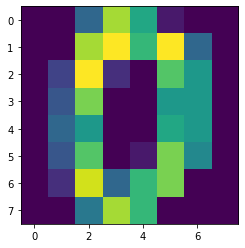

In [22]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0])

In [23]:
data = np.clip(digits.images[0], 0, 1)

In [24]:
data

array([[0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0.]])

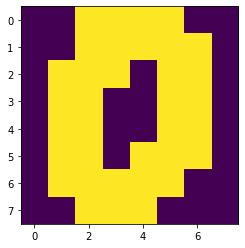

In [26]:
plt.imshow(data)

In [29]:
value = [0, 1, 2, 3, 4, 5, 6, 7]
initializer = tf.compat.v1.constant_initializer(value=value, dtype=tf.float32, verify_shape=False)
variable = tf.Variable(initializer(shape=[2, 4]))
variable

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]], dtype=float32)>

In [30]:
initializer = tf.compat.v1.keras.initializers.Identity()
variable = tf.Variable(initializer(shape=[2, 4]))
variable

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

In [31]:
initializer = tf.keras.initializers.ones()
initializer((1, 1))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [36]:
initializer = tf.keras.initializers.Orthogonal()
tf.Variable(initializer(shape=[2, 4]))

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.01190293,  0.0950366 , -0.81273806, -0.57470274],
       [ 0.7217648 ,  0.41716507, -0.27807412,  0.47718304]],
      dtype=float32)>

In [38]:
initializer = tf.keras.initializers.glorot_normal()
tf.Variable(initializer(shape=[2, 4]))

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.79180753, -0.07248124,  0.7314323 , -0.36147568],
       [-0.39908713, -0.08405548, -0.07791991,  0.4606575 ]],
      dtype=float32)>

In [39]:
initializer = tf.keras.initializers.glorot_uniform()
tf.Variable(initializer(shape=[2, 4]))

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.36510563, -0.21671176,  0.64517784,  0.09702849],
       [ 0.02169251, -0.22763443, -0.7834797 ,  0.5113423 ]],
      dtype=float32)>

In [40]:
initializer = tf.keras.initializers.he_normal()
tf.Variable(initializer(shape=[2, 4]))

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[ 1.6427372 , -1.8459024 , -0.89823264, -2.005217  ],
       [-0.03518993,  0.32561055, -0.17982066,  0.4885958 ]],
      dtype=float32)>

In [41]:
initializer = tf.keras.initializers.he_uniform()
tf.Variable(initializer(shape=[2, 4]))

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[ 0.28568137,  1.2139128 ,  1.679408  , -1.4107555 ],
       [-0.01471436, -0.5364541 ,  1.4401401 ,  1.3156863 ]],
      dtype=float32)>

In [42]:
initializer = tf.keras.initializers.lecun_normal()
tf.Variable(initializer(shape=[2, 4]))

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[-0.36015964, -0.45816866,  0.26722053,  0.36484218],
       [ 0.9693236 , -0.06133451,  0.5514024 ,  0.9193892 ]],
      dtype=float32)>

In [43]:
initializer = tf.keras.initializers.lecun_uniform()
tf.Variable(initializer(shape=[2, 4]))

<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
array([[-0.94675064, -0.34579164,  0.03427982, -0.5729761 ],
       [-0.73459893,  0.8522464 , -0.97082996, -0.36450225]],
      dtype=float32)>

In [46]:
keys_tensor = tf.constant([1, 2])
vals_tensor = tf.constant([3, 4])
input_tensor = tf.constant([1, 5])
table = tf.lookup.StaticHashTable(tf.lookup.KeyValueTensorInitializer(keys_tensor, vals_tensor), -1)
print(table.lookup(input_tensor))

tf.Tensor([ 3 -1], shape=(2,), dtype=int32)


In [49]:
init = tf.lookup.KeyValueTensorInitializer(keys=tf.constant(["emerson", "lake", "palmer"]), 
                                                            values=tf.constant([1, 2, 3], dtype=tf.int64))
table = tf.lookup.StaticVocabularyTable(init, num_oov_buckets=1)
input_tensor = tf.constant(["emerson", "lake", "palmer", "king"])
table[input_tensor].numpy()

array([1, 2, 3, 3], dtype=int64)

In [51]:
tf.nn.softmax([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>

In [53]:
g = tf.Graph()
with g.as_default():
    logits = [1, 2, 3]
    labels = [0, 2, 3]
    acc, acc_op = tf.compat.v1.metrics.accuracy(logits, labels)
    global_init = tf.compat.v1.global_variables_initializer()
    local_init = tf.compat.v1.local_variables_initializer()
sess = tf.compat.v1.Session(graph=g)
sess.run([global_init, local_init])
print(sess.run([acc, acc_op]))

[0.0, 0.6666667]


In [54]:
m = tf.keras.metrics.Accuracy()
m.update_state([1, 2, 3], [0, 2, 3])
m.result().numpy()

0.6666667

In [55]:
g = tf.Graph()
with g.as_default():
    values = [1, 2, 3]
    mean, update_op = tf.compat.v1.metrics.mean(values)
    global_init = tf.compat.v1.global_variables_initializer()
    local_init = tf.compat.v1.local_variables_initializer()
sess = tf.compat.v1.Session(graph=g)
print(sess.run([global_init, local_init]))
print(sess.run(update_op))
print(sess.run(mean))

[None, None]
2.0
2.0


In [56]:
m = tf.keras.metrics.Mean()
m.update_state([1, 2, 3])
m.result().numpy()

2.0

In [2]:
x = np.array([
    [1., 2.],
    [3., 4.],
    [5., 6.]
], dtype=np.float32).reshape((1, 3, 2, 1))
kernel = np.array([
    [1., 2.],
    [3., 4.]
], dtype=np.float32).reshape((2, 1, 1, 2))
tf.compat.v1.nn.depthwise_conv2d(x, kernel, strides=[1, 1, 1, 1], padding="VALID").numpy()

array([[[[10., 14.],
         [14., 20.]],

        [[18., 26.],
         [22., 32.]]]], dtype=float32)

In [3]:
logits = tf.constant([1., -1., 0., 1., -1., 0., 0.])
labels = tf.constant([0., 0., 0., 1., 1., 1., 0.5])
tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits).numpy()

array([1.3132617 , 0.31326172, 0.6931472 , 0.31326172, 1.3132617 ,
       0.6931472 , 0.6931472 ], dtype=float32)

In [4]:
strings = tf.constant(["Hello", "Tensorflow"])
tf.strings.length(strings).numpy()

array([ 5, 10])

In [5]:
print(tf.compat.v1.strings.split(['Hello World', 'a b c']))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 2]], shape=(5, 2), dtype=int64), values=tf.Tensor([b'Hello' b'World' b'a' b'b' b'c'], shape=(5,), dtype=string), dense_shape=tf.Tensor([2 3], shape=(2,), dtype=int64))


In [7]:
physical_devices = tf.config.list_physical_devices('CPU')
assert len(physical_devices) == 1, "No CPUs found"
configs = tf.config.get_logical_device_configuration(physical_devices[0])
try:
    assert configs in None
    tf.config.set_logical_device_configuration(physical_devices[0], [tf.config.LogicalDeviceConfiguration(), 
                                                                    tf.config.LogicalDeviceConfiguration()])
    configs = tf.config.get_logical_device_configuration(physical_devices[0])
    assert len(configs) == 2
except:
    pass

In [8]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type!='GPU'
except:
    pass

In [9]:
logical_devices = tf.config.list_logical_devices('GPU')
if len(logical_devices) > 0:
    with tf.device(logical_devices[0].name):
        one = tf.constant(1)
    with tf.device(logical_devices[1].name):
        two = tf.constant(2)

In [10]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs", len(physical_devices))

Num GPUs 0


In [11]:
def my_func(a):
    print("Pythn side effect")
    return a + a
a_fn = tf.function(my_func)

In [12]:
a_fn(tf.constant(1))

Pythn side effect


<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [13]:
tf.config.run_functions_eagerly(True)
a_fn(tf.constant(2))

Pythn side effect


<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [14]:
tf.config.run_functions_eagerly(False)
a_fn(2)

Pythn side effect


<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [15]:
x = tf.fill((2, 2), 1.0001)
y = tf.fill((2, 2), 1.)
print(tf.linalg.matmul(x, y))
tf.config.experimental.enable_tensor_float_32_execution(False)
print(tf.linalg.matmul(x, y))

tf.Tensor(
[[2.0002 2.0002]
 [2.0002 2.0002]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2.0002 2.0002]
 [2.0002 2.0002]], shape=(2, 2), dtype=float32)


In [4]:
cpu_devices = tf.config.list_physical_devices('CPU')
if cpu_devices:
    details = tf.config.experimental.get_device_details(cpu_devices[0])
    details.get('device_name', "Unknown CPU")

In [6]:
physical_devices = tf.config.list_physical_devices('CPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    assert tf.config.experimental.get_memory_growth(physical_devices[0])
except:
    pass

In [8]:
if tf.config.list_physical_devices('GPU'):
    tf.config.experimental.get_memory_info("GPU:0")

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
dataset = tf.data.Dataset.range(3)
tf.data.DatasetSpec.from_value(dataset)

DatasetSpec(TensorSpec(shape=(), dtype=tf.int64, name=None), TensorShape([]))

In [3]:
dataset = tf.data.Dataset.range(2)
for element in dataset:
    print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [4]:
dataset = tf.data.Dataset.range(2)
iterator = iter(dataset)
print(iterator.get_next())
print(iterator.get_next())

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [5]:
dataset = tf.data.Dataset.from_tensors(42)
iterator = iter(dataset)
optional = iterator.get_next_as_optional()
print(optional.has_value())
optional = iterator.get_next_as_optional()
print(optional.has_value())

tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(False, shape=(), dtype=bool)


In [7]:
dataset = tf.data.Dataset.from_tensors(42)
iterator = iter(dataset)
iterator.element_spec

TensorSpec(shape=(), dtype=tf.int32, name=None)

In [8]:
@tf.function(input_signature=[tf.data.IteratorSpec(tf.TensorSpec(shape=(), dtype=tf.int32, name=None))])
def square(iterator):
    x = iterator.get_next()
    return x * x
dataset = tf.data.Dataset.from_tensors(5)
iterator = iter(dataset)
print(square(iterator))

tf.Tensor(25, shape=(), dtype=int32)


In [9]:
dataset = tf.data.Dataset.range(42)
options = tf.data.Options()
options.deterministic = False
dataset = dataset.with_options(options)
print(dataset.options().deterministic)

False


In [10]:
dataset = tf.data.experimental.Counter().take(5)
list(dataset.as_numpy_iterator())

[0, 1, 2, 3, 4]

In [11]:
dataset.element_spec

TensorSpec(shape=(), dtype=tf.int64, name=None)

In [12]:
dataset = tf.data.experimental.Counter(start=10, step=-1).take(5)
list(dataset.as_numpy_iterator())

[10, 9, 8, 7, 6]

In [14]:
keys = tf.data.Dataset.range(100)
values = tf.data.Dataset.range(100).map(lambda x: tf.strings.as_string(x * 2))
ds = tf.data.Dataset.zip((keys, values))
init = tf.data.experimental.DatasetInitializer(ds)
table = tf.lookup.StaticHashTable(init, "")
table.lookup(tf.constant([0, 1, 2], dtype=tf.int64)).numpy()

array([b'0', b'2', b'4'], dtype=object)

In [18]:
def init_func(_):
    return (0.0, 0.0)
def reduce_func(state, value):
    return (state[0] + value["features"], state[1] + 1)
def finalize_func(s, n):
    return s/n
reducer = tf.data.experimental.Reducer(init_func, reduce_func, finalize_func)
reducer

In [19]:
dataset = tf.data.Dataset.from_tensor_slices(np.arange(6))
dataset = dataset.map(lambda x: tf.range(x))
print(dataset.element_spec.shape)
dataset = dataset.apply(tf.data.experimental.dense_to_ragged_batch(batch_size=2))
for batch in dataset:
    print(batch)

(None,)
<tf.RaggedTensor [[], [0]]>
<tf.RaggedTensor [[0, 1], [0, 1, 2]]>
<tf.RaggedTensor [[0, 1, 2, 3], [0, 1, 2, 3, 4]]>


In [22]:
import pdb
tf.data.experimental.enable_debug_mode()
def func(x):
    pdb.set_trace()
    x = x + 1
    return x
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.map(func)
for item in dataset:
    print(item)

> c:\users\jatin\appdata\local\temp\__autograph_generated_filek4h3a5mb.py(11)tf__func()
      9                 retval_ = ag__.UndefinedReturnValue()
     10                 ag__.ld(pdb).set_trace()
---> 11                 x = (ag__.ld(x) + 1)
     12                 try:
     13                     do_return = True

ipdb> 6
6
ipdb> print("hello")
hello
ipdb> exit()


BdbQuit: in user code:

    File "<ipython-input-22-545bcfb6f09a>", line 5, in func  *
        x = x + 1
    File "C:\Users\jatin\anaconda3\lib\bdb.py", line 88, in trace_dispatch
        return self.dispatch_line(frame)
    File "C:\Users\jatin\anaconda3\lib\bdb.py", line 113, in dispatch_line
        if self.quitting: raise BdbQuit

    BdbQuit: 


In [25]:
dataset = tf.data.Dataset.from_tensor_slices([1., 2., 0., 4.])
dataset = dataset.map(lambda x: tf.debugging.check_numerics(1. / x, "error"))
dataset = dataset.apply(tf.data.experimental.ignore_errors())

In [27]:
ds = tf.data.Dataset.range(100).map(lambda x: tf.strings.as_string(x * 2))
table = tf.data.experimental.index_table_from_dataset(ds, key_dtype=tf.int64)
table.lookup(tf.constant(['0', '2', '4'], dtype=tf.string)).numpy()

array([0, 1, 2], dtype=int64)

In [28]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
dataset = dataset.apply(tf.data.experimental.prefetch_to_device("/cpu:0"))
for element in dataset:
    print(element)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [29]:
keys = tf.data.Dataset.range(100)
values = tf.data.Dataset.range(100).map(lambda x: tf.strings.as_string(x * 2))
ds = tf.data.Dataset.zip((keys, values))
table = tf.data.experimental.table_from_dataset(ds, default_value="n/a", key_dtype=tf.int64)
table.lookup(tf.constant([0, 1, 2], dtype=tf.int64)).numpy()

array([b'0', b'2', b'4'], dtype=object)

In [34]:
dispatcher = tf.data.experimental.service.DispatchServer()
dispatcher_address = dispatcher.target.split("://")[1]
worker = tf.data.experimental.service.WorkerServer(tf.data.experimental.service.WorkerConfig(
    dispatcher_address=dispatcher_address))
dataset = tf.data.Dataset.range(10)
dataset = dataset.apply(tf.data.experimental.service.distribute(processing_mode="parallel_epochs", 
                                                                service=dispatcher.target))
print(list(dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [2]:
dispatcher = tf.data.experimental.service.DispatchServer()
dispatcher_address = dispatcher.target.split("://")[1]
worker = [tf.data.experimental.service.WorkerServer(tf.data.experimental.service.WorkerConfig(
    dispatcher_address=dispatcher_address)) for _ in range(2)]
dataset = tf.data.Dataset.range(10)
dataset = dataset.apply(tf.data.experimental.service.distribute(processing_mode="parallel_epochs", 
                                                                service=dispatcher.target))
print(list(dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
dispatcher = tf.data.experimental.service.DispatchServer()
dispatcher_address = dispatcher.target.split("://")[1]
worker = [tf.data.experimental.service.WorkerServer(tf.data.experimental.service.WorkerConfig(
    dispatcher_address=dispatcher_address)) for _ in range(2)]
dataset = tf.data.Dataset.range(10)
dataset = dataset.apply(tf.data.experimental.service.distribute(processing_mode="distributed_epoch", 
                                                                service=dispatcher.target))
print(list(dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 6, 5, 7, 9, 8]


In [5]:
dispatcher = tf.data.experimental.service.DispatchServer()
dispatcher_address = dispatcher.target.split("://")[1]
workers = [tf.data.experimental.service.WorkerServer(tf.data.experimental.service.WorkerConfig(
    dispatcher_address=dispatcher_address)) for _ in range(2)]
dataset = tf.data.Dataset.range(5)
dataset = dataset.map(lambda x: x * x)
dataset = dataset.apply(tf.data.experimental.service.distribute("parallel_epochs", dispatcher.target))
dataset = dataset.map(lambda x: x + 1)
print(sorted(list(dataset.as_numpy_iterator())))

[1, 1, 2, 2, 5, 5, 10, 10, 17, 17]


In [ ]:
range5_dataset = tf.data.Dataset.range(5)
dataset = range5_dataset.apply(tf.data.experimental.service.distribute("parallel_epochs", "localhost:5000", 
                                                                       job_name="my_job_name"))
for iteration in range(3):
    print(list(dataset))

In [2]:
n = 10
q = 3
d = 7
x = tf.zeros([n, q])
y = tf.ones([n, d])
param = tf.Variable([1.0, 2.0, 3.0])
scalar = 1.0
tf.debugging.assert_shapes([
    (x, ('N', 'Q')),
    (y, ('N', 'D')),
    (param, ('Q')),
    (scalar, ())
])

In [6]:
c = tf.Variable(np.inf)
try:
    tf.debugging.check_numerics(x, message="Checking c")
except Exception as e:
    assert "Checking c: Tensor had Inf values" in e.message

In [8]:
tf.debugging.enable_check_numerics()
@tf.function
def square_log_x_plus_1(x):
    v = tf.math.log(x + 1)
    return tf.math.square(v)
x = -1.0
y = square_log_x_plus_1(x)
z = -y

INFO:tensorflow:Enabled check-numerics callback in thread MainThread


InvalidArgumentError: Graph execution error:

Detected at node 'Log/CheckNumericsV2_1' defined at (most recent call last):
    File "C:\Users\jatin\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\jatin\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\jatin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\jatin\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\jatin\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\jatin\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\jatin\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\jatin\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\jatin\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\jatin\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\jatin\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\jatin\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\jatin\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\jatin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\jatin\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\jatin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\jatin\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\jatin\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\jatin\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\jatin\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\jatin\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\jatin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "C:\Users\jatin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\jatin\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\jatin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\jatin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\jatin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-8-ca5379cafac1>", line 7, in <module>
      y = square_log_x_plus_1(x)
    File "<ipython-input-8-ca5379cafac1>", line 4, in square_log_x_plus_1
      v = tf.math.log(x + 1)
Node: 'Log/CheckNumericsV2_1'
!!! Detected Infinity or NaN in output 0 of graph op "Log" (# of outputs: 1) !!!
  dtype: <dtype: 'float32'>
  shape: ()

  Input tensor: Tensor("Log/x:0", shape=(), dtype=float32)
  Graph name: "square_log_x_plus_1"

  Stack trace of op's creation ("->": inferred user code):
    + ... (Omitted 14 frames)
    + ...s\jatin\anaconda3\lib\site-packages\tornado\gen.py (L234) wrapper
 -> |   yielded = ctx_run(next, result)
    + ...naconda3\lib\site-packages\ipykernel\kernelbase.py (L268) dispatch_shell
 -> |   yield gen.maybe_future(handler(stream, idents, msg))
    + ...s\jatin\anaconda3\lib\site-packages\tornado\gen.py (L234) wrapper
 -> |   yielded = ctx_run(next, result)
    + ...naconda3\lib\site-packages\ipykernel\kernelbase.py (L543) execute_request
 -> |   self.do_execute(
    + ...s\jatin\anaconda3\lib\site-packages\tornado\gen.py (L234) wrapper
 -> |   yielded = ctx_run(next, result)
    + ...\anaconda3\lib\site-packages\ipykernel\ipkernel.py (L306) do_execute
 -> |   res = shell.run_cell(code, store_history=store_history, silent=silent)
    + ...\anaconda3\lib\site-packages\ipykernel\zmqshell.py (L536) run_cell
 -> |   return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    + ...lib\site-packages\IPython\core\interactiveshell.py (L2894) run_cell
 -> |   result = self._run_cell(
    + ...lib\site-packages\IPython\core\interactiveshell.py (L2940) _run_cell
 -> |   return runner(coro)
    + ...a3\lib\site-packages\IPython\core\async_helpers.py (L68) _pseudo_sync_runner
 -> |   coro.send(None)
    + ...lib\site-packages\IPython\core\interactiveshell.py (L3165) run_cell_async
 -> |   has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    + ...lib\site-packages\IPython\core\interactiveshell.py (L3357) run_ast_nodes
 -> |   if (await self.run_code(code, result,  async_=asy)):
    + ...lib\site-packages\IPython\core\interactiveshell.py (L3437) run_code
 -> |   exec(code_obj, self.user_global_ns, self.user_ns)
    + <ipython-input-8-ca5379cafac1> (L7) <module>
 -> |   y = square_log_x_plus_1(x)
    + ...packages\tensorflow\python\util\traceback_utils.py (L150) error_handler
    |   return fn(*args, **kwargs)
    + ...e-packages\tensorflow\python\eager\def_function.py (L915) __call__
    |   result = self._call(*args, **kwds)
    + ...e-packages\tensorflow\python\eager\def_function.py (L963) _call
    |   self._initialize(args, kwds, add_initializers_to=initializers)
    + ...e-packages\tensorflow\python\eager\def_function.py (L785) _initialize
    |   self._stateful_fn._get_concrete_function_internal_garbage_collected(  # pylint: disable=protected-access
    + ...\site-packages\tensorflow\python\eager\function.py (L2983) _get_concrete_function_internal_garbage_collected
    |   graph_function, _ = self._maybe_define_function(args, kwargs)
    + ...\site-packages\tensorflow\python\eager\function.py (L3292) _maybe_define_function
    |   graph_function = self._create_graph_function(args, kwargs)
    + ...\site-packages\tensorflow\python\eager\function.py (L3130) _create_graph_function
    |   func_graph_module.func_graph_from_py_func(
    + ...packages\tensorflow\python\framework\func_graph.py (L1161) func_graph_from_py_func
    |   func_outputs = python_func(*func_args, **func_kwargs)
    + ...e-packages\tensorflow\python\eager\def_function.py (L677) wrapped_fn
    |   out = weak_wrapped_fn().__wrapped__(*args, **kwds)
    + ...packages\tensorflow\python\framework\func_graph.py (L1136) autograph_handler
    |   return autograph.converted_call(
    + <ipython-input-8-ca5379cafac1> (L4) square_log_x_plus_1
 -> |   v = tf.math.log(x + 1)
    + ...ite-packages\tensorflow\python\ops\gen_math_ops.py (L5495) log
    |   _, _, _op, _outputs = _op_def_library._apply_op_helper(
    + ...ages\tensorflow\python\framework\op_def_library.py (L740) _apply_op_helper
    |   op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    + ...packages\tensorflow\python\framework\func_graph.py (L693) _create_op_internal
    |   return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    + ...b\site-packages\tensorflow\python\framework\ops.py (L3776) _create_op_internal
    |   ret = Operation(
    + ...b\site-packages\tensorflow\python\framework\ops.py (L2175) __init__
    |   self._traceback = tf_stack.extract_stack_for_node(self._c_op)

 : Tensor had -Inf values
	 [[{{node Log/CheckNumericsV2_1}}]] [Op:__inference_square_log_x_plus_1_54]

In [11]:
tf.debugging.enable_check_numerics()
x = np.array([[0.0, -1.0], [4.0, 3.0]])
y = tf.math.sqrt(x)
z = tf.matmul(y, y)

INFO:tensorflow:Enabled check-numerics callback in thread MainThread


InvalidArgumentError: 

!!! Detected Infinity or NaN in output 0 of eagerly-executing op "Sqrt" (# of outputs: 1) !!!
  dtype: <dtype: 'float64'>
  shape: (2, 2)
  # of +NaN elements: 1

  Input tensor: tf.Tensor(
[[ 0. -1.]
 [ 4.  3.]], shape=(2, 2), dtype=float64)

 : Tensor had NaN values [Op:CheckNumericsV2]

In [4]:
global_batch_size = 4
strategy = tf.distribute.MirroredStrategy()
dataset = tf.data.Dataset.from_tensors(([1.], [1.])).repeat(4).batch(global_batch_size)
dist_dataset = strategy.experimental_distribute_dataset(dataset)
@tf.function
def train_step(input):
    features, labels = input
    return labels - 0.3 * features
for x in dist_dataset:
    loss = strategy.run(train_step, args=(x,))
    print("Loss is", loss)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Loss is tf.Tensor(
[[0.7]
 [0.7]
 [0.7]
 [0.7]], shape=(4, 1), dtype=float32)


In [9]:
strategy = tf.distribute.MirroredStrategy()
dataset = tf.data.Dataset.range(100).batch(2)
dist_dataset = strategy.experimental_distribute_dataset(dataset)
dist_dataset_iterator = iter(dist_dataset)
@tf.function
def one_step(input):
    return input
step_num = 5
for _ in range(step_num):
    strategy.run(one_step, args=(dist_dataset_iterator.get_next(),))
strategy.experimental_local_results(dist_dataset_iterator.get_next())

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


(<tf.Tensor: shape=(2,), dtype=int64, numpy=array([10, 11], dtype=int64)>,)

In [11]:
strategy = tf.distribute.MirroredStrategy()
global_batch_size = 2
steps_per_loop = 2
dataset = tf.data.Dataset.range(10).batch(global_batch_size)
distributed_iterator = iter(strategy.experimental_distribute_dataset(dataset))
def step_fn(x):
    return x
@tf.function
def train_fn(distributed_iterator):
    for _ in tf.range(steps_per_loop):
        optional_data = distributed_iterator.get_next_as_optional()
        if not optional_data.has_value():
            break
        per_replica_results = strategy.run(step_fn, args=(optional_data.get_value(),))
        tf.print(strategy.experimental_local_results(per_replica_results))
train_fn(distributed_iterator)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
([0 1],)
([2 3],)


In [12]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)
dataset = tf.dataset.range(16)
distributed_dataset_on_host = (strategy.experimental_distribute_dataset(dataset, tf.distribute.InputOptions(
    experimental_replication_mode=experimental_replication_mode.PER_WORKER, 
    experimental_place_dataset_on_device=False,
    experimental_per_replica_buffer_size=1
)))

ValueError: Please provide a TPU Name to connect to.

In [13]:
strategy = tf.distribute.MirroredStrategy(["CPU:0", "CPU:1"])
with strategy.scope():
    x = tf.Variable(1.)
x

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0', '/job:localhost/replica:0/task:0/device:CPU:1')


MirroredVariable:{
  0: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>,
  1: <tf.Variable 'Variable/replica_1:0' shape=() dtype=float32, numpy=1.0>
}

In [16]:
strategy = tf.distribute.MirroredStrategy(["CPU:0", "CPU:1"])
def step_fn():
    i = tf.distribute.get_replica_context().replica_id_in_sync_group
    return tf.identity(i)
per_replica_result = strategy.run(step_fn)
total = strategy.reduce("SUM", per_replica_result, axis=None)
total

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0', '/job:localhost/replica:0/task:0/device:CPU:1')
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [20]:
strategy = tf.distribute.MultiWorkerMirroredStrategy()
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=(5,))
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
def dataset_fn(ctx):
    x = np.random.random((2, 5)).astype(np.float32)
    y = np.random.randint(2, size=(2, 1))
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    return dataset.repeat().batch(1, drop_remainder=True)
dist_dataset = strategy.distribute_datasets_from_function(dataset_fn)
model.compile(loss = ["mean_squared_error"])
model.fit(dist_dataset, steps_per_epoch=5)

INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:CPU:0',), communication = CommunicationImplementation.AUTO
5/5 [==============================] - 2s 5ms/step - loss: 0.3698


In [3]:
strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")
with strategy.scope():
    v = tf.Variable(1.0)
    print(v.device)

def step_fn(x):
    return x * 2
result = 0
for i in range(10):
    result += strategy.run(step_fn, args=(i,))
print(result)

/job:localhost/replica:0/task:0/device:CPU:0
90


In [4]:
strategy = tf.distribute.MirroredStrategy(["CPU:0", "CPU:1"])
def func():
    replica_context = tf.distribute.get_replica_context()
    return replica_context.replica_id_in_sync_group
strategy.run(func)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0', '/job:localhost/replica:0/task:0/device:CPU:1')


PerReplica:{
  0: <tf.Tensor: shape=(), dtype=int32, numpy=0>,
  1: <tf.Tensor: shape=(), dtype=int32, numpy=1>
}

In [9]:
cluster_resolver = tf.distribute.cluster_resolver.GCEClusterResolver("my-project", "us-west1", "my-instance-group", 
                                                                     task_type="worker", task_id=0, port=465)
strategy = tf.distribue.experimental.MultiWorkerMirroredStrategy(cluster_resolver=cluster_resolver)

ApplicationDefaultCredentialsError: The Application Default Credentials are not available. They are available if running in Google Compute Engine. Otherwise, the environment variable GOOGLE_APPLICATION_CREDENTIALS must be defined pointing to a file defining the credentials. See https://developers.google.com/accounts/docs/application-default-credentials for more information.

In [12]:
cluster_0 = tf.train.ClusterSpec({"worker": ["worker.example.com:2222", "worker1.example.com:2222"]})
cluster_resolver_0 = tf.distribute.cluster_resolver.SimpleClusterResolver(cluster_0, task_type="woker", 
                                                                          task_id=0, rpc_layer="grpc")
cluster_1 = tf.train.ClusterSpec({"ps":["ps0.example.com:2222", "ps1.example.com:2222"]})
cluster_resolver_1 = tf.distribute.cluster_resolver.SimpleClusterResolver(cluster_1, task_type="ps", 
                                                                          task_id=0, rpc_layer="grpc")
cluster_resolver = tf.distribute.cluster_resolver.UnionClusterResolver(cluster_resolver_0, cluster_resolver_1)

AttributeError: module 'tensorflow._api.v2.distribute.cluster_resolver' has no attribute 'UnionClusterResolver'

In [13]:
strategy = tf.distribute.experimental.CentralStorageStrategy()
ds = tf.data.Dataset.range(5).batch(2)
dist_dataset = strategy.experimental_distribute_dataset(ds)
with strategy.scope():
    @tf.function
    def train_step(val):
        return val + 1
    for x in dist_dataset:
        strategy.run(train_step, args=(x,))

INFO:tensorflow:ParameterServerStrategy (CentralStorageStrategy if you are using a single machine) with compute_devices = ['/job:localhost/replica:0/task:0/device:CPU:0'], variable_device = '/job:localhost/replica:0/task:0/device:CPU:0'


In [2]:
def value_fn(context):
    return context.replica_id_in_sync_group / context.num_replicas_in_sync
context = tf.distribute.experimental.ValueContext(replica_id_in_sync_group=2, num_replicas_in_sync=4)
per_replica_value = value_fn(context)
per_replica_value

0.5

In [7]:
partitioner = tf.distribute.experimental.partitioners.FixedShardsPartitioner(num_shards=2)
partitions = partitioner(tf.TensorShape([10, 3]), tf.float32)
partitions

[2, 1]

In [10]:
partitioner = tf.distribute.experimental.partitioners.MaxSizePartitioner(max_shard_bytes=4)
partitions = partitioner(tf.TensorShape([6, 1]), tf.float32)
print(partitions)
partitioner = tf.distribute.experimental.partitioners.MaxSizePartitioner(max_shard_bytes=4, max_shards=2)
partitions = partitioner(tf.TensorShape([6, 1]), tf.float32)
print(partitions)
partitioner = tf.distribute.experimental.partitioners.MaxSizePartitioner(max_shard_bytes=1024)
partitions = partitioner(tf.TensorShape([6, 1]), tf.float32)
print(partitions)

[6, 1]
[2, 1]
[1, 1]


In [ ]:
partitioner = tf.distribute.experimental.partitioners.MinSizePartitioner(min_shard_bytes=4, max_shards=2)
partitions = partitioner(tf.TensorShape([6, 1]), tf.float32)
print(partitions)
partitioner = tf.distribute.experimental.partitioners.MinSizePartitioner(min_shard_bytes=4, max_shards=10)
partitions = partitioner(tf.TensorShape([6, 1]), tf.float32)
print(partitions)

[2, 1]
[6, 1]


In [2]:
head = tf.estimator.BinaryClassHead()
logits = np.array(((45,), (-41, ), ), dtype=np.float32)
labels = np.array(((1, ), (1, ), ), dtype=np.int32)
features = {'x':np.array(((42, ), ), dtype=np.float32)}
loss = head.loss(labels, logits, features=features)
print('{:.2f}'.format(loss.numpy()))
eval_metrics = head.metrics()
updated_metrics = head.update_metrics(eval_metrics, features, logits, labels)
for k in sorted(updated_metrics):
    print('{}: {:.2f}'.format(k, updated_metrics[k].result().numpy()))
preds = head.predictions(logits)
print(preds['logits'])

20.50
accuracy: 0.50
accuracy_baseline: 1.00
auc: 0.00
auc_precision_recall: 1.00
average_loss: 20.50
label/mean: 1.00
precision: 1.00
prediction/mean: 0.50
recall: 0.50
tf.Tensor(
[[ 45.]
 [-41.]], shape=(2, 1), dtype=float32)


In [4]:
n_classes = 3
head = tf.estimator.MultiClassHead(n_classes)
logits = np.array(((10, 0, 0), (0, 10, 0), ), dtype=np.float32)
labels = np.array(((1, ), (1,)), dtype=np.int64)
features = {'x':np.array(((42, ), ), dtype=np.int32)}
loss = head.loss(labels, logits, features=features)
print('{:.2f}'.format(loss.numpy()))
eval_metrics = head.metrics()
updated_metrics = head.update_metrics(eval_metrics, features, logits, labels)
for k in sorted(updated_metrics):
    print('{}: {:.2f}'.format(k, updated_metrics[k].result().numpy()))
preds = head.predictions(logits)
print(preds["logits"])

5.00
accuracy: 0.50
average_loss: 5.00
tf.Tensor(
[[10.  0.  0.]
 [ 0. 10.  0.]], shape=(2, 3), dtype=float32)


In [8]:
head1 = tf.estimator.MultiLabelHead(n_classes=2, name='head1')
head2 = tf.estimator.MultiLabelHead(n_classes=3, name="head2")
multi_head = tf.estimator.MultiHead([head1, head2])
logits = {
    'head1':np.array([[-10., 10.], [-15., 10.]], dtype=np.float32),
    'head2':np.array([[20., -20., 20.], [-30., 20., -20.]], dtype=np.float32)
}
labels = {
    'head1':np.array([[1, 0], [1, 1]], dtype=np.int64),
    'head2':np.array([[0, 1, 0], [1, 1, 0]], dtype=np.float32)
}
features = {'x':np.array(((42,), ), dtype=np.float32)}
loss = multi_head.loss(labels, logits, features=features)
print('{:.2f}'.format(loss.numpy()))
eval_metrics = multi_head.metrics()
updated_metrics = multi_head.update_metrics(eval_metrics, features, logits, labels)
for k in sorted(updated_metrics):
    print('{}: {:.2f}'.format(k, updated_metrics[k].result().numpy()))
preds = multi_head.predictions(logits)
print(preds[('head1', 'logits')])

23.75
auc/head1: 0.17
auc/head2: 0.33
auc_precision_recall/head1: 0.60
auc_precision_recall/head2: 0.40
average_loss/head1: 8.75
average_loss/head2: 15.00
loss/head1: 8.75
loss/head2: 15.00
tf.Tensor(
[[-10.  10.]
 [-15.  10.]], shape=(2, 2), dtype=float32)


In [5]:
class Vehicle(tf.experimental.BatchableExtensionType):
    top_speed: tf.Tensor
    mgp: tf.Tensor
batch = Vehicle([120, 150, 80], [30, 40, 12])
tf.map_fn(lambda vehicle: vehicle.top_speed * vehicle.mgp, batch, fn_output_signature=tf.int32).numpy()

array([3600, 6000,  960])

In [6]:
optional = tf.experimental.Optional.from_value(42)
print(optional.has_value())
print(optional.get_value())

tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(42, shape=(), dtype=int32)


In [7]:
optional = tf.experimental.Optional.empty(tf.TensorSpec(shape=(), dtype=tf.int32, name=None))
print(optional.has_value())

tf.Tensor(False, shape=(), dtype=bool)


In [11]:
class MaskedTensor(tf.experimental.ExtensionType):
    values: tf.Tensor
    mask: tf.Tensor
@tf.experimental.dispatch_for_binary_elementwise_apis(MaskedTensor, MaskedTensor)
def binary_elementwise_api_handler(api_func, x, y):
    return MaskedTensor(api_func(x.values, y.values), x.mask & y.mask)
a = MaskedTensor([1, 2, 3, 4, 5], [True, True, True, True, False])
b = MaskedTensor([2, 4, 6, 8, 0], [True, True, True, False, True])
c = tf.add(a, b)
print(f"values={c.values.numpy()}, mask={c.mask.numpy()}")

values=[ 3  6  9 12  5], mask=[ True  True  True False False]


In [20]:
class MaskedTensor(tf.experimental.ExtensionType):
    values: tf.Tensor
    mask: tf.Tensor
@tf.experimental.dispatch_for_unary_elementwise_apis(MaskedTensor)
def unary_elementwise_api_handler(api_func, x):
    return MaskedTensor(api_func(x.values), x.mask)
mt = MaskedTensor([1, -2, -3], [True, False, True])
abs_mt = tf.abs(mt)
print(f"values={abs_mt.values.numpy()}, mask={abs_mt.mask.numpy()}")

values=[1 2 3], mask=[ True False  True]


In [23]:
class MyTensor(tf.experimental.ExtensionType):
    value: tf.Tensor
@tf.experimental.dispatch_for_api(tf.abs)
def my_abs(x: MyTensor):
    return MyTensor(tf.abs(x.value))
tf.abs(MyTensor(5))

MyTensor(value=<tf.Tensor: shape=(), dtype=int32, numpy=5>)

In [26]:
a = tf.constant([1, 10])
dlcapsule = tf.experimental.dlpack.to_dlpack(a)

<capsule object "dltensor" at 0x000002175A89ADE0>

In [22]:
a = {"price":tf.constant([1, 2, 3, 4, 5, 6, 7, 89, 0])}
d = tf.feature_column.numeric_column("price")
c = tf.feature_column.bucketized_column(d, boundaries=[1, 5])

In [23]:
tf.keras.layers.DenseFeatures(c)(a)

<tf.Tensor: shape=(9, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [24]:
video_id = tf.feature_column.categorical_column_with_identity(key="video_id", num_buckets=1000000, default_value=0)
columns = [tf.feature_column.embedding_column(video_id, 9)]
features = {'video_id': tf.sparse.from_dense([[2, 85, 0, 0, 0], [33, 78, 2, 73, 1]])}
input_layer = tf.keras.layers.DenseFeatures(columns)
input_layer(features)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[-0.11404641,  0.06518342, -0.08254052,  0.10212558, -0.11642231,
        -0.24987225,  0.09505392, -0.06127232, -0.37782758],
       [ 0.20339487, -0.18535434,  0.04693354,  0.07518338,  0.11609379,
         0.085743  , -0.21502422,  0.12123827, -0.0815907 ]],
      dtype=float32)>

In [16]:
colors = tf.feature_column.categorical_column_with_vocabulary_list("colors", ['a', 'b', 'x', 'y', 'z'], default_value=0)
b = tf.feature_column.indicator_column(colors)
a = {"colors":tf.constant(['a', 'b', 'c', 'd'])}
input_layer = tf.keras.layers.DenseFeatures(b)
input_layer(a)

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [34]:
age = tf.feature_column.numeric_column('Age')
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[1, 3, 5])
crossed = tf.feature_column.crossed_column([age_buckets, colors], 10)
indicator = tf.feature_column.indicator_column(crossed)
features = {"Age":tf.constant([1, 2, 3, 4, 5, 6]), "colors":tf.constant(['a', 'b', 'c', 'd', 'e', 'f'])}
input_layer = tf.keras.layers.DenseFeatures(indicator)

In [32]:
input_layer(features)

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [37]:
x = [[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], [[7.0, 8.0, 9.0], [10.0, 11.0, 12.0]]]
tf.image.adjust_brightness(x, delta=0.1)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 1.1,  2.1,  3.1],
        [ 4.1,  5.1,  6.1]],

       [[ 7.1,  8.1,  9.1],
        [10.1, 11.1, 12.1]]], dtype=float32)>

In [39]:
tf.image.adjust_contrast(x, 2.)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[-3.5, -2.5, -1.5],
        [ 2.5,  3.5,  4.5]],

       [[ 8.5,  9.5, 10.5],
        [14.5, 15.5, 16.5]]], dtype=float32)>

In [41]:
tf.image.adjust_gamma(x, 0.2)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[1.       , 1.1486983, 1.245731 ],
        [1.319508 , 1.3797296, 1.4309691]],

       [[1.4757732, 1.5157166, 1.5518456],
        [1.5848932, 1.6153942, 1.6437519]]], dtype=float32)>

In [42]:
tf.image.adjust_hue(x, 0.2)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 2.3999996,  1.       ,  3.       ],
        [ 5.3999996,  4.       ,  6.       ]],

       [[ 8.4      ,  7.       ,  9.       ],
        [11.4      , 10.       , 12.       ]]], dtype=float32)>

In [43]:
tf.image.adjust_jpeg_quality(x, 75)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [44]:
tf.image.adjust_saturation(x, 0.5)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 2. ,  2.5,  3. ],
        [ 5. ,  5.5,  6. ]],

       [[ 8. ,  8.5,  9. ],
        [11. , 11.5, 12. ]]], dtype=float32)>

In [45]:
x = [[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0], [10.0, 11.0, 12.0]], 
    [[13.0, 14.0, 15.0], [16.0, 17.0, 18.0], [19.0, 20.0, 21.0], [22.0, 23.0, 24.0]],
    [[25.0, 26.0, 27.0], [28.0, 29.0, 30.0], [31.0, 32.0, 33.0], [34.0, 35.0, 36.0]],
    [[37.0, 38.0, 39.0], [41.0, 42.0, 43.0], [44.0, 45.0, 46.0], [47.0, 48.0, 49.0]]]
tf.image.central_crop(x, 0.5)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[16., 17., 18.],
        [19., 20., 21.]],

       [[28., 29., 30.],
        [31., 32., 33.]]], dtype=float32)>

In [47]:
BATCH_SIZE = 1
NUM_BOXES = 5
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
CHANNELS = 3
CROP_SIZE = (24, 24)
image = tf.random.normal(shape=(BATCH_SIZE, IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS))
boxes = tf.random.uniform(shape=(NUM_BOXES, 4))
box_indices = tf.random.uniform(shape=(NUM_BOXES, ), minval=0, maxval=BATCH_SIZE, dtype=tf.int32)
output = tf.image.crop_and_resize(image, boxes, box_indices, CROP_SIZE)
output.shape

TensorShape([5, 24, 24, 3])

In [48]:
image = tf.constant(np.arange(1, 28, dtype=np.float32), shape=[3, 3, 3])
print(image[:,:,0])
cropped_image = tf.image.crop_to_bounding_box(image, 0, 0, 2, 2)
cropped_image[:, :, 0]

tf.Tensor(
[[ 1.  4.  7.]
 [10. 13. 16.]
 [19. 22. 25.]], shape=(3, 3), dtype=float32)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.,  4.],
       [10., 13.]], dtype=float32)>

In [50]:
img = tf.zeros([1, 3, 3, 3])
box = np.array([0, 0, 1, 1])
boxes = box.reshape([1, 1, 4])
colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
tf.image.draw_bounding_boxes(img, boxes, colors)

<tf.Tensor: shape=(1, 3, 3, 3), dtype=float32, numpy=
array([[[[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [0., 0., 0.],
         [1., 0., 0.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]]]], dtype=float32)>

In [51]:
x = [[[[0.0], [1.0], [2.0]], [[3.0], [4.0], [5.0]], [[6.0], [7.0], [8.0]]]]
tf.image.extract_glimpse(x, size=(2, 2), offsets=[[1, 1]], centered=False, normalized=False)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[4.],
         [5.]],

        [[7.],
         [8.]]]], dtype=float32)>

In [53]:
n = 10
images = [[[[x * n + y + 1] for y in range(n)] for x in range(n)]]
tf.image.extract_patches(images=images, sizes=[1, 3, 3, 1], strides=[1, 5, 5, 1], rates=[1, 1, 1, 1], padding='VALID')

<tf.Tensor: shape=(1, 2, 2, 9), dtype=int32, numpy=
array([[[[ 1,  2,  3, 11, 12, 13, 21, 22, 23],
         [ 6,  7,  8, 16, 17, 18, 26, 27, 28]],

        [[51, 52, 53, 61, 62, 63, 71, 72, 73],
         [56, 57, 58, 66, 67, 68, 76, 77, 78]]]])>

In [55]:
x = [[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], [[7.0, 8.0, 9.0], [10.0, 11.0, 12.0]]]
tf.image.flip_left_right(x)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 4.,  5.,  6.],
        [ 1.,  2.,  3.]],

       [[10., 11., 12.],
        [ 7.,  8.,  9.]]], dtype=float32)>

In [56]:
x = [[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], [[7.0, 8.0, 9.0], [10.0, 11.0, 12.0]]]
tf.image.flip_left_right(x)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 4.,  5.,  6.],
        [ 1.,  2.,  3.]],

       [[10., 11., 12.],
        [ 7.,  8.,  9.]]], dtype=float32)>

In [57]:
tf.image.flip_up_down(x)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 7.,  8.,  9.],
        [10., 11., 12.]],

       [[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]]], dtype=float32)>

In [58]:
original = tf.constant([[[1.0], [2.0], [3.0]]])
converted = tf.image.grayscale_to_rgb(original)
print(converted.numpy())

[[[1. 1. 1.]
  [2. 2. 2.]
  [3. 3. 3.]]]


In [59]:
BATCH_SIZE = 1
IMAGE_HEIGHT = 5
IMAGE_WIDTH = 5
CHANNELS = 1
image = tf.reshape(tf.range(IMAGE_HEIGHT * IMAGE_WIDTH * CHANNELS, delta=1, dtype=tf.float32), 
                   shape=(BATCH_SIZE, IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS))
dy, dx = tf.image.image_gradients(image)
print(image[0, :, :, 0])
print(dy[0, :, :, 0])
print(dx[0, :, :, 0])

tf.Tensor(
[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]], shape=(5, 5), dtype=float32)
tf.Tensor(
[[5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [0. 0. 0. 0. 0.]], shape=(5, 5), dtype=float32)
tf.Tensor(
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]], shape=(5, 5), dtype=float32)


In [60]:
padded_image = tf.image.pad_to_bounding_box(x, 1, 1, 4, 4)
padded_image

<tf.Tensor: shape=(4, 4, 3), dtype=float32, numpy=
array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 7.,  8.,  9.],
        [10., 11., 12.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]], dtype=float32)>

In [61]:
image = tf.constant(np.arange(1, 13, dtype=np.int32), shape=[2, 2, 3])
new_image = tf.image.per_image_standardization(image)
new_image

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[-1.593255  , -1.3035723 , -1.0138896 ],
        [-0.7242068 , -0.4345241 , -0.14484136]],

       [[ 0.14484136,  0.4345241 ,  0.7242068 ],
        [ 1.0138896 ,  1.3035723 ,  1.593255  ]]], dtype=float32)>

In [62]:
tf.image.random_brightness(x, 0.2)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 0.8405473,  1.8405473,  2.8405473],
        [ 3.8405473,  4.8405476,  5.8405476]],

       [[ 6.8405476,  7.8405476,  8.840548 ],
        [ 9.840548 , 10.840548 , 11.840548 ]]], dtype=float32)>

In [63]:
tf.image.random_contrast(x, 0.2, 0.5)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[4.0306225, 5.0306225, 6.0306225],
        [5.0102077, 6.0102077, 7.0102077]],

       [[5.9897923, 6.9897923, 7.9897923],
        [6.9693775, 7.9693775, 8.9693775]]], dtype=float32)>

In [64]:
image = [[1, 2, 3], [4, 5, 6]]
result = tf.image.random_crop(value=image, size=(1, 3))
result.shape.as_list()

[1, 3]

In [65]:
image = np.array([[[1], [2]], [[3], [4]]])
tf.image.random_flip_left_right(image, 5).numpy().tolist()

[[[2], [1]], [[4], [3]]]

In [67]:
tf.image.random_flip_up_down(image, 3).numpy().tolist()

[[[3], [4]], [[1], [2]]]

In [68]:
tf.image.random_hue(x, 0.2)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 1.       ,  1.6381698,  3.       ],
        [ 4.       ,  4.63817  ,  6.       ]],

       [[ 7.       ,  7.63817  ,  9.       ],
        [10.       , 10.63817  , 12.       ]]], dtype=float32)>

In [2]:
x = [[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], [[7.0, 8.0, 9.0], [10.0, 11.0, 12.0]]]
tf.image.random_jpeg_quality(x, 75, 95)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [3]:
tf.image.random_saturation(x, 5, 10)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 0. ,  1.5,  3. ],
        [ 0. ,  3. ,  6. ]],

       [[ 0. ,  4.5,  9. ],
        [ 0. ,  6. , 12. ]]], dtype=float32)>

In [10]:
image = tf.constant([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1]
])
image = image[tf.newaxis, ..., tf.newaxis]
tf.image.resize(image, [3, 5])[0, ..., 0].numpy()

array([[0.6666667, 0.3333333, 0.       , 0.       , 0.       ],
       [0.       , 0.       , 1.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.3333335, 0.6666665]],
      dtype=float32)

In [11]:
image = np.arange(75).reshape(5, 5, 3)
tf.image.resize_with_crop_or_pad(image, 3, 3)

<tf.Tensor: shape=(3, 3, 3), dtype=int32, numpy=
array([[[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]],

       [[33, 34, 35],
        [36, 37, 38],
        [39, 40, 41]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56]]])>

In [13]:
original = tf.constant([[[1.0, 2.0, 3.0]]])
converted = tf.image.rgb_to_grayscale(original)
converted.numpy()

array([[[1.8149]]], dtype=float32)

In [14]:
blue_image = tf.stack([
    tf.zeros([5, 5]),
    tf.zeros([5, 5]),
    tf.ones([5, 5])
], axis=-1)
blue_hsv_image = tf.image.rgb_to_hsv(blue_image)
blue_hsv_image[0, 0].numpy()

array([0.6666667, 1.       , 1.       ], dtype=float32)

In [15]:
x = tf.constant([[[1.0, 2.0, 3.0]]])
tf.image.rgb_to_yiq(x)

<tf.Tensor: shape=(1, 1, 3), dtype=float32, numpy=array([[[ 1.815     , -0.91724455,  0.09962624]]], dtype=float32)>

In [21]:
a = tf.constant([[[1], [2]], [[3], [4]]])
tf.image.rot90(a)[..., 0]

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 4],
       [1, 3]])>

In [22]:
x = [[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], [[7.0, 8.0, 9.0], [10.0, 11.0, 12.0]]]
seed = (1, 2)
tf.image.stateless_random_brightness(x, 0.2, seed)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 1.1376241,  2.1376243,  3.1376243],
        [ 4.1376243,  5.1376243,  6.1376243]],

       [[ 7.1376243,  8.137624 ,  9.137624 ],
        [10.137624 , 11.137624 , 12.137624 ]]], dtype=float32)>

In [23]:
tf.image.stateless_random_contrast(x, 0.2, 0.5, seed)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[3.4605184, 4.4605184, 5.4605184],
        [4.820173 , 5.820173 , 6.820173 ]],

       [[6.179827 , 7.179827 , 8.179827 ],
        [7.5394816, 8.539482 , 9.539482 ]]], dtype=float32)>

In [24]:
tf.image.stateless_random_crop(value=image, size=(1, 2, 3), seed=seed)

<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[3, 4, 5],
        [6, 7, 8]]])>

In [25]:
image = np.array([[[1], [2]], [[3], [4]]])
seed = (2, 3)
tf.image.stateless_random_flip_left_right(image, seed).numpy().tolist()

[[[2], [1]], [[4], [3]]]

In [27]:
tf.image.stateless_random_flip_up_down(image, seed=seed).numpy().tolist()

[[[3], [4]], [[1], [2]]]

In [28]:
tf.image.stateless_random_hue(x, 0.2, seed)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 1.      ,  3.      ,  2.439105],
        [ 4.      ,  6.      ,  5.439105]],

       [[ 7.      ,  9.      ,  8.439105],
        [10.      , 12.      , 11.439105]]], dtype=float32)>

In [30]:
x_uint = tf.cast(x, tf.uint8)
tf.image.stateless_random_jpeg_quality(x_uint, 75, 95, seed)

<tf.Tensor: shape=(2, 2, 3), dtype=uint8, numpy=
array([[[ 0,  3,  4],
        [ 1,  5,  6]],

       [[ 5,  9, 10],
        [ 6, 10, 11]]], dtype=uint8)>

In [31]:
tf.image.stateless_random_saturation(x, 0.5, 1.0, seed)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 1.8251865,  2.4125934,  3.       ],
        [ 4.8251867,  5.4125934,  6.       ]],

       [[ 7.8251863,  8.412593 ,  9.       ],
        [10.825187 , 11.412594 , 12.       ]]], dtype=float32)>

In [32]:
tf.image.transpose(x)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 1.,  2.,  3.],
        [ 7.,  8.,  9.]],

       [[ 4.,  5.,  6.],
        [10., 11., 12.]]], dtype=float32)>

In [33]:
tf.io.decode_raw(tf.constant("123"), tf.uint8)

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([49, 50, 51], dtype=uint8)>

In [34]:
t1 = [[1, 2]]
t2 = [[7, 8]]
nonscalar = tf.concat([t1, t2], 0)
tf.io.serialize_tensor(nonscalar)

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x03\x12\x08\x12\x02\x08\x02\x12\x02\x08\x02"\x10\x01\x00\x00\x00\x02\x00\x00\x00\x07\x00\x00\x00\x08\x00\x00\x00'>

In [35]:
a = tf.constant([-3.0, -1.0, 0.0, 1.0, 3.0], dtype=tf.float32)
b = tf.keras.activations.exponential(a)
b.numpy()

array([ 0.04978707,  0.36787945,  1.        ,  2.7182817 , 20.085537  ],
      dtype=float32)

In [37]:
y = tf.keras.activations.gelu(a)
print(y.numpy())
y = tf.keras.activations.gelu(a, approximate=True)
print(y.numpy())

[-0.00404951 -0.15865529  0.          0.8413447   2.9959507 ]
[-0.00363752 -0.15880796  0.          0.841192    2.9963627 ]


In [39]:
tf.keras.activations.hard_sigmoid(a).numpy()

array([0. , 0.3, 0.5, 0.7, 1. ], dtype=float32)

In [40]:
tf.keras.activations.linear(a).numpy()

array([-3., -1.,  0.,  1.,  3.], dtype=float32)

In [41]:
print(tf.keras.activations.relu(a).numpy())
print(tf.keras.activations.relu(a, alpha=0.5).numpy())
print(tf.keras.activations.relu(a, max_value=5.).numpy())
tf.keras.activations.relu(a, threshold=5.).numpy()

[0. 0. 0. 1. 3.]
[-1.5 -0.5  0.   1.   3. ]
[0. 0. 0. 1. 3.]


array([-0., -0.,  0.,  0.,  0.], dtype=float32)

In [43]:
a = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype=tf.float32)
tf.keras.activations.sigmoid(a).numpy()

array([2.0611537e-09, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       1.0000000e+00], dtype=float32)

In [44]:
inputs = tf.random.normal(shape=(32, 10))
outputs = tf.keras.activations.softmax(inputs)
tf.reduce_sum(outputs[0, :])

<tf.Tensor: shape=(), dtype=float32, numpy=0.99999994>

In [45]:
tf.keras.activations.softplus(a).numpy()

array([2.0611537e-09, 3.1326172e-01, 6.9314718e-01, 1.3132616e+00,
       2.0000000e+01], dtype=float32)

In [46]:
a = tf.constant([-1.0, 0.0, 1.0], dtype=tf.float32)
b = tf.keras.activations.softsign(a)
b.numpy()

array([-0.5,  0. ,  0.5], dtype=float32)

In [47]:
a = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype=tf.float32)
tf.keras.activations.swish(a).numpy()

array([-4.1223075e-08, -2.6894143e-01,  0.0000000e+00,  7.3105860e-01,
        2.0000000e+01], dtype=float32)

In [48]:
a = tf.constant([-3.0, -1.0, 0.0, 1.0, 3.0])
b = tf.keras.activations.tanh(a)
b.numpy()

array([-0.9950547, -0.7615942,  0.       ,  0.7615942,  0.9950547],
      dtype=float32)

In [49]:
tf.keras.backend.image_data_format()

'channels_last'

In [53]:
class InterruptingCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if epoch == 4:
            raise RuntimeError('Interrupting!')
callback = tf.keras.callbacks.experimental.BackupAndRestore(backup_dir="/tmp/backup")
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss="mse")
try:
    model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=10, batch_size=1, callbacks=[callback, 
                                            InterruptionCallback()], verbose=0)
except:
    pass
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=10, batch_size=1, callbacks=[callback], 
                    verbose=0)
len(history.history['loss'])

10

In [51]:
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=10, batch_size=1, callbacks=[callback], 
                    verbose=0)

In [52]:
len(history.history['loss'])

10

In [3]:
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss="mse")
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5), epochs=10, batch_size=1, callbacks=[callback], 
                    verbose=0)

In [4]:
len(history.history["loss"])

4

In [6]:
class NonNegative(tf.keras.constraints.Constraint):
    def __call__(self, w):
        return w * tf.cast(tf.math.greater_equal(w, 0.), w.dtype)
weight = tf.constant((-1.0, 1.0))
NonNegative()(weight)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.,  1.], dtype=float32)>

In [7]:
layer = tf.keras.layers.Activation('relu')
output = layer([-3.0, -1.0, 0.0, 2.0])
list(output.numpy())

[0.0, 0.0, 0.0, 2.0]

In [10]:
x = tf.constant([1., 2., 3., 4., 5.])
x = tf.reshape(x, [1, 5, 1])
print(x)
tf.keras.layers.AveragePooling1D(pool_size=2, strides=1, padding="valid")(x)

tf.Tensor(
[[[1.]
  [2.]
  [3.]
  [4.]
  [5.]]], shape=(1, 5, 1), dtype=float32)


<tf.Tensor: shape=(1, 4, 1), dtype=float32, numpy=
array([[[1.5],
        [2.5],
        [3.5],
        [4.5]]], dtype=float32)>

In [11]:
x = tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
print(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")(x))

tf.Tensor([[[[3.]]]], shape=(1, 1, 1, 1), dtype=float32)


In [12]:
tf.keras.layers.BatchNormalization()(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[0.9995004],
         [1.9990008],
         [2.9985013]],

        [[3.9980016],
         [4.997502 ],
         [5.9970026]],

        [[6.996503 ],
         [7.996003 ],
         [8.995503 ]]]], dtype=float32)>

In [13]:
layer = tf.keras.layers.CategoryEncoding(num_tokens=4, output_mode="one_hot")
layer([3, 2, 0, 1])

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

In [14]:
input_shape = (4, 10, 128)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv1D(32, 3, activation="relu", input_shape=input_shape[1:])(x)
print(y.shape)

(4, 8, 32)


In [15]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation="relu", input_shape=input_shape[1:])(x)
print(y.shape)

(4, 26, 26, 2)


In [21]:
input_shape = (4, 28, 28, 28, 1)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv3D(2, 3, activation="relu", input_shape=input_shape[1:])(x)
print(y.shape)

(4, 26, 26, 26, 2)


In [24]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
tf.keras.layers.ConvLSTM1D(32, 3)(x).shape

TensorShape([4, 26, 32])

In [25]:
input_shape = (2, 3, 2)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x)
y = tf.keras.layers.Cropping1D(cropping=1)(x)
print(y)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
tf.Tensor(
[[[2 3]]

 [[8 9]]], shape=(2, 1, 2), dtype=int32)


In [26]:
input_shape = (2, 28, 28, 3)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
y = tf.keras.layers.Cropping2D(cropping=((2, 2), (4, 4)))(x)
print(y.shape)

(2, 24, 20, 3)


In [27]:
input_shape = (2, 28, 28, 10, 3)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
y = tf.keras.layers.Cropping3D(cropping=(2, 4, 2))(x)
print(y.shape)

(2, 24, 20, 6, 3)


In [2]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(32))
model.output_shape

(None, 32)

In [4]:
input = np.array([[-1.5, 1.0, 3.4, .5], [0.0, 3.0, 1.3, 0.0]])
layer = tf.keras.layers.Discretization(bin_boundaries=[0., 1., 2.])
layer(input)

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[0, 2, 3, 1],
       [1, 3, 2, 1]], dtype=int64)>

In [5]:
x = np.arange(10).reshape(1, 5, 2)
print(x)
y = np.arange(10, 20).reshape(1, 2, 5)
print(y)
tf.keras.layers.Dot(axes=(1, 2))([x, y])

[[[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]]
[[[10 11 12 13 14]
  [15 16 17 18 19]]]


<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[260, 360],
        [320, 445]]])>

In [6]:
tf.random.set_seed(0)
layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
data = np.arange(10).reshape(5, 2).astype(np.float32)
print(data)
outputs = layer(data, training=True)
print(outputs)

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
tf.Tensor(
[[ 0.    1.25]
 [ 2.5   3.75]
 [ 5.    6.25]
 [ 7.5   8.75]
 [10.    0.  ]], shape=(5, 2), dtype=float32)


In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
input_array = np.random.randint(1000, size=(32, 10))
model.compile("rmsprop", "mse")
output_array = model.predict(input_array)
print(output_array.shape)

(32, 10, 64)


In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)))
print(model.output_shape)
model.add(tf.keras.layers.Flatten())
model.output_shape

(None, 1, 10, 64)


(None, 640)

In [16]:
inputs = tf.random.normal([32, 10, 8])
gru = tf.keras.layers.GRU(4)
output = gru(inputs)
print(output.shape)
gru = tf.keras.layers.GRU(4, return_sequences=True, return_state=True)
whole_sequence_output, final_state = gru(inputs)
print(whole_sequence_output.shape)
print(final_state.shape)

(32, 4)
(32, 10, 4)
(32, 4)


In [18]:
inputs = tf.random.normal([32, 10, 8])
rnn = tf.keras.layers.RNN(tf.keras.layers.GRUCell(4))
output = rnn(inputs)
print(output.shape)
rnn = tf.keras.layers.RNN(tf.keras.layers.GRUCell(4), return_sequences=True, return_state=True)
whole_sequence_output, final_state = rnn(inputs)
print(whole_sequence_output.shape)
print(final_state.shape)

(32, 4)
(32, 10, 4)
(32, 4)


In [19]:
input_shape = (2, 3, 4)
x = tf.random.normal(input_shape)
y = tf.keras.layers.GlobalAveragePooling1D()(x)
print(y.shape)

(2, 4)


In [20]:
input_shape = (2, 4, 5, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.GlobalAveragePooling2D()(x)
print(y.shape)

(2, 3)


In [21]:
x = tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
x = tf.reshape(x, [3, 3, 1])
print(x)
max_pool_1d = tf.keras.layers.GlobalMaxPooling1D()
max_pool_1d(x)

tf.Tensor(
[[[1.]
  [2.]
  [3.]]

 [[4.]
  [5.]
  [6.]]

 [[7.]
  [8.]
  [9.]]], shape=(3, 3, 1), dtype=float32)


<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[3.],
       [6.],
       [9.]], dtype=float32)>

In [22]:
input_shape = (2, 4, 5, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.GlobalMaxPool2D()(x)
print(y.shape)

(2, 3)


In [23]:
layer = tf.keras.layers.Hashing(num_bins=3, salt=[133, 137])
inp = [["A"], ["B"], ["C"], ["D"], ["E"]]
layer(inp)

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[1],
       [2],
       [1],
       [0],
       [2]], dtype=int64)>

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(4,)),
    tf.keras.layers.Dense(8)
])
model.compile(tf.optimizers.RMSprop(0.001), loss="mse")
model.fit(np.zeros((10, 4)), np.ones((10, 8)))

1/1 [==============================] - 0s 305ms/step - loss: 1.0000


In [27]:
vocab = [12, 36, 1138, 42]
data = tf.constant([[12, 1138, 42], [42, 1000, 36]])
layer = tf.keras.layers.IntegerLookup(vocabulary=vocab)
layer(data)

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[1, 3, 4],
       [4, 0, 2]], dtype=int64)>

In [29]:
inputs = tf.random.normal([32, 10, 8])
lstm = tf.keras.layers.LSTM(4)
output = lstm(inputs)
print(output.shape)
lstm = tf.keras.layers.LSTM(4, return_sequences=True, return_state=True)
whole_seq_output, final_memory, final_carry_state = lstm(inputs)
print(whole_seq_output.shape)
print(final_memory.shape)
print(final_carry_state.shape)

(32, 4)
(32, 10, 4)
(32, 4)
(32, 4)


In [2]:
inputs = tf.random.normal([32, 10, 8])
rnn = tf.keras.layers.RNN(tf.keras.layers.LSTMCell(4))
output = rnn(inputs)
print(output.shape)
rnn = tf.keras.layers.RNN(tf.keras.layers.LSTMCell(4), return_sequences=True, return_state=True)
whole_seq_output, final_memory_state, final_carry_state = rnn(inputs)
print(whole_seq_output.shape)
print(final_memory_state.shape)
print(final_carry_state.shape)

(32, 4)
(32, 10, 4)
(32, 4)
(32, 4)


In [7]:
class SimpleDense(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super(SimpleDense, self).__init__()
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer="random_normal", trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [8]:
data = tf.constant(np.arange(10).reshape(5, 2) * 10, dtype=tf.float32)
print(data)
layer = tf.keras.layers.LayerNormalization(axis=1)
output = layer(data)
print(output)

tf.Tensor(
[[ 0. 10.]
 [20. 30.]
 [40. 50.]
 [60. 70.]
 [80. 90.]], shape=(5, 2), dtype=float32)
tf.Tensor(
[[-0.99998  0.99998]
 [-0.99998  0.99998]
 [-0.99998  0.99998]
 [-0.99998  0.99998]
 [-0.99998  0.99998]], shape=(5, 2), dtype=float32)


In [11]:
layer = tf.keras.layers.LeakyReLU(alpha=0.1)([-3.0, -1.0, 0.0, 2.0])
layer.numpy()

array([-0.3, -0.1,  0. ,  2. ], dtype=float32)

In [2]:
samples, timesteps, features = 32, 10, 8
inputs = np.random.random([samples, timesteps, features])
inputs[:, 3, :] = 0
inputs[:, 5, :] = 0
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Masking(mask_value=0, input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(32))
output = model(inputs)
output.shape

TensorShape([32, 32])

In [4]:
x = tf.constant([1., 2., 3., 4., 5.])
x = tf.reshape(x, [1, 5, 1])
max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=2, strides=1)
max_pool_1d(x)

<tf.Tensor: shape=(1, 4, 1), dtype=float32, numpy=
array([[[2.],
        [3.],
        [4.],
        [5.]]], dtype=float32)>

In [5]:
x = tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1))
max_pool_2d(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[5.],
         [6.]],

        [[8.],
         [9.]]]], dtype=float32)>

In [6]:
depth = 30
height = 30
width = 30
input_channels = 3
inputs = tf.keras.Input(shape=(depth, height, width, input_channels))
layer = tf.keras.layers.MaxPooling3D(pool_size=3)
outputs = layer(inputs)

In [8]:
tf.keras.layers.Maximum()([np.arange(5).reshape(5, 1), np.arange(5, 10).reshape(5, 1)])

<tf.Tensor: shape=(5, 1), dtype=int32, numpy=
array([[5],
       [6],
       [7],
       [8],
       [9]])>

In [10]:
x1 = tf.keras.layers.Dense(8)(np.arange(10).reshape(5, 2))
x2 = tf.keras.layers.Dense(8)(np.arange(10, 20).reshape(5, 2))
minned = tf.keras.layers.Minimum()([x1, x2])
minned.shape

TensorShape([5, 8])

In [14]:
layer = tf.keras.layers.MultiHeadAttention(num_heads=2, key_dim=2)
target = tf.keras.Input(shape=[8, 16])
source = tf.keras.Input(shape=[10, 16])
output_tensor, weights = layer(target, source, return_attention_scores=True)
print(output_tensor.shape)
print(weights.shape)

(None, 8, 16)
(None, 2, 8, 10)


In [15]:
tf.keras.layers.Multiply()([np.arange(5).reshape(5, 1), np.arange(5, 10).reshape(5, 1)])

<tf.Tensor: shape=(5, 1), dtype=int32, numpy=
array([[ 0],
       [ 6],
       [14],
       [24],
       [36]])>

In [16]:
adapt_data = np.array([1., 2., 3., 4., 5.], dtype="float32")
input_data = np.array([1., 2., 3.], dtype="float32")
layer = tf.keras.layers.Normalization(axis=None)
layer.adapt(adapt_data)
layer(input_data)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4142135 , -0.70710677,  0.        ], dtype=float32)>

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Permute((2, 1), input_shape=(10, 64)))
model.output_shape

(None, 64, 10)

In [32]:
class MinimalRNNCell(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)
    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_uniform", name="kernel")
        self.recurrent_kernel = self.add_weight(shape=(self.units, self.units), initializer="random_uniform", 
                                                name='recurrent_kernel')
        self.built = True
    def call(self, inputs, states):
        prev_output = states[0]
        h = tf.matmul(inputs, self.kernel)
        output = h + tf.matmul(prev_output, self.recurrent_kernel)
        return output, [output]

# cell = MinimalRNNCell(32)
# x = tf.keras.layers.InputLayer((None, 5))
# layer = tf.keras.layers.RNN(cell)
# y = layer(x)

cells = [MinimalRNNCell(32), MinimalRNNCell(64)]
x = tf.keras.layers.InputLayer(input_shape=(None, 5))
layer = tf.keras.layers.RNN(cells)
y = layer(x)

ValueError: as_list() is not defined on an unknown TensorShape.

In [35]:
tf.keras.layers.RandomContrast(factor=0.2)

In [37]:
tf.keras.layers.RandomCrop(150, 200)

In [38]:
tf.keras.layers.RandomFlip("horizontal_and_vertical")

In [39]:
tf.keras.layers.RandomHeight(0.2)

In [40]:
tf.keras.layers.RandomRotation(0.2)

In [41]:
tf.keras.layers.RandomTranslation(0.2, 0.2)

In [42]:
tf.keras.layers.RandomWidth(0.2)

In [43]:
tf.keras.layers.RandomZoom(0.2)

In [44]:
layer = tf.keras.layers.ReLU()
output = layer([-3.0, -1.0, 0.0, 2.0])
output.numpy()

array([0., 0., 0., 2.], dtype=float32)

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=32))
model.add(tf.keras.layers.RepeatVector(3))

In [46]:
tf.keras.layers.Rescaling(1./255)

In [47]:
tf.keras.layers.Reshape((3, 4))

In [48]:
tf.keras.layers.Resizing(150, 250)

In [49]:
tf.keras.layers.SeparableConv1D(filters=33, kernel_size=3, strides=2)

In [50]:
tf.keras.layers.SeparableConv2D(filters=32, kernel_size=(3, 3), strides=(1, 1))

In [52]:
inputs = np.random.random([32, 10, 8]).astype(np.float32)
simple_rnn = tf.keras.layers.SimpleRNN(4)
output = simple_rnn(inputs)
print(output.shape)
simple_rnn = tf.keras.layers.SimpleRNN(4, return_sequences=True, return_state=True)
whole_sequence_output, final_state = simple_rnn(inputs)
print(whole_sequence_output.shape, final_state.shape)

(32, 4)
(32, 10, 4) (32, 4)


In [54]:
inputs = np.random.random([32, 10, 8]).astype(np.float32)
rnn = tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(4))
output = rnn(inputs)
print(output.shape)
rnn = tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(4), return_sequences=True, return_state=True)
whole_sequence_output, final_state = rnn(inputs)
print(whole_sequence_output.shape, final_state.shape)

(32, 4)
(32, 10, 4) (32, 4)


In [55]:
inp = np.asarray([1., 2., 1.])
layer = tf.keras.layers.Softmax()
layer(inp).numpy()

array([0.21194157, 0.5761169 , 0.21194157], dtype=float32)

In [57]:
batch_size = 3
sentence_max_length = 5
n_features = 2
new_shape = (batch_size, sentence_max_length, n_features)
x = tf.constant(np.reshape(np.arange(30), new_shape), dtype=tf.float32)
rnn_cells = [tf.keras.layers.LSTMCell(128) for _ in range(2)]
stacked_lstm = tf.keras.layers.StackedRNNCells(rnn_cells)
lstm_layer = tf.keras.layers.RNN(stacked_lstm)
result = lstm_layer(x)t
print(result.shape)

(3, 128)


In [58]:
data = tf.constant([["a", "c", "d"], ["d", "z", "b"]])
layer = tf.keras.layers.StringLookup()
layer.adapt(data)
print(layer(data))
print(layer.get_vocabulary())

tf.Tensor(
[[5 3 1]
 [1 2 4]], shape=(2, 3), dtype=int64)
['[UNK]', 'd', 'z', 'c', 'b', 'a']


In [59]:
tf.keras.layers.Subtract()([2, 3])

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [61]:
text_dataset = tf.data.Dataset.from_tensor_slices(["foo", "bar", "baz"])
max_features = 5000
max_len = 4
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_features, output_mode="int", 
                                                    output_sequence_length=max_len)
vectorize_layer.adapt(text_dataset.batch(64))
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1, ), dtype=tf.string))
model.add(vectorize_layer)
input_data = [["foo qux bar"], ["qux baz"]]
model.predict(input_data)

array([[2, 1, 4, 0],
       [1, 3, 0, 0]], dtype=int64)

In [63]:
inputs = tf.keras.Input(shape=(10, 128, 128, 3))
conv_2d_layer = tf.keras.layers.Conv2D(64, (3, 3))
outputs = tf.keras.layers.TimeDistributed(conv_2d_layer)(inputs)
outputs.shape

TensorShape([None, 10, 126, 126, 64])

In [70]:
input_shape = (2, 2, 3)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x)
y = tf.keras.layers.UpSampling1D(size=2)(x)
print(y)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
tf.Tensor(
[[[ 0  1  2]
  [ 0  1  2]
  [ 3  4  5]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 6  7  8]
  [ 9 10 11]
  [ 9 10 11]]], shape=(2, 4, 3), dtype=int32)


In [71]:
input_shape = (2, 2, 1, 3)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x)
y = tf.keras.layers.UpSampling2D(size=(1, 2))(x)
print(y)

[[[[ 0  1  2]]

  [[ 3  4  5]]]


 [[[ 6  7  8]]

  [[ 9 10 11]]]]
tf.Tensor(
[[[[ 0  1  2]
   [ 0  1  2]]

  [[ 3  4  5]
   [ 3  4  5]]]


 [[[ 6  7  8]
   [ 6  7  8]]

  [[ 9 10 11]
   [ 9 10 11]]]], shape=(2, 2, 2, 3), dtype=int32)


In [72]:
input_shape = (2, 1, 2, 1, 3)
x = tf.constant(1, shape=input_shape)
y = tf.keras.layers.UpSampling3D(size=2)(x)
print(y.shape)

(2, 2, 4, 2, 3)


In [2]:
input_shape = (2,2,3)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x)
y = tf.keras.layers.ZeroPadding1D(padding=2)(x)
print(y)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
tf.Tensor(
[[[ 0  0  0]
  [ 0  0  0]
  [ 0  1  2]
  [ 3  4  5]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 6  7  8]
  [ 9 10 11]
  [ 0  0  0]
  [ 0  0  0]]], shape=(2, 6, 3), dtype=int32)


In [3]:
input_shape = (1, 1, 2, 2)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x)
y = tf.keras.layers.ZeroPadding2D(padding=1)(x)
print(y)

[[[[0 1]
   [2 3]]]]
tf.Tensor(
[[[[0 0]
   [0 0]
   [0 0]
   [0 0]]

  [[0 0]
   [0 1]
   [2 3]
   [0 0]]

  [[0 0]
   [0 0]
   [0 0]
   [0 0]]]], shape=(1, 3, 4, 2), dtype=int32)


In [4]:
input_shape = (1, 1, 2, 2, 3)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
y = tf.keras.layers.ZeroPadding3D(padding=2)(x)
print(y.shape)

(1, 5, 6, 6, 3)


In [5]:
input_shape = (2, 3, 4)
x1 = tf.random.normal(input_shape)
x2 = tf.random.normal(input_shape)
y = tf.keras.layers.add([x1, x2])
print(y.shape)

(2, 3, 4)


In [7]:
x = np.arange(20).reshape(2, 2, 5)
print(x)
y = np.arange(20, 30).reshape(2, 1, 5)
print(y)
tf.keras.layers.concatenate([x, y], axis=1).shape

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]]
[[[20 21 22 23 24]]

 [[25 26 27 28 29]]]


TensorShape([2, 3, 5])

In [11]:
config = {
    "class_name": "Dense",
    "config": {
        "activation": "relu",
        "activity_regularizer": None,
        "bias_constraint": None,
        "bias_initializer": {"class_name": "Zeros", "config": {}},
        "bias_regularizer": None,
        "kernel_constraint": None,
        "kernel_initializer":{"class_name":"GlorotUniform", "config":{"seed":None}},
        "kernel_regularizer":None,
        "name":"dense",
        "trainable": True,
        "units":32,
        "use_bias": True
    }
}
dense_layer = tf.keras.layers.deserialize(config)
print(dense_layer)

In [12]:
tf.keras.layers.maximum([3, 4])

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [13]:
tf.keras.layers.multiply([3, 4])

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [15]:
layer = tf.keras.layers.experimental.EinsumDense("abc,cd->abd", output_shape=(None, 64), bias_axes="d")
input_tensor = tf.keras.Input(shape=[32, 128])
output_tensor = layer(input_tensor)
output_tensor.shape

TensorShape([None, 32, 64])

In [17]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.experimental.RandomFourierFeatures(output_dim=4096, scale=10., kernel_initializer="gaussian"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [20]:
layer = tf.keras.layers.experimental.preprocessing.HashedCrossing(num_bins=5)
feat1 = tf.constant(["A", "B", "A", "B", "A"])
feat2 = tf.constant([101, 101, 101, 102, 102])
layer((feat1, feat2))

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 4, 1, 1, 3], dtype=int64)>

In [21]:
y_true = [[0, 1], [0, 0]]
y_pred = [[-18.6, 0.51], [2.94, -12.8]]
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce(y_true, y_pred).numpy()

0.865458

In [23]:
y_true = [0, 1, 0, 0]
y_pred = [-18.6, 0.51, 2.94, -12.8]
loss = tf.keras.losses.BinaryFocalCrossentropy(gamma=2, from_logits=True)
loss(y_true, y_pred).numpy()

0.6912122

In [24]:
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
cce = tf.keras.losses.CategoricalCrossentropy()
cce(y_true, y_pred).numpy()

1.1769392

In [25]:
y_true = [[0, 1], [0, 0]]
y_pred = [[0.6, 0.4], [0.4, 0.6]]
tf.keras.losses.CategoricalHinge()(y_true, y_pred).numpy()

1.4000001

In [27]:
y_true = [[0., 1.], [1., 1.]]
y_pred = [[1., 0.], [1., 1.]]
cosine_loss = tf.keras.losses.CosineSimilarity(axis=1)
cosine_loss(y_true, y_pred).numpy()

-0.49999997

In [28]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[0.6, 0.4], [0.4, 0.6]]
tf.keras.losses.Hinge()(y_true, y_pred).numpy()

1.3

In [29]:
y_true = [[0, 1], [0, 0]]
y_pred = [[0.6, 0.4], [0.4, 0.6]]
h = tf.keras.losses.Huber()
h(y_true, y_pred).numpy()

0.155

In [30]:
y_true = [[0, 1], [0, 0]]
y_pred = [[0.6, 0.4], [0.4, 0.6]]
kl = tf.keras.losses.KLDivergence()
kl(y_true, y_pred).numpy()

0.45814306

In [32]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 1.], [0., 0.]]
l = tf.keras.losses.LogCosh()
l(y_true, y_pred).numpy()

0.1084452

In [33]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 1.], [1., 0.]]
mae = tf.keras.losses.MeanAbsoluteError()
mae(y_true, y_pred).numpy()

0.5

In [34]:
y_true = [[2., 1.], [2., 3.]]
y_pred = [[1., 1.], [1., 0.]]
mape = tf.keras.losses.MeanAbsolutePercentageError()
mape(y_true, y_pred).numpy()

50.0

In [36]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 1.], [1., 0.]]
mse = tf.keras.losses.MeanSquaredError()
mse(y_true, y_pred).numpy()

0.5

In [37]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 1.], [1., 0.]]
msle = tf.keras.losses.MeanSquaredLogarithmicError()
msle(y_true, y_pred).numpy()

0.24022643

In [38]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 1.], [0., 0.]]
p = tf.keras.losses.Poisson()
p(y_true, y_pred).numpy()

0.49999997

In [39]:
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()

1.1769392

In [40]:
y_true = [[0., 1.], [0., 0.]]
y_pred = [[0.6, 0.4], [0.4, 0.6]]
h = tf.keras.losses.SquaredHinge()
h(y_true, y_pred).numpy()

1.86

In [41]:
m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state([0, 0, 1, 1], [0, 0.5, 0.3, 0.9])
m.result().numpy()

0.75

In [44]:
m = tf.keras.metrics.Accuracy()
m.update_state([[1], [2], [3], [4]], [[0], [2], [3], [4]])
m.result().numpy()

0.75

In [45]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state([[1], [1], [0], [0]], [[0.98], [1], [0], [0.6]])
m.result().numpy()

0.75

In [46]:
m = tf.keras.metrics.BinaryCrossentropy()
m.update_state([[0, 1], [0, 0]], [[0.6, 0.4], [0.4, 0.6]])
m.result().numpy()

0.81492424

In [49]:
m = tf.keras.metrics.BinaryIoU(threshold=0.3)
m.update_state([0, 1, 0, 1], [0.1, 0.2, 0.4, 0.7])
m.result().numpy()

0.33333334

In [50]:
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state([[0, 0, 1], [0, 1, 0]], [[0.1, 0.9, 0.8], [0.05, 0.95, 0]])
m.result().numpy()

0.5

In [52]:
m = tf.keras.metrics.CategoricalCrossentropy()
m.update_state([[0, 1, 0], [0, 0, 1]], [[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
m.result().numpy()

1.1769392

In [54]:
m = tf.keras.metrics.CategoricalHinge()
m.update_state([[0, 1], [0, 0]], [[0.6, 0.4], [0.4, 0.6]])
m.result().numpy()

1.4000001

In [55]:
m = tf.keras.metrics.CosineSimilarity(axis=1)
m.update_state([[0., 1.], [1., 1.]], [[1., 0.], [1., 1.]])
m.result().numpy()

0.49999997

In [57]:
m = tf.keras.metrics.FalseNegatives()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
m.result().numpy()

2.0

In [58]:
m = tf.keras.metrics.FalsePositives()
m.update_state([0, 1, 0, 0], [0, 0, 1, 1])
m.result().numpy()

2.0

In [59]:
m = tf.keras.metrics.Hinge()
m.update_state([[0, 1], [0, 0]], [[0.6, 0.4], [0.4, 0.6]])
m.result().numpy()

1.3

In [63]:
m = tf.keras.metrics.IoU(num_classes=2, target_class_ids=[0])
m.update_state([0, 0, 1, 1], [0, 1, 0, 1])
m.result().numpy()

0.33333334

In [64]:
m = tf.keras.metrics.KLDivergence()
m.update_state([[0, 1], [0, 0]], [[0.6, 0.4], [0.4, 0.6]])
m.result().numpy()

0.45814306

In [65]:
m = tf.keras.metrics.LogCoshError()
m.update_state([[0, 1], [0, 0]], [[1, 1], [0, 0]])
m.result().numpy()

0.1084452

In [67]:
m = tf.keras.metrics.Mean()
m.update_state([1, 3, 5, 7])
m.result().numpy()

4.0

In [68]:
m = tf.keras.metrics.MeanAbsoluteError()
m.update_state([[0, 1], [0, 0]], [[1, 1], [0, 0]])
m.result().numpy()

0.25

In [70]:
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.update_state([[0, 1], [0, 0]], [[1, 1], [0, 0]])
m.result().numpy()

250000000.0

In [71]:
m = tf.keras.metrics.MeanIoU(num_classes=2)
m.update_state([0, 0, 1, 1], [0, 1, 0, 1])
m.result().numpy()

0.33333334

In [72]:
m = tf.keras.metrics.MeanRelativeError(normalizer=[1, 3, 2, 3])
m.update_state([1, 3, 2, 3], [2, 4, 6, 8])
m.result().numpy()

1.25

In [74]:
m = tf.keras.metrics.MeanSquaredError()
m.update_state([[0, 1], [0, 0]], [[1, 1], [0, 0]])
m.result().numpy()

0.25

In [75]:
m = tf.keras.metrics.MeanSquaredLogarithmicError()
m.update_state([[0, 1], [0, 0]], [[1, 1], [0, 0]])
m.result().numpy()

0.12011322

In [76]:
m = tf.keras.metrics.MeanTensor()
m.update_state([0, 1, 2, 3])
m.update_state([4, 5, 6, 7])
m.result().numpy()

array([2., 3., 4., 5.], dtype=float32)

In [78]:
y_true = tf.constant([[0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0]])
y_pred = tf.constant([[0.2, 0.3, 0.5], [0.1, 0.2, 0.7], [0.5, 0.3, 0.1], [0.1, 0.4, 0.5]])
m = tf.keras.metrics.OneHotIoU(num_classes=3, target_class_ids=[0, 2])
m.update_state(y_true, y_pred, sample_weight=[0.1, 0.2, 0.3, 0.4])
m.result().numpy()

0.07142857

In [80]:
y_true = tf.constant([[0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0]])
y_pred = tf.constant([[0.2, 0.3, 0.5], [0.1, 0.2, 0.7], [0.5, 0.3, 0.1], [0.1, 0.4, 0.5]])
m = tf.keras.metrics.OneHotMeanIoU(num_classes=3)
m.update_state(y_true, y_pred, sample_weight=[0.1, 0.2, 0.3, 0.4])
m.result().numpy()

0.047619045

In [82]:
m = tf.keras.metrics.Poisson()
m.update_state([[0, 1], [0, 0]], [[1, 1], [0, 0]])
m.result().numpy()

0.49999997

In [83]:
m = tf.keras.metrics.Precision()
m.update_state([0, 1, 1, 1], [1, 0, 1, 1])
m.result().numpy()

0.6666667

In [84]:
m = tf.keras.metrics.PrecisionAtRecall(0.5)
m.update_state([0, 0, 0, 1, 1], [0, 0.3, 0.8, 0.3, 0.8], sample_weight=[2, 2, 2, 1, 1])
m.result().numpy()

0.33333334

In [85]:
m = tf.keras.metrics.Recall()
m.update_state([0, 1, 1, 1], [1, 0, 1, 1])
m.result().numpy()

0.6666667

In [86]:
m = tf.keras.metrics.RecallAtPrecision(0.8)
m.update_state([0, 0, 1, 1], [0, 0.5, 0.3, 0.9])
m.result().numpy()

0.5

In [87]:
m = tf.keras.metrics.RootMeanSquaredError()
m.update_state([[0, 1], [0, 0]], [[1, 1], [0, 0]])
m.result().numpy()

0.5

In [88]:
m = tf.keras.metrics.SensitivityAtSpecificity(0.5)
m.update_state([0, 0, 0, 1, 1], [0, 0.3, 0.8, 0.3, 0.8])
m.result().numpy()

0.5

In [89]:
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state([[2], [1]], [[0.1, 0.6, 0.3], [0.05, 0.95, 0]])
m.result().numpy()

0.5

In [90]:
m = tf.keras.metrics.SparseCategoricalCrossentropy()
m.update_state([1, 2], [[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
m.result().numpy()

1.1769392

In [91]:
m = tf.keras.metrics.SparseTopKCategoricalAccuracy(k = 1)
m.update_state([2, 1], [[0.1, 0.9, 0.8], [0.05, 0.95, 0]])
m.result().numpy()

0.5

In [92]:
m = tf.keras.metrics.SpecificityAtSensitivity(0.5)
m.update_state([0, 0, 0, 1, 1], [0, 0.3, 0.8, 0.3, 0.8])
m.result().numpy()

0.6666667

In [93]:
m = tf.keras.metrics.SquaredHinge()
m.update_state([[0, 1], [0, 0]], [[0.6, 0.4], [0.4, 0.6]])
m.result().numpy()

1.86

In [94]:
m = tf.keras.metrics.Sum()
m.update_state([1, 3, 5, 7])
m.result().numpy()

16.0

In [95]:
m = tf.keras.metrics.TopKCategoricalAccuracy(k=1)
m.update_state([[0, 0, 1], [0, 1, 0]], [[0.1, 0.9, 0.8], [0.05, 0.95, 0]])
m.result().numpy()

0.5

In [96]:
m = tf.keras.metrics.TrueNegatives()
m.update_state([0, 1, 0, 0], [1, 1, 0, 0], sample_weight=[0, 0, 1, 0])
m.result().numpy()

1.0

In [97]:
m = tf.keras.metrics.TruePositives()
m.update_state([0, 1, 1, 1], [1, 0, 1, 1])
m.result().numpy()

2.0

In [98]:
opt = tf.keras.optimizers.SGD(0.25)
opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)
var = tf.Variable(1.)
loss_fn = lambda: var ** 2
opt.minimize(loss_fn, var_list=var)
var.numpy()

0.5

In [99]:
with tf.GradientTape() as tape:
    loss = loss_fn()
    scaled_loss = opt.get_scaled_loss(loss)
scaled_grad = tape.gradient(scaled_loss, var)
(grad, ) = opt.get_unscaled_gradients([scaled_grad])
opt.apply_gradients([(grad, var)])
var.numpy()

0.25

In [3]:
sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding="post", value=-1)

array([[ 1, -1, -1],
       [ 2,  3, -1],
       [ 4,  5,  6]])

In [4]:
sample_text = "This is a sample sentence"
tf.keras.preprocessing.text.text_to_word_sequence(sample_text)

['this', 'is', 'a', 'sample', 'sentence']

In [5]:
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
a = tf.constant(a, shape=[4, 4])
print(a)

tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)


In [8]:
i= 2
operator = tf.linalg.LinearOperatorFullMatrix([[1 - i, 3], [0., 1. + i]])
operator_adjoint = tf.linalg.LinearOperatorAdjoint(operator)
operator_adjoint.to_dense()

Instructions for updating:
Do not call `graph_parents`.


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.,  0.],
       [ 3.,  3.]], dtype=float32)>

In [9]:
operator_adjoint.log_abs_determinant()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0986123>

In [11]:
operator_1 = tf.linalg.LinearOperatorFullMatrix([[1., 2.], [3., 4.]])
operator_2 = tf.linalg.LinearOperatorFullMatrix([[1., 0.], [0., 1.]])
operator = tf.linalg.LinearOperatorBlockDiag([operator_1, operator_2])
operator.to_dense()

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 2., 0., 0.],
       [3., 4., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [12]:
operator.shape

TensorShape([4, 4])

In [13]:
operator.log_abs_determinant()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6931472>

In [16]:
operator_0 = tf.linalg.LinearOperatorFullMatrix([[1., 2.], [3., 4.]])
operator_1 = tf.linalg.LinearOperatorFullMatrix([[1., 0.], [0., 1.]])
operator_3 = tf.linalg.LinearOperatorFullMatrix([[5., 6.], [7., 8.]])
operator = tf.linalg.LinearOperatorBlockLowerTriangular([[operator_0], [operator_1, operator_3]])
x0 = [[1., 6.], [-3., 4.]]
x1 = [[0., 2.], [4., 0.]]
x = tf.concat([x0, x1], 0)
operator.matmul(x)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-5., 14.],
       [-9., 34.],
       [25., 16.],
       [29., 18.]], dtype=float32)>

In [18]:
spectrum = [6, 4, 2.]
operator = tf.linalg.LinearOperatorCirculant(spectrum)
operator.convolution_kernel()

<tf.Tensor: shape=(3,), dtype=complex64, numpy=
array([4.       -3.973643e-08j, 1.0000002+5.773505e-01j,
       1.       -5.773502e-01j], dtype=complex64)>

In [19]:
operator.to_dense()

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[4.       +0.j        , 1.0000001-0.57735044j,
        1.       +0.5773503j ],
       [1.0000001+0.5773506j , 4.       +0.j        ,
        0.9999999-0.5773502j ],
       [1.       -0.5773502j , 1.       +0.57735014j,
        3.9999998+0.j        ]], dtype=complex64)>

In [22]:
spectrum = [[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]]
operator = tf.linalg.LinearOperatorCirculant2D(spectrum)
operator.to_dense().shape

TensorShape([9, 9])

In [23]:
operator.convolution_kernel()

<tf.Tensor: shape=(3, 3), dtype=complex64, numpy=
array([[ 5.0000000e+00+1.9868216e-08j, -4.9999994e-01-2.8867516e-01j,
        -4.9999997e-01+2.8867522e-01j],
       [-1.4999999e+00-8.6602557e-01j, -2.4478650e-08+3.7074596e-08j,
        -6.8825514e-08+3.9736431e-08j],
       [-1.5000000e+00+8.6602563e-01j, -8.8693739e-08+5.3236731e-09j,
         4.8957300e-08-7.4149192e-08j]], dtype=complex64)>

In [24]:
operator_1 = tf.linalg.LinearOperatorFullMatrix([[1., 2.], [3., 4.]])
operator_2 = tf.linalg.LinearOperatorFullMatrix([[1., 0.], [0., 1.]])
operator = tf.linalg.LinearOperatorComposition([operator_1, operator_2])
operator.to_dense()

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [25]:
x = tf.random.normal([2, 4])
operator.matmul(x)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-4.270886 ,  1.5920734,  1.3105111,  4.100666 ],
       [-8.265471 ,  3.576847 ,  3.2805555, 10.486398 ]], dtype=float32)>

In [26]:
diag = [1., -1.]
operator = tf.linalg.LinearOperatorDiag(diag)
operator.log_abs_determinant()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [28]:
matrix = [[1., 2.], [3., 4.]]
operator = tf.linalg.LinearOperatorFullMatrix(matrix)
operator.to_dense()

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [30]:
vac = [1 / np.sqrt(2), 1. / np.sqrt(2)]
operator = tf.linalg.LinearOperatorHouseholder(vac)
operator.to_dense()

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[-2.22044605e-16, -1.00000000e+00],
       [-1.00000000e+00, -2.22044605e-16]])>

In [31]:
operator = tf.linalg.LinearOperatorIdentity(num_rows=2, dtype=tf.float32)
operator.to_dense()

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.]], dtype=float32)>

In [2]:
operator = tf.linalg.LinearOperatorFullMatrix([[1., 0.], [0., 2.]])
operator_inv = tf.linalg.LinearOperatorInversion(operator)
operator_inv.to_dense()

Instructions for updating:
Do not call `graph_parents`.


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1. , 0. ],
       [0. , 0.5]], dtype=float32)>

In [4]:
operator_1 = tf.linalg.LinearOperatorFullMatrix([[1., 2.], [3., 4.]])
operator_2 = tf.linalg.LinearOperatorFullMatrix([[1., 0.], [2., 1.]])
operator = tf.linalg.LinearOperatorKronecker([operator_1, operator_2])
operator.shape

TensorShape([4, 4])

In [6]:
tril = [[1., 2.], [3., 4.]]
operator = tf.linalg.LinearOperatorLowerTriangular(tril)
print(operator.to_dense())
operator.shape

tf.Tensor(
[[1. 0.]
 [3. 4.]], shape=(2, 2), dtype=float32)


TensorShape([2, 2])

In [7]:
vec = [0, 2, 1]
operator = tf.linalg.LinearOperatorPermutation(vec)
operator.to_dense()

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)>

In [9]:
col = [1., 2., 3.]
row = [1., 4., -9.]
operator = tf.linalg.LinearOperatorToeplitz(col, row)
operator.to_dense()

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.,  4., -9.],
       [ 2.,  1.,  4.],
       [ 3.,  2.,  1.]], dtype=float32)>

In [13]:
operator = tf.linalg.LinearOperatorZeros(num_rows=2, dtype=tf.float32)
operator.to_dense()

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [14]:
x = tf.constant([[1 + 1j, 2 + 2j, 3 + 3j], [4 + 4j, 5 + 5j, 6 + 6j]])
tf.linalg.adjoint(x)

<tf.Tensor: shape=(3, 2), dtype=complex128, numpy=
array([[1.-1.j, 4.-4.j],
       [2.-2.j, 5.-5.j],
       [3.-3.j, 6.-6.j]])>

In [16]:
input = [[0, 1, 2, 3], [-1, 0, 1, 2], [-2, -1, 0, 1], [-3, -2, -1, 0]]
tf.linalg.band_part(input, 1, -1)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [-1,  0,  1,  2],
       [ 0, -1,  0,  1],
       [ 0,  0, -1,  0]])>

In [17]:
tf.linalg.band_part(input, 2, 1)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 0,  1,  0,  0],
       [-1,  0,  1,  0],
       [-2, -1,  0,  1],
       [ 0, -2, -1,  0]])>

In [18]:
x = [[2., 3., 4., 5.], [-1., -2., -3., -4.]]
y = tf.zeros([4, 4])
z = tf.linalg.set_diag(y, x, align="LEFT_RIGHT", k = (0, 1))
print(z)
soln = tf.linalg.banded_triangular_solve(x, tf.ones([4, 1]), lower=False)
soln

tf.Tensor(
[[-1.  2.  0.  0.]
 [ 0. -2.  3.  0.]
 [ 0.  0. -3.  4.]
 [ 0.  0.  0. -4.]], shape=(4, 4), dtype=float32)


<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-4.       ],
       [-1.5      ],
       [-0.6666667],
       [-0.25     ]], dtype=float32)>

In [3]:
diagonals = np.array([[[0, 8, 9], [1, 2, 3], [4, 5, 0]], [[0, 2, 3], [6, 7, 9], [9, 1, 0]]])
tf.linalg.diag_part(diagonals)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 2, 0],
       [0, 7, 0]])>

In [7]:
x = [[[3., 4.], [1, 2]], [[7., 8], [3, 4]]]
inv_x = tf.linalg.lu_matrix_inverse(*tf.linalg.lu(x))
tf.debugging.assert_near(tf.linalg.inv(x), inv_x)

In [8]:
a = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])
b = tf.constant([7, 8, 9, 10, 11, 12], shape=[3, 2])
c = tf.matmul(a, b)
c

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]])>

In [9]:
x = tf.constant([[1, 2, 3], [4, 5, 6]])
tf.linalg.matrix_transpose(x)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]])>

In [11]:
a = tf.constant(np.arange(1, 13, dtype=np.int32), shape=[2, 2, 3])
b = tf.constant(np.arange(13, 19, dtype=np.int32), shape=[2, 3])
c = tf.linalg.matvec(a, b)
c

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 86, 212],
       [410, 563]])>

In [14]:
input = np.array([[[7, 7, 7, 7], [7, 7, 7, 7], [7, 7, 7, 7]], [[7, 7, 7, 7], [7, 7, 7, 7], [7, 7, 7, 7]]])
diagnol = np.array([[1, 2, 3], [4, 5, 6]])
tf.linalg.set_diag(input, diagnol)

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[1, 7, 7, 7],
        [7, 2, 7, 7],
        [7, 7, 3, 7]],

       [[4, 7, 7, 7],
        [7, 5, 7, 7],
        [7, 7, 6, 7]]])>

In [15]:
x = tf.constant([[1, 2], [3, 4]])
tf.linalg.trace(x)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [18]:
x = np.array([[1.], [2.]])
y = np.array([[2.], [4.]])
model = tf.keras.models.Sequential([
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(x, y, epochs=1)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

1/1 [==============================] - 1s 591ms/step - loss: 1.2150
INFO:tensorflow:Assets written to: C:\Users\jatin\AppData\Local\Temp\tmpy2i2rtgl\assets


In [19]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [20]:
output = interpreter.get_output_details()[0]
input = interpreter.get_input_details()[0]
input_data = tf.constant(1., shape=[1, 1])
interpreter.set_tensor(input['index'], input_data)
interpreter.invoke()
interpreter.get_tensor(output["index"]).shape

(1, 1)

In [23]:
keys_tensor = tf.constant(['a', 'b', 'c'])
vals_tensor = tf.constant([7, 8, 9])
input_tensor = tf.constant(['a', 'f'])
init = tf.lookup.KeyValueTensorInitializer(keys_tensor, vals_tensor)
table = tf.lookup.StaticHashTable(init, default_value=-1)
table.lookup(input_tensor).numpy()

array([ 7, -1])

In [26]:
init = tf.lookup.KeyValueTensorInitializer(keys=tf.constant(['emerson', 'lake', 'palmer']), 
                                                            values=tf.constant([0, 1, 2], dtype=tf.int64))
table = tf.lookup.StaticVocabularyTable(init, num_oov_buckets=5)
table.lookup(tf.constant(["emerson", "singh"])).numpy()

array([0, 5], dtype=int64)

In [29]:
table = tf.lookup.experimental.DenseHashTable(key_dtype=tf.string, value_dtype=tf.int64, default_value=-1, empty_key='', 
                                             deleted_key="$")
keys = tf.constant(['a', 'b', 'c'])
values = tf.constant([0, 1, 2], dtype=tf.int64)
table.insert(keys, values)
table.remove(tf.constant(['c']))
table.lookup(tf.constant(['a', 'b', 'c', 'd'])).numpy()

array([ 0,  1, -1, -1], dtype=int64)

In [31]:
table = tf.lookup.experimental.MutableHashTable(key_dtype=tf.string, value_dtype=tf.int64, default_value=-1)
keys_tensor = tf.constant(['a', 'b', 'c'])
vals_tensor = tf.constant([7, 8, 9], dtype=tf.int64)
input_tensor = tf.constant(['a', 'f'])
table.insert(keys_tensor, vals_tensor)
print(table.lookup(input_tensor).numpy())
table.remove(tf.constant(['c']))
print(table.lookup(keys_tensor).numpy())
print(sorted(table.export()[0].numpy()))
print(sorted(table.export()[1].numpy()))

[ 7 -1]
[ 7  8 -1]
[b'a', b'b']
[7, 8]


In [32]:
x = tf.constant([[-2.25 + 4.75j], [-3.25 + 5.75j]])
tf.abs(x)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[5.25594901],
       [6.60492241]])>

In [33]:
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 0], [0, 6]])
tf.math.accumulate_n([a, b, a])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7,  4],
       [ 6, 14]])>

In [34]:
x = tf.constant([1.0, -0.5, 3.4, 0.2, 0.0, -2], dtype=tf.float32)
tf.math.acos(x).numpy()

array([0.       , 2.0943952,       nan, 1.3694384, 1.5707964,       nan],
      dtype=float32)

In [35]:
x = tf.constant([-2, -0.5, 1, 1.2, 200, 10000, float("inf")])
tf.math.acosh(x).numpy()

array([      nan,       nan, 0.       , 0.6223626, 5.9914584, 9.903487 ,
             inf], dtype=float32)

In [36]:
x = [1, 2, 3, 4, 5]
y = 1
tf.add(x, y).numpy()

array([2, 3, 4, 5, 6])

In [37]:
a = tf.constant([[3, 5], [4, 8]])
b = tf.constant([[1, 6], [2, 9]])
tf.math.add_n([a, b, a])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7, 16],
       [10, 25]])>

In [38]:
input = tf.constant([-2.25 + 4.75j, 3.25 + 5.75j], dtype=tf.complex64)
tf.math.angle(input).numpy()

array([2.0131705, 1.056345 ], dtype=float32)

In [39]:
A = tf.constant([2, 20, 30, 3, 6])
tf.math.argmax(A)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [40]:
tf.math.argmin(A)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [41]:
x = tf.constant([1.047, 0.785])
y = tf.math.sin(x)
tf.math.asin(y)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.047, 0.785], dtype=float32)>

In [42]:
x = tf.constant([-float("inf"), -2, -0.5, 1, 1.2, 200, 10000, float("inf")])
tf.math.asinh(x).numpy()

array([       -inf, -1.4436355 , -0.48121184,  0.8813736 ,  1.0159732 ,
        5.991471  ,  9.903487  ,         inf], dtype=float32)

In [44]:
x = tf.constant([1.047, 0.785])
y = tf.math.tan(x)
tf.math.atan(y).numpy()

array([1.047, 0.785], dtype=float32)

In [45]:
x = [1., 1.]
y = [1., -1.]
print((tf.math.atan2(y, x) * (180 / np.pi)).numpy())

[ 45. -45.]


In [46]:
x = tf.constant([float("inf"), -1, -0.5, 1, 0, 0.5, 10, float("inf")])
tf.math.atanh(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([        nan,        -inf, -0.54930615,         inf,  0.        ,
        0.54930615,         nan,         nan], dtype=float32)>

In [47]:
tf.math.special.bessel_i0([-1., -0.5, 0.5, 1.]).numpy()

array([1.266066 , 1.0634835, 1.0634835, 1.266066 ], dtype=float32)

In [48]:
tf.math.special.bessel_i0e([-1., -0.5, 0.5, 1.]).numpy()

array([0.46575963, 0.6450354 , 0.6450354 , 0.46575963], dtype=float32)

In [49]:
tf.math.special.bessel_i1([-1., -0.5, 0.5, 1.]).numpy()

array([-0.5651591 , -0.25789434,  0.25789434,  0.5651591 ], dtype=float32)

In [50]:
tf.math.special.bessel_i1e([-1., -0.5, 0.5, 1.]).numpy()

array([-0.20791042, -0.15642083,  0.15642083,  0.20791042], dtype=float32)

In [52]:
values = tf.constant([1, 1, 2, 3, 2, 4, 4, 5])
tf.math.bincount(values).numpy()

array([0, 2, 2, 1, 2, 1])

In [53]:
weights = tf.constant([1, 5, 0, 1, 0, 5, 4, 5])
tf.math.bincount(values, weights=weights)

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([0, 6, 0, 1, 9, 5])>

In [54]:
tf.math.ceil([-1.7 -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([-3.,  0.,  1.,  2.,  2.,  2.], dtype=float32)>

In [55]:
tf.math.confusion_matrix([1, 2, 4], [2, 2, 4])

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])>

In [56]:
x = tf.constant([-2.25 + 4.75j, 3.25 + 5.75j])
tf.math.conj(x)

<tf.Tensor: shape=(2,), dtype=complex128, numpy=array([-2.25-4.75j,  3.25-5.75j])>

In [57]:
x = tf.constant([-float("inf"), -9, -0.5, 1, 1.2, 200, 10000, float("inf")])
tf.math.cos(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([        nan, -0.91113025,  0.87758255,  0.5403023 ,  0.36235774,
        0.48718765, -0.95215535,         nan], dtype=float32)>

In [58]:
x = tf.constant([-float("inf"), -9, -0.5, 1, 1.2, 2, 10, float("inf")])
tf.math.cosh(x).numpy()

array([          inf, 4.0515420e+03, 1.1276259e+00, 1.5430807e+00,
       1.8106556e+00, 3.7621956e+00, 1.1013233e+04,           inf],
      dtype=float32)

In [59]:
x = tf.constant([[0, 1, 0], [1, 1, 0]])
print(tf.math.count_nonzero(x))
print(tf.math.count_nonzero(x, 0))
tf.math.count_nonzero(x, 1)

tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([1 2 0], shape=(3,), dtype=int64)


<tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 2], dtype=int64)>

In [61]:
x = tf.constant([2, 4, 6, 8])
tf.cumsum(x).numpy()

array([ 2,  6, 12, 20])

In [63]:
x = tf.constant([16, 12, 11])
y = tf.constant([4, 6, 2])
tf.divide(x, y).numpy()

array([4. , 2. , 5.5])

In [64]:
print(tf.constant(3.0) / 0)
print(tf.math.divide_no_nan(3.0, 0.0))

tf.Tensor(inf, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [65]:
x = tf.constant([2, 4])
y = tf.constant(2)
tf.math.equal(x, y)

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [68]:
print(tf.math.erf([[1.0, 2.0, 3.0], [0.0, -1.0, -2.0]]).numpy())

[[ 0.8427007  0.9953223  0.999978 ]
 [ 0.        -0.8427007 -0.9953223]]


In [69]:
tf.math.erfcinv([0., 0.2, 1., 1.5, 2.]).numpy()

array([       inf,  0.9061935, -0.       , -0.4769363,       -inf],
      dtype=float32)

In [70]:
tf.math.exp(2.0).numpy()

7.389056

In [72]:
x = tf.constant(2.0)
tf.math.expm1(x).numpy()

6.389056

In [73]:
x = tf.constant([1.3324, -1.5, 5.555, -2.532, 0.99, float("inf")])
tf.floor(x).numpy()

array([ 1., -2.,  5., -3.,  0., inf], dtype=float32)

In [74]:
x = tf.constant([5, 4, 6])
y = tf.constant([5, 2, 5])
tf.math.greater(x, y)

<tf.Tensor: shape=(3,), dtype=bool, numpy=array([False,  True,  True])>

In [75]:
tf.math.greater_equal(x, y).numpy()

array([ True,  True,  True])

In [77]:
x = tf.constant([-2.25 + 4.75j, 3.25 + 5.75j])
tf.math.imag(x)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([4.75, 5.75])>

In [79]:
x = tf.constant([5.0, 4.8, 6.8, np.inf, np.nan])
tf.math.is_finite(x).numpy()

array([ True,  True,  True, False, False])

In [80]:
tf.math.is_inf(x).numpy()

array([False, False, False,  True, False])

In [82]:
tf.math.is_nan(x).numpy()

array([False, False, False, False,  True])

In [83]:
x1 = tf.constant([1.0, 1.0, 3.0])
tf.math.is_non_decreasing(x1)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [84]:
x1 = tf.constant([1.0, 2.0, 3.0])
tf.math.is_strictly_increasing(x1)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [2]:
x = tf.constant([3.0, 4.0])
tf.math.l2_normalize(x).numpy()

array([0.6, 0.8], dtype=float32)

In [3]:
x = tf.constant([5, 4, 6])
y = tf.constant([5, 6, 7])
tf.math.less(x, y)

<tf.Tensor: shape=(3,), dtype=bool, numpy=array([False,  True,  True])>

In [4]:
x = tf.constant([5, 4, 6])
y = tf.constant([5, 6, 6])
tf.math.less_equal(x, y)

<tf.Tensor: shape=(3,), dtype=bool, numpy=array([ True,  True,  True])>

In [6]:
x = tf.constant([0, 0.5, 1, 4.5, -4, -5.6])
print(tf.math.lgamma(x).numpy())

[       inf  0.5723649  0.         2.4537363        inf -4.6477685]


In [7]:
x = tf.constant([0, 0.5, 1, 5])
tf.math.log(x).numpy()

array([      -inf, -0.6931472,  0.       ,  1.609438 ], dtype=float32)

In [8]:
x = tf.constant([0, 0.5, 1, 5])
tf.math.log1p(x).numpy()

array([0.        , 0.40546513, 0.6931472 , 1.7917595 ], dtype=float32)

In [9]:
x = tf.constant([-100.0, -50.0, -1.0, 0.0, 1.0, 50.0, 100.0])
tf.math.log_sigmoid(x).numpy()

array([-1.0000000e+02, -5.0000000e+01, -1.3132616e+00, -6.9314718e-01,
       -3.1326169e-01, -1.9287499e-22, -0.0000000e+00], dtype=float32)

In [10]:
a = tf.constant([True])
b = tf.constant([False])
tf.math.logical_and(a, b)

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([False])>

In [11]:
tf.math.logical_not([True, False]).numpy()

array([False,  True])

In [12]:
tf.math.logical_or(a, b)

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

In [13]:
tf.math.logical_xor(a, b)

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

In [14]:
x = tf.constant([0., 0., 0., 0.])
y = tf.constant([-2., 0., 2., 5.])
tf.math.maximum(x, y)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 2., 5.], dtype=float32)>

In [15]:
x = tf.constant([-5., 0., 0., 0.])
y = tf.constant([-3.])
tf.math.minimum(x, y)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-5., -3., -3., -3.], dtype=float32)>

In [16]:
x = tf.constant(([1, 2, 3, 4]))
tf.math.multiply(x, x).numpy()

array([ 1,  4,  9, 16])

In [18]:
x = tf.constant([2, 4])
y = tf.constant(2)
tf.math.not_equal(x, y).numpy()

array([False,  True])

In [20]:
coefficients = [1.0, 2.5, -4.2]
x = 5.0
y = tf.math.polyval(coefficients, x).numpy()
y

33.3

In [21]:
x = tf.constant([[2, 2], [3, 3]])
y = tf.constant([[8, 16], [2, 3]])
tf.pow(x, y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[  256, 65536],
       [    9,    27]])>

In [3]:
x = tf.constant([-2.25 + 4.75j, 3.25 + 5.75j])
tf.math.real(x)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([-2.25,  3.25])>

In [4]:
x = tf.constant([2.0, 0.5, 0, 1])
tf.math.reciprocal_no_nan(x).numpy()

array([0.5, 2. , 0. , 1. ], dtype=float32)

In [5]:
x = tf.constant([[True, True], [False, False]])
tf.math.reduce_all(x)

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [6]:
tf.reduce_any(x)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [8]:
x = tf.constant([[1, 2, 3], [1, 1, 1]])
tf.math.reduce_euclidean_norm(x).numpy()

4

In [10]:
x = tf.constant([[0, 0, 0], [0., 0, 0]])
tf.reduce_logsumexp(x).numpy()

1.7917595

In [12]:
x = tf.constant([5, 1, 2, 4])
tf.reduce_max(x).numpy()

5

In [13]:
x = tf.constant([[1., 1.], [2, 2]])
tf.reduce_mean(x).numpy()

1.5

In [14]:
x = tf.constant([[[1, 2], [3, 4]], [[1, 2], [3, 4]]])
tf.reduce_min(x)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [16]:
x = tf.constant([[1., 2.], [3., 4.]])
tf.math.reduce_prod(x).numpy()

24.0

In [18]:
tf.math.reduce_std(x)

<tf.Tensor: shape=(), dtype=float32, numpy=1.118034>

In [19]:
x = tf.constant([[1, 1, 1], [1, 1, 1]])
tf.reduce_sum(x).numpy()

6

In [20]:
x = tf.constant([[1, 2.], [3., 4]])
tf.math.reduce_variance(x).numpy()

1.25

In [21]:
tf.math.rint([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])

<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-2., -2., -0.,  0.,  2.,  2.,  2.], dtype=float32)>

In [22]:
tf.round([0.9, 2.5, 2.3, 1.5, -4.5])

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 1.,  2.,  2.,  2., -4.], dtype=float32)>

In [23]:
x = tf.constant([2., 0., -2.])
tf.math.rsqrt(x)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.70710677,        inf,        nan], dtype=float32)>

In [26]:
c = tf.constant([[1.0, 2, 3, 4], [4, 3, 2, 1], [5 ,6, 7, 8]])
tf.math.segment_mean(c, tf.constant([0, 0, 1]))

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[2.5, 2.5, 2.5, 2.5],
       [5. , 6. , 7. , 8. ]], dtype=float32)>

In [28]:
tf.math.segment_min(c, tf.constant([0, 0, 1])).numpy()

array([[1., 2., 2., 1.],
       [5., 6., 7., 8.]], dtype=float32)

In [33]:
tf.math.segment_max(c, tf.constant([0, 0, 1]))

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[4., 3., 3., 4.],
       [5., 6., 7., 8.]], dtype=float32)>

In [34]:
tf.math.segment_prod(c, tf.constant([0, 0, 1]))

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[4., 6., 6., 4.],
       [5., 6., 7., 8.]], dtype=float32)>

In [36]:
tf.math.segment_sum(c, tf.constant([0, 0, 1])).numpy()

array([[5., 5., 5., 5.],
       [5., 6., 7., 8.]], dtype=float32)

In [37]:
x = tf.constant([0.0, 1.0, 50.0, 100.0])
tf.math.sigmoid(x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5      , 0.7310586, 1.       , 1.       ], dtype=float32)>

In [38]:
tf.math.sign([0., 2., -3.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.,  1., -1.], dtype=float32)>

In [39]:
tf.math.sin([-float("inf"), -9, -0.5, 1, 1, 1.2, 200, 10, float("inf")])

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([        nan, -0.41211846, -0.47942555,  0.84147096,  0.84147096,
        0.9320391 , -0.87329733, -0.54402107,         nan], dtype=float32)>

In [40]:
tf.math.sinh([-float("inf"), -9, -0.5, 1, 1, 1.2, 200, 10, float("inf")])

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([          -inf, -4.0515420e+03, -5.2109528e-01,  1.1752012e+00,
        1.1752012e+00,  1.5094614e+00,            inf,  1.1013232e+04,
                  inf], dtype=float32)>

In [41]:
tf.math.softplus(tf.range(0, 2, dtype=tf.float32)).numpy()

array([0.6931472, 1.3132616], dtype=float32)

In [42]:
x = tf.constant([4, 16.])
tf.sqrt(x)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 4.], dtype=float32)>

In [43]:
tf.math.square([3, 4]).numpy()

array([ 9, 16])

In [44]:
x = [1, 2, 3, 4, 5]
y = 1
tf.subtract(x, y).numpy()

array([0, 1, 2, 3, 4])

In [45]:
x = tf.constant([-float("inf"), -9, -0.5, 1, 1.2, 200, 10000, float("inf")])
tf.math.tan(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([        nan,  0.45231566, -0.5463025 ,  1.5574077 ,  2.572152  ,
       -1.7925274 ,  0.32097113,         nan], dtype=float32)>

In [46]:
tf.math.tanh(x).numpy()

array([-1.        , -1.        , -0.46211717,  0.7615942 ,  0.8336547 ,
        1.        ,  1.        ,  1.        ], dtype=float32)

In [48]:
result = tf.math.top_k([1, 2, 98, 1, 1, 99, 3, 1, 3, 96, 4, 1], k = 3)
print(result.values.numpy())
print(result.indices.numpy())

[99 98 96]
[5 2 9]


In [49]:
c = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8], [4, 3, 2, 1]])
tf.math.unsorted_segment_max(c, tf.constant([0, 1, 0]), num_segments=2).numpy()

array([[4, 3, 3, 4],
       [5, 6, 7, 8]])

In [50]:
tf.math.unsorted_segment_min(c, tf.constant([0, 1, 0]), num_segments=2).numpy()

array([[1, 2, 2, 1],
       [5, 6, 7, 8]])

In [51]:
tf.math.unsorted_segment_prod(c, tf.constant([0, 1, 0]), num_segments=2).numpy()

array([[4, 6, 6, 4],
       [5, 6, 7, 8]])

In [53]:
tf.math.unsorted_segment_sum(c, [0, 1, 0], num_segments=2).numpy()

array([[5, 5, 5, 5],
       [5, 6, 7, 8]])

In [54]:
tf.math.xlog1py(0., 1.).numpy()

0.0

In [55]:
tf.math.special.bessel_j0([0.5, 1., 2., 4.]).numpy()

array([ 0.9384699,  0.7651977,  0.2238908, -0.3971498], dtype=float32)

In [56]:
tf.math.special.bessel_j1([0.5, 1., 2., 4.]).numpy()

array([ 0.24226847,  0.4400506 ,  0.5767248 , -0.06604336], dtype=float32)

In [57]:
tf.math.special.bessel_k0([0.5, 1., 2., 4.]).numpy()

array([0.9244191 , 0.42102444, 0.1138939 , 0.01115968], dtype=float32)

In [58]:
tf.math.special.bessel_k0e([0.5, 1., 2., 4.]).numpy()

array([1.5241094 , 1.1444631 , 0.8415684 , 0.60929763], dtype=float32)

In [59]:
tf.math.special.bessel_k1([0.5, 1., 2., 4.]).numpy()

array([1.656441  , 0.6019073 , 0.13986588, 0.0124835 ], dtype=float32)

In [60]:
tf.math.special.bessel_k1e([0.5, 1., 2., 4.]).numpy()

array([2.7310095, 1.6361537, 1.0334768, 0.6815759], dtype=float32)

In [61]:
tf.math.special.bessel_y0([0.5, 1., 2., 4.]).numpy()

array([-0.44451872,  0.08825697,  0.51037574, -0.01694078], dtype=float32)

In [62]:
tf.math.special.bessel_y1([0.5, 1., 2., 4.]).numpy()

array([-1.4714724 , -0.7812128 , -0.10703243,  0.39792565], dtype=float32)

In [63]:
tf.math.special.dawsn([-1., 0.5, 0.5, 1.]).numpy()

array([-0.5380795,  0.4244364,  0.4244364,  0.5380795], dtype=float32)

In [64]:
tf.math.special.expint([1., 1.1, 2.1, 4.1]).numpy()

array([ 1.8951179,  2.1673784,  5.3332353, 21.048464 ], dtype=float32)

In [65]:
tf.math.special.fresnel_cos([-1, -0.1, 0.1, 1.]).numpy()

array([-0.7798934 , -0.09999753,  0.09999753,  0.7798934 ], dtype=float32)

In [66]:
tf.math.special.fresnel_sin([-1., -0.1, 0.1, 1.]).numpy()

array([-0.43825912, -0.00052359,  0.00052359,  0.43825912], dtype=float32)

In [67]:
tf.math.special.spence([0.5, 1., 2., 3.]).numpy()

array([ 0.58224034,  0.        , -0.82246685, -1.4367464 ], dtype=float32)

In [68]:
tf.nest.assert_same_structure(1.5, tf.Variable(1, tf.uint32))
tf.nest.assert_same_structure("abc", np.array([1, 2]))

In [71]:
structure1 = (((1, 2), 3), 4, (5, 6))
structure2 = ((("foo1", "foo2"), "foo3"), "foo4", ("foo5", "foo6"))
tf.nest.assert_same_structure(structure1, structure2)

In [73]:
dict = {"key3":"value3", "key1":"value1", "key2": "value2"}
tf.nest.flatten(dict)

['value1', 'value2', 'value3']

In [74]:
tuple = ((1.0, 2.0), (3.0, 4.0, 5.0), 6.0)
tf.nest.flatten(tuple)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [76]:
d1 = {"hello":24, "world":76}
d2 = {"hello":36, "world":14}
tf.nest.map_structure(lambda p1, p2: p1 + p2, d1, d2)

{'hello': 60, 'world': 90}

In [77]:
a = [24, 76, "ab"]
tf.nest.map_structure(lambda p: p * 2, a)

[48, 152, 'abab']

In [78]:
structure = (("a", "b"), ("c", "d", "e"), "f")
flat_sequence = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
tf.nest.pack_sequence_as(structure, flat_sequence)

((1.0, 2.0), (3.0, 4.0, 5.0), 6.0)

In [80]:
x_in = np.array([[
    [[2], [1], [2], [0], [1]],
    [[1], [3], [2], [2], [3]],
    [[1], [1], [3], [3], [0]],
    [[2], [2], [0], [1], [1]],
    [[0], [0], [3], [1], [2]]
]])
kernel_in = np.array([
    [[[2, 0.1]], [[3, 0.2]]],
    [[[0, 0.3]], [[1, 0.4]]]
])
x = tf.constant(x_in, dtype=tf.float32)
kernel = tf.constant(kernel_in, dtype=tf.float32)
tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding="VALID").shape

TensorShape([1, 4, 4, 2])

In [82]:
inf = float("inf")
logits = tf.constant([[[0., -inf, -inf], 
                      [-2.3, -inf, -0.1]],
                     [[-inf, -0.5, -inf], 
                     [-inf, -inf, -0.1]],
                     [[-inf, -inf, -inf],
                     [-0.1, -inf, -2.3]]])
seq_lens = tf.constant([2, 3])
outputs = tf.nn.ctc_greedy_decoder(logits, seq_lens, blank_index=1)
outputs

([<tensorflow.python.framework.sparse_tensor.SparseTensor at 0x1e6fc041670>],
 <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[0.5],
        [0.3]], dtype=float32)>)

In [85]:
x = np.array([
    [1., 2.],
    [3., 4.],
    [5., 6.]
], dtype=np.float32).reshape((1, 3, 2, 1))
kernel = np.array([
    [1., 2.],
    [3., 4.]
], dtype=np.float32).reshape((2, 1, 1, 2))
tf.nn.depthwise_conv2d(x, kernel, strides=[1, 1, 1, 1], padding="VALID").numpy()

array([[[[10., 14.],
         [14., 20.]],

        [[18., 26.],
         [22., 32.]]]], dtype=float32)

In [86]:
tf.random.set_seed(0)
x = tf.ones([3, 5])
tf.nn.dropout(x, rate=0.5, seed=1).numpy()

array([[2., 0., 0., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 0., 2., 0., 2.]], dtype=float32)

In [87]:
tf.nn.elu([1.0, 0.0, -100.0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 1.,  0., -1.], dtype=float32)>

In [88]:
x = tf.constant([-3.0, -1.0, 0.0, 1.0, 3.0], dtype=tf.float32)
y = tf.nn.gelu(x)
y.numpy()

array([-0.00404951, -0.15865529,  0.        ,  0.8413447 ,  2.9959507 ],
      dtype=float32)

In [89]:
x = tf.constant([[3, 1, 2], [1, 3, 4]])
y, segments = tf.nn.isotonic_regression(x, axis=1)
print(y.numpy())
print(segments.numpy())

[[3.         1.5        1.5       ]
 [2.66666667 2.66666667 2.66666667]]
[[0 1 1]
 [0 0 0]]


In [90]:
matrix = tf.constant([
    [0, 0, 1, 7],
    [0, 2, 0, 0],
    [5, 2, 0, 0],
    [0, 0, 9, 8]
])
reshaped = tf.reshape(matrix, (1, 4, 4, 1))
tf.nn.max_pool(reshaped, ksize=2, strides=2, padding="SAME")

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int32, numpy=
array([[[[2],
         [7]],

        [[5],
         [9]]]])>

In [91]:
x = tf.constant([[1., 2., 3., 4.], [5., 6., 7., 8.], [9., 10., 11., 12.]])
x = x[tf.newaxis, :, :, tf.newaxis]
result = tf.nn.max_pool2d(x, ksize=(2, 2), strides=(2, 2), padding=[[0, 0], [1, 1], [1, 1], [0, 0]])
result[0, :, :, 0]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  3.,  4.],
       [ 9., 11., 12.]], dtype=float32)>

In [92]:
tf.nn.relu([-2, 0., 3.]).numpy()

array([0., 0., 3.], dtype=float32)

In [93]:
x = tf.constant([-3.0, -1.0, 0.0, 6.0, 10.0], dtype=tf.float32)
y = tf.nn.relu6(x)
y.numpy()

array([0., 0., 0., 6., 6.], dtype=float32)

In [96]:
sigmoid_logits = tf.constant([1., -1., 0.])
softmax_logits = tf.stack([sigmoid_logits, tf.zeros_like(sigmoid_logits)], axis=-1)
soft_binary_labels = tf.constant([1., 1., 0.])
soft_multiclass_labels = tf.stack([soft_binary_labels, 1. - soft_binary_labels], axis=-1)
hard_labels = tf.constant([0, 0, 1])
print(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = hard_labels, logits=softmax_logits).numpy())
print(tf.nn.softmax_cross_entropy_with_logits(labels=soft_multiclass_labels, logits=softmax_logits).numpy())
tf.nn.sigmoid_cross_entropy_with_logits(labels=soft_binary_labels, logits=sigmoid_logits).numpy()

[0.31326166 1.3132616  0.6931472 ]
[0.31326166 1.3132616  0.6931472 ]


array([0.3132617, 1.3132617, 0.6931472], dtype=float32)

In [2]:
labels = tf.constant([1., 0.5, 0.])
logits = tf.constant([1.5, -0.1, -10.])
tf.nn.weighted_cross_entropy_with_logits(labels=labels, logits=logits, pos_weight=tf.constant(1.5)).numpy()

array([3.0211994e-01, 8.8049591e-01, 4.5776367e-05], dtype=float32)